In [29]:
# module import

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import datetime
import glob
import os

In [11]:
from IPython.display import display

pd.options.display.precision = 7
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100

pd.set_option('display.max_columns', 100)

## LightGBM

In [12]:
import lightgbm
print(lightgbm.__version__)

from lightgbm import LGBMRegressor

3.2.1


In [13]:
def set_data(train, test):
    X_train = train.drop('uv', axis=1, inplace=False)
    y_train = train['uv']

    X_test = test.drop('uv', axis=1, inplace=False)
    y_test = test['uv']
    
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                      test_size=0.2, random_state=42)
    return X_train, X_val, y_train, y_val, X_test, y_test

In [14]:
def lgbm_reg(X_train, X_val, y_train, y_val, estimator, X_test):
    # n_estimators는 3000 설정. 
    lgbm_wrapper = LGBMRegressor(n_estimators=estimator)

    # LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
    evals = [(X_val, y_val)]
    lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="rmse", 
                     eval_set=evals, verbose=False)
    test_pred = lgbm_wrapper.predict(X_test)
    
    return test_pred

In [15]:
knn_train_path = './KNN_train/*'
knn_test_path = './KNN_test/*'
sub_path = './submission.csv'

regions = ['고산','강릉','서울','인천','울릉도독도','청주','안면도','대전','포항','대구','전주','울산','광주','부산','목포']

In [16]:
train_folders = glob.glob(knn_train_path)
test_folders = glob.glob(knn_test_path)


for i, j, r in zip(train_folders, test_folders, regions):
    
    train = pd.read_csv(i)
    test = pd.read_csv(j)
    
    # 한 지역의 prediction
    YearMonthDayHourMinute = test['yyyymmddhhnn']
    STN = np.array(test['stn']).astype('int')

    train = train.drop(['lon','lat','stn','height','landtype','sateza','yyyymmddhhnn'],axis=1)
    test = test.drop(['lon','lat','stn','height','landtype','sateza','yyyymmddhhnn'],axis=1)
    X_test = np.array(test['uv'])

    X_train, X_val, y_train, y_val, X_test, y_test = set_data(train, test)
    
    UV = lgbm_reg(X_train, X_val, y_train, y_val, 3000, X_test)
    UV = pd.DataFrame(UV)
    UV[0][UV[0]<0]=0
    UV = np.array(UV[0])
    
    # 지역별 submission 양식에 맞게 바꾼 후 csv 파일로 저장하기
    pred_dataframe = pd.DataFrame({
        'YearMonthDayHourMinute':YearMonthDayHourMinute,
        'STN': STN,
        'UV':UV
    })
    pred_dataframe.to_csv(f'./pred_region/{r}.csv', index=False)

[1]	valid_0's rmse: 1.74638	valid_0's l2: 3.04983
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 1.58901	valid_0's l2: 2.52496
[3]	valid_0's rmse: 1.44838	valid_0's l2: 2.09781
[4]	valid_0's rmse: 1.32326	valid_0's l2: 1.75101
[5]	valid_0's rmse: 1.21182	valid_0's l2: 1.46851
[6]	valid_0's rmse: 1.11341	valid_0's l2: 1.23969
[7]	valid_0's rmse: 1.02634	valid_0's l2: 1.05338
[8]	valid_0's rmse: 0.949931	valid_0's l2: 0.902369
[9]	valid_0's rmse: 0.883249	valid_0's l2: 0.780129
[10]	valid_0's rmse: 0.824708	valid_0's l2: 0.680144
[11]	valid_0's rmse: 0.773132	valid_0's l2: 0.597733
[12]	valid_0's rmse: 0.728923	valid_0's l2: 0.531329
[13]	valid_0's rmse: 0.690427	valid_0's l2: 0.47669
[14]	valid_0's rmse: 0.657491	valid_0's l2: 0.432294
[15]	valid_0's rmse: 0.629149	valid_0's l2: 0.395829
[16]	valid_0's rmse: 0.605422	valid_0's l2: 0.366535
[17]	valid_0's rmse: 0.585434	valid_0's l2: 0.342733
[18]	valid_0's rmse: 0.56819	valid_0's l2: 0.32284
[19]	valid

[229]	valid_0's rmse: 0.427442	valid_0's l2: 0.182707
[230]	valid_0's rmse: 0.427368	valid_0's l2: 0.182643
[231]	valid_0's rmse: 0.427283	valid_0's l2: 0.182571
[232]	valid_0's rmse: 0.427251	valid_0's l2: 0.182544
[233]	valid_0's rmse: 0.427074	valid_0's l2: 0.182392
[234]	valid_0's rmse: 0.427033	valid_0's l2: 0.182357
[235]	valid_0's rmse: 0.426939	valid_0's l2: 0.182277
[236]	valid_0's rmse: 0.42676	valid_0's l2: 0.182124
[237]	valid_0's rmse: 0.42679	valid_0's l2: 0.182149
[238]	valid_0's rmse: 0.426642	valid_0's l2: 0.182023
[239]	valid_0's rmse: 0.42642	valid_0's l2: 0.181834
[240]	valid_0's rmse: 0.426272	valid_0's l2: 0.181708
[241]	valid_0's rmse: 0.426223	valid_0's l2: 0.181666
[242]	valid_0's rmse: 0.426231	valid_0's l2: 0.181673
[243]	valid_0's rmse: 0.426222	valid_0's l2: 0.181666
[244]	valid_0's rmse: 0.42615	valid_0's l2: 0.181604
[245]	valid_0's rmse: 0.426087	valid_0's l2: 0.18155
[246]	valid_0's rmse: 0.426126	valid_0's l2: 0.181583
[247]	valid_0's rmse: 0.426079	va

[382]	valid_0's rmse: 0.415892	valid_0's l2: 0.172966
[383]	valid_0's rmse: 0.415806	valid_0's l2: 0.172895
[384]	valid_0's rmse: 0.415778	valid_0's l2: 0.172872
[385]	valid_0's rmse: 0.415739	valid_0's l2: 0.172839
[386]	valid_0's rmse: 0.415732	valid_0's l2: 0.172833
[387]	valid_0's rmse: 0.415713	valid_0's l2: 0.172817
[388]	valid_0's rmse: 0.415784	valid_0's l2: 0.172877
[389]	valid_0's rmse: 0.415726	valid_0's l2: 0.172828
[390]	valid_0's rmse: 0.415652	valid_0's l2: 0.172767
[391]	valid_0's rmse: 0.415571	valid_0's l2: 0.1727
[392]	valid_0's rmse: 0.415473	valid_0's l2: 0.172618
[393]	valid_0's rmse: 0.415396	valid_0's l2: 0.172554
[394]	valid_0's rmse: 0.415269	valid_0's l2: 0.172449
[395]	valid_0's rmse: 0.415228	valid_0's l2: 0.172414
[396]	valid_0's rmse: 0.415137	valid_0's l2: 0.172339
[397]	valid_0's rmse: 0.415166	valid_0's l2: 0.172362
[398]	valid_0's rmse: 0.41512	valid_0's l2: 0.172325
[399]	valid_0's rmse: 0.415116	valid_0's l2: 0.172321
[400]	valid_0's rmse: 0.415065	

[548]	valid_0's rmse: 0.409164	valid_0's l2: 0.167415
[549]	valid_0's rmse: 0.409166	valid_0's l2: 0.167417
[550]	valid_0's rmse: 0.409123	valid_0's l2: 0.167382
[551]	valid_0's rmse: 0.409119	valid_0's l2: 0.167378
[552]	valid_0's rmse: 0.409069	valid_0's l2: 0.167337
[553]	valid_0's rmse: 0.409049	valid_0's l2: 0.167321
[554]	valid_0's rmse: 0.409055	valid_0's l2: 0.167326
[555]	valid_0's rmse: 0.408988	valid_0's l2: 0.167271
[556]	valid_0's rmse: 0.409002	valid_0's l2: 0.167282
[557]	valid_0's rmse: 0.408992	valid_0's l2: 0.167274
[558]	valid_0's rmse: 0.408964	valid_0's l2: 0.167252
[559]	valid_0's rmse: 0.408986	valid_0's l2: 0.16727
[560]	valid_0's rmse: 0.408929	valid_0's l2: 0.167223
[561]	valid_0's rmse: 0.4089	valid_0's l2: 0.167199
[562]	valid_0's rmse: 0.408898	valid_0's l2: 0.167198
[563]	valid_0's rmse: 0.408907	valid_0's l2: 0.167205
[564]	valid_0's rmse: 0.408868	valid_0's l2: 0.167173
[565]	valid_0's rmse: 0.408865	valid_0's l2: 0.16717
[566]	valid_0's rmse: 0.408848	v

[711]	valid_0's rmse: 0.405496	valid_0's l2: 0.164427
[712]	valid_0's rmse: 0.40542	valid_0's l2: 0.164365
[713]	valid_0's rmse: 0.405338	valid_0's l2: 0.164299
[714]	valid_0's rmse: 0.405263	valid_0's l2: 0.164238
[715]	valid_0's rmse: 0.405268	valid_0's l2: 0.164242
[716]	valid_0's rmse: 0.405252	valid_0's l2: 0.16423
[717]	valid_0's rmse: 0.405218	valid_0's l2: 0.164202
[718]	valid_0's rmse: 0.405285	valid_0's l2: 0.164256
[719]	valid_0's rmse: 0.405255	valid_0's l2: 0.164232
[720]	valid_0's rmse: 0.405248	valid_0's l2: 0.164226
[721]	valid_0's rmse: 0.405238	valid_0's l2: 0.164218
[722]	valid_0's rmse: 0.405206	valid_0's l2: 0.164192
[723]	valid_0's rmse: 0.4052	valid_0's l2: 0.164187
[724]	valid_0's rmse: 0.405173	valid_0's l2: 0.164165
[725]	valid_0's rmse: 0.405216	valid_0's l2: 0.1642
[726]	valid_0's rmse: 0.405223	valid_0's l2: 0.164206
[727]	valid_0's rmse: 0.405183	valid_0's l2: 0.164173
[728]	valid_0's rmse: 0.405112	valid_0's l2: 0.164116
[729]	valid_0's rmse: 0.405002	val

[883]	valid_0's rmse: 0.402162	valid_0's l2: 0.161734
[884]	valid_0's rmse: 0.402231	valid_0's l2: 0.16179
[885]	valid_0's rmse: 0.402142	valid_0's l2: 0.161718
[886]	valid_0's rmse: 0.40211	valid_0's l2: 0.161693
[887]	valid_0's rmse: 0.40212	valid_0's l2: 0.161701
[888]	valid_0's rmse: 0.402108	valid_0's l2: 0.161691
[889]	valid_0's rmse: 0.402102	valid_0's l2: 0.161686
[890]	valid_0's rmse: 0.402059	valid_0's l2: 0.161651
[891]	valid_0's rmse: 0.402092	valid_0's l2: 0.161678
[892]	valid_0's rmse: 0.402109	valid_0's l2: 0.161692
[893]	valid_0's rmse: 0.402102	valid_0's l2: 0.161686
[894]	valid_0's rmse: 0.402091	valid_0's l2: 0.161677
[895]	valid_0's rmse: 0.402058	valid_0's l2: 0.161651
[896]	valid_0's rmse: 0.402079	valid_0's l2: 0.161667
[897]	valid_0's rmse: 0.402054	valid_0's l2: 0.161648
[898]	valid_0's rmse: 0.402072	valid_0's l2: 0.161662
[899]	valid_0's rmse: 0.402079	valid_0's l2: 0.161668
[900]	valid_0's rmse: 0.402105	valid_0's l2: 0.161689
[901]	valid_0's rmse: 0.402055	

[1062]	valid_0's rmse: 0.400465	valid_0's l2: 0.160373
[1063]	valid_0's rmse: 0.400428	valid_0's l2: 0.160343
[1064]	valid_0's rmse: 0.400391	valid_0's l2: 0.160313
[1065]	valid_0's rmse: 0.40038	valid_0's l2: 0.160304
[1066]	valid_0's rmse: 0.400325	valid_0's l2: 0.16026
[1067]	valid_0's rmse: 0.400322	valid_0's l2: 0.160257
[1068]	valid_0's rmse: 0.400327	valid_0's l2: 0.160262
[1069]	valid_0's rmse: 0.400328	valid_0's l2: 0.160263
[1070]	valid_0's rmse: 0.400323	valid_0's l2: 0.160258
[1071]	valid_0's rmse: 0.400319	valid_0's l2: 0.160256
[1072]	valid_0's rmse: 0.400318	valid_0's l2: 0.160254
[1073]	valid_0's rmse: 0.40029	valid_0's l2: 0.160232
[1074]	valid_0's rmse: 0.40031	valid_0's l2: 0.160248
[1075]	valid_0's rmse: 0.400308	valid_0's l2: 0.160247
[1076]	valid_0's rmse: 0.400342	valid_0's l2: 0.160274
[1077]	valid_0's rmse: 0.400339	valid_0's l2: 0.160272
[1078]	valid_0's rmse: 0.400362	valid_0's l2: 0.16029
[1079]	valid_0's rmse: 0.400356	valid_0's l2: 0.160285
[1080]	valid_0'

[1231]	valid_0's rmse: 0.399009	valid_0's l2: 0.159208
[1232]	valid_0's rmse: 0.399022	valid_0's l2: 0.159218
[1233]	valid_0's rmse: 0.39896	valid_0's l2: 0.159169
[1234]	valid_0's rmse: 0.398947	valid_0's l2: 0.159158
[1235]	valid_0's rmse: 0.398953	valid_0's l2: 0.159164
[1236]	valid_0's rmse: 0.399	valid_0's l2: 0.159201
[1237]	valid_0's rmse: 0.398977	valid_0's l2: 0.159183
[1238]	valid_0's rmse: 0.398976	valid_0's l2: 0.159182
[1239]	valid_0's rmse: 0.398944	valid_0's l2: 0.159157
[1240]	valid_0's rmse: 0.398924	valid_0's l2: 0.15914
[1241]	valid_0's rmse: 0.398905	valid_0's l2: 0.159125
[1242]	valid_0's rmse: 0.398924	valid_0's l2: 0.15914
[1243]	valid_0's rmse: 0.398886	valid_0's l2: 0.15911
[1244]	valid_0's rmse: 0.398882	valid_0's l2: 0.159107
[1245]	valid_0's rmse: 0.398871	valid_0's l2: 0.159098
[1246]	valid_0's rmse: 0.398919	valid_0's l2: 0.159137
[1247]	valid_0's rmse: 0.398927	valid_0's l2: 0.159143
[1248]	valid_0's rmse: 0.398907	valid_0's l2: 0.159127
[1249]	valid_0's 

[1412]	valid_0's rmse: 0.398347	valid_0's l2: 0.158681
[1413]	valid_0's rmse: 0.398362	valid_0's l2: 0.158693
[1414]	valid_0's rmse: 0.398384	valid_0's l2: 0.15871
[1415]	valid_0's rmse: 0.39837	valid_0's l2: 0.158699
[1416]	valid_0's rmse: 0.398343	valid_0's l2: 0.158677
[1417]	valid_0's rmse: 0.398371	valid_0's l2: 0.158699
[1418]	valid_0's rmse: 0.39838	valid_0's l2: 0.158707
[1419]	valid_0's rmse: 0.398369	valid_0's l2: 0.158698
[1420]	valid_0's rmse: 0.398375	valid_0's l2: 0.158703
[1421]	valid_0's rmse: 0.398343	valid_0's l2: 0.158678
[1422]	valid_0's rmse: 0.398338	valid_0's l2: 0.158673
[1423]	valid_0's rmse: 0.398358	valid_0's l2: 0.158689
[1424]	valid_0's rmse: 0.39834	valid_0's l2: 0.158675
[1425]	valid_0's rmse: 0.398313	valid_0's l2: 0.158653
[1426]	valid_0's rmse: 0.398304	valid_0's l2: 0.158646
[1427]	valid_0's rmse: 0.398302	valid_0's l2: 0.158644
[1428]	valid_0's rmse: 0.398295	valid_0's l2: 0.158639
[1429]	valid_0's rmse: 0.398266	valid_0's l2: 0.158616
[1430]	valid_0

[1593]	valid_0's rmse: 0.397738	valid_0's l2: 0.158195
[1594]	valid_0's rmse: 0.397729	valid_0's l2: 0.158188
[1595]	valid_0's rmse: 0.397732	valid_0's l2: 0.15819
[1596]	valid_0's rmse: 0.397727	valid_0's l2: 0.158187
[1597]	valid_0's rmse: 0.397692	valid_0's l2: 0.158159
[1598]	valid_0's rmse: 0.397689	valid_0's l2: 0.158157
[1599]	valid_0's rmse: 0.397681	valid_0's l2: 0.15815
[1600]	valid_0's rmse: 0.397663	valid_0's l2: 0.158136
[1601]	valid_0's rmse: 0.397646	valid_0's l2: 0.158122
[1602]	valid_0's rmse: 0.397651	valid_0's l2: 0.158127
[1603]	valid_0's rmse: 0.397636	valid_0's l2: 0.158115
[1604]	valid_0's rmse: 0.39763	valid_0's l2: 0.15811
[1605]	valid_0's rmse: 0.397604	valid_0's l2: 0.158089
[1606]	valid_0's rmse: 0.397605	valid_0's l2: 0.15809
[1607]	valid_0's rmse: 0.397586	valid_0's l2: 0.158075
[1608]	valid_0's rmse: 0.397572	valid_0's l2: 0.158063
[1609]	valid_0's rmse: 0.397583	valid_0's l2: 0.158072
[1610]	valid_0's rmse: 0.397589	valid_0's l2: 0.158077
[1611]	valid_0'

[1746]	valid_0's rmse: 0.397042	valid_0's l2: 0.157642
[1747]	valid_0's rmse: 0.397058	valid_0's l2: 0.157655
[1748]	valid_0's rmse: 0.397034	valid_0's l2: 0.157636
[1749]	valid_0's rmse: 0.397019	valid_0's l2: 0.157624
[1750]	valid_0's rmse: 0.39701	valid_0's l2: 0.157617
[1751]	valid_0's rmse: 0.397001	valid_0's l2: 0.15761
[1752]	valid_0's rmse: 0.397039	valid_0's l2: 0.15764
[1753]	valid_0's rmse: 0.397037	valid_0's l2: 0.157638
[1754]	valid_0's rmse: 0.397024	valid_0's l2: 0.157628
[1755]	valid_0's rmse: 0.397053	valid_0's l2: 0.157651
[1756]	valid_0's rmse: 0.397049	valid_0's l2: 0.157648
[1757]	valid_0's rmse: 0.397069	valid_0's l2: 0.157664
[1758]	valid_0's rmse: 0.397045	valid_0's l2: 0.157645
[1759]	valid_0's rmse: 0.397038	valid_0's l2: 0.15764
[1760]	valid_0's rmse: 0.397033	valid_0's l2: 0.157635
[1761]	valid_0's rmse: 0.397022	valid_0's l2: 0.157627
[1762]	valid_0's rmse: 0.397032	valid_0's l2: 0.157634
[1763]	valid_0's rmse: 0.39703	valid_0's l2: 0.157633
[1764]	valid_0'

[1966]	valid_0's rmse: 0.396529	valid_0's l2: 0.157235
[1967]	valid_0's rmse: 0.396536	valid_0's l2: 0.157241
[1968]	valid_0's rmse: 0.396532	valid_0's l2: 0.157237
[1969]	valid_0's rmse: 0.396533	valid_0's l2: 0.157238
[1970]	valid_0's rmse: 0.396531	valid_0's l2: 0.157236
[1971]	valid_0's rmse: 0.396545	valid_0's l2: 0.157248
[1972]	valid_0's rmse: 0.39656	valid_0's l2: 0.15726
[1973]	valid_0's rmse: 0.396554	valid_0's l2: 0.157255
[1974]	valid_0's rmse: 0.396537	valid_0's l2: 0.157241
[1975]	valid_0's rmse: 0.396532	valid_0's l2: 0.157238
[1976]	valid_0's rmse: 0.39652	valid_0's l2: 0.157228
[1977]	valid_0's rmse: 0.396504	valid_0's l2: 0.157215
[1978]	valid_0's rmse: 0.396498	valid_0's l2: 0.15721
[1979]	valid_0's rmse: 0.396502	valid_0's l2: 0.157214
[1980]	valid_0's rmse: 0.396497	valid_0's l2: 0.15721
[1981]	valid_0's rmse: 0.396476	valid_0's l2: 0.157193
[1982]	valid_0's rmse: 0.396459	valid_0's l2: 0.15718
[1983]	valid_0's rmse: 0.396454	valid_0's l2: 0.157176
[1984]	valid_0's

[2144]	valid_0's rmse: 0.396145	valid_0's l2: 0.156931
[2145]	valid_0's rmse: 0.39615	valid_0's l2: 0.156934
[2146]	valid_0's rmse: 0.396148	valid_0's l2: 0.156933
[2147]	valid_0's rmse: 0.396145	valid_0's l2: 0.156931
[2148]	valid_0's rmse: 0.396134	valid_0's l2: 0.156922
[2149]	valid_0's rmse: 0.39614	valid_0's l2: 0.156927
[2150]	valid_0's rmse: 0.396122	valid_0's l2: 0.156913
[2151]	valid_0's rmse: 0.396123	valid_0's l2: 0.156914
[2152]	valid_0's rmse: 0.396111	valid_0's l2: 0.156904
[2153]	valid_0's rmse: 0.396114	valid_0's l2: 0.156906
[2154]	valid_0's rmse: 0.396133	valid_0's l2: 0.156921
[2155]	valid_0's rmse: 0.396146	valid_0's l2: 0.156932
[2156]	valid_0's rmse: 0.396144	valid_0's l2: 0.15693
[2157]	valid_0's rmse: 0.396154	valid_0's l2: 0.156938
[2158]	valid_0's rmse: 0.396153	valid_0's l2: 0.156938
[2159]	valid_0's rmse: 0.396158	valid_0's l2: 0.156941
[2160]	valid_0's rmse: 0.396164	valid_0's l2: 0.156946
[2161]	valid_0's rmse: 0.396137	valid_0's l2: 0.156925
[2162]	valid_

[2375]	valid_0's rmse: 0.395948	valid_0's l2: 0.156775
[2376]	valid_0's rmse: 0.395943	valid_0's l2: 0.156771
[2377]	valid_0's rmse: 0.395944	valid_0's l2: 0.156771
[2378]	valid_0's rmse: 0.395942	valid_0's l2: 0.15677
[2379]	valid_0's rmse: 0.39594	valid_0's l2: 0.156769
[2380]	valid_0's rmse: 0.395937	valid_0's l2: 0.156766
[2381]	valid_0's rmse: 0.395935	valid_0's l2: 0.156764
[2382]	valid_0's rmse: 0.395952	valid_0's l2: 0.156778
[2383]	valid_0's rmse: 0.395949	valid_0's l2: 0.156776
[2384]	valid_0's rmse: 0.395929	valid_0's l2: 0.15676
[2385]	valid_0's rmse: 0.39593	valid_0's l2: 0.15676
[2386]	valid_0's rmse: 0.39596	valid_0's l2: 0.156784
[2387]	valid_0's rmse: 0.39596	valid_0's l2: 0.156784
[2388]	valid_0's rmse: 0.395957	valid_0's l2: 0.156782
[2389]	valid_0's rmse: 0.395951	valid_0's l2: 0.156777
[2390]	valid_0's rmse: 0.395928	valid_0's l2: 0.156759
[2391]	valid_0's rmse: 0.395928	valid_0's l2: 0.156759
[2392]	valid_0's rmse: 0.395926	valid_0's l2: 0.156757
[2393]	valid_0's 

[2532]	valid_0's rmse: 0.395654	valid_0's l2: 0.156542
[2533]	valid_0's rmse: 0.395638	valid_0's l2: 0.15653
[2534]	valid_0's rmse: 0.395629	valid_0's l2: 0.156522
[2535]	valid_0's rmse: 0.395628	valid_0's l2: 0.156521
[2536]	valid_0's rmse: 0.395652	valid_0's l2: 0.15654
[2537]	valid_0's rmse: 0.395658	valid_0's l2: 0.156545
[2538]	valid_0's rmse: 0.395657	valid_0's l2: 0.156544
[2539]	valid_0's rmse: 0.395653	valid_0's l2: 0.156541
[2540]	valid_0's rmse: 0.39566	valid_0's l2: 0.156547
[2541]	valid_0's rmse: 0.395663	valid_0's l2: 0.156549
[2542]	valid_0's rmse: 0.395661	valid_0's l2: 0.156548
[2543]	valid_0's rmse: 0.395652	valid_0's l2: 0.156541
[2544]	valid_0's rmse: 0.395645	valid_0's l2: 0.156535
[2545]	valid_0's rmse: 0.395651	valid_0's l2: 0.15654
[2546]	valid_0's rmse: 0.395647	valid_0's l2: 0.156537
[2547]	valid_0's rmse: 0.395645	valid_0's l2: 0.156535
[2548]	valid_0's rmse: 0.395636	valid_0's l2: 0.156528
[2549]	valid_0's rmse: 0.395628	valid_0's l2: 0.156521
[2550]	valid_0

[2711]	valid_0's rmse: 0.39517	valid_0's l2: 0.15616
[2712]	valid_0's rmse: 0.395166	valid_0's l2: 0.156156
[2713]	valid_0's rmse: 0.395163	valid_0's l2: 0.156154
[2714]	valid_0's rmse: 0.395169	valid_0's l2: 0.156159
[2715]	valid_0's rmse: 0.395172	valid_0's l2: 0.156161
[2716]	valid_0's rmse: 0.39516	valid_0's l2: 0.156152
[2717]	valid_0's rmse: 0.395153	valid_0's l2: 0.156146
[2718]	valid_0's rmse: 0.395153	valid_0's l2: 0.156146
[2719]	valid_0's rmse: 0.395178	valid_0's l2: 0.156165
[2720]	valid_0's rmse: 0.395164	valid_0's l2: 0.156155
[2721]	valid_0's rmse: 0.395159	valid_0's l2: 0.156151
[2722]	valid_0's rmse: 0.395179	valid_0's l2: 0.156166
[2723]	valid_0's rmse: 0.395166	valid_0's l2: 0.156156
[2724]	valid_0's rmse: 0.395155	valid_0's l2: 0.156147
[2725]	valid_0's rmse: 0.39516	valid_0's l2: 0.156152
[2726]	valid_0's rmse: 0.395153	valid_0's l2: 0.156146
[2727]	valid_0's rmse: 0.395151	valid_0's l2: 0.156144
[2728]	valid_0's rmse: 0.395165	valid_0's l2: 0.156155
[2729]	valid_0

[2891]	valid_0's rmse: 0.394903	valid_0's l2: 0.155949
[2892]	valid_0's rmse: 0.394898	valid_0's l2: 0.155944
[2893]	valid_0's rmse: 0.394891	valid_0's l2: 0.155939
[2894]	valid_0's rmse: 0.394893	valid_0's l2: 0.15594
[2895]	valid_0's rmse: 0.394897	valid_0's l2: 0.155944
[2896]	valid_0's rmse: 0.39489	valid_0's l2: 0.155938
[2897]	valid_0's rmse: 0.394884	valid_0's l2: 0.155933
[2898]	valid_0's rmse: 0.394885	valid_0's l2: 0.155934
[2899]	valid_0's rmse: 0.394889	valid_0's l2: 0.155937
[2900]	valid_0's rmse: 0.394887	valid_0's l2: 0.155936
[2901]	valid_0's rmse: 0.394873	valid_0's l2: 0.155925
[2902]	valid_0's rmse: 0.394865	valid_0's l2: 0.155918
[2903]	valid_0's rmse: 0.39487	valid_0's l2: 0.155922
[2904]	valid_0's rmse: 0.394866	valid_0's l2: 0.155919
[2905]	valid_0's rmse: 0.394868	valid_0's l2: 0.155921
[2906]	valid_0's rmse: 0.39487	valid_0's l2: 0.155922
[2907]	valid_0's rmse: 0.394868	valid_0's l2: 0.15592
[2908]	valid_0's rmse: 0.394865	valid_0's l2: 0.155918
[2909]	valid_0'

[42]	valid_0's rmse: 0.455495	valid_0's l2: 0.207476
[43]	valid_0's rmse: 0.454432	valid_0's l2: 0.206509
[44]	valid_0's rmse: 0.453611	valid_0's l2: 0.205763
[45]	valid_0's rmse: 0.452604	valid_0's l2: 0.204851
[46]	valid_0's rmse: 0.451599	valid_0's l2: 0.203942
[47]	valid_0's rmse: 0.450964	valid_0's l2: 0.203368
[48]	valid_0's rmse: 0.450864	valid_0's l2: 0.203278
[49]	valid_0's rmse: 0.450509	valid_0's l2: 0.202959
[50]	valid_0's rmse: 0.449589	valid_0's l2: 0.20213
[51]	valid_0's rmse: 0.44923	valid_0's l2: 0.201807
[52]	valid_0's rmse: 0.4485	valid_0's l2: 0.201152
[53]	valid_0's rmse: 0.447776	valid_0's l2: 0.200503
[54]	valid_0's rmse: 0.447024	valid_0's l2: 0.19983
[55]	valid_0's rmse: 0.44635	valid_0's l2: 0.199228
[56]	valid_0's rmse: 0.445495	valid_0's l2: 0.198466
[57]	valid_0's rmse: 0.444721	valid_0's l2: 0.197777
[58]	valid_0's rmse: 0.444259	valid_0's l2: 0.197366
[59]	valid_0's rmse: 0.443706	valid_0's l2: 0.196875
[60]	valid_0's rmse: 0.443065	valid_0's l2: 0.196307

[230]	valid_0's rmse: 0.41321	valid_0's l2: 0.170743
[231]	valid_0's rmse: 0.413028	valid_0's l2: 0.170592
[232]	valid_0's rmse: 0.412827	valid_0's l2: 0.170426
[233]	valid_0's rmse: 0.412826	valid_0's l2: 0.170425
[234]	valid_0's rmse: 0.41279	valid_0's l2: 0.170396
[235]	valid_0's rmse: 0.412847	valid_0's l2: 0.170443
[236]	valid_0's rmse: 0.412883	valid_0's l2: 0.170473
[237]	valid_0's rmse: 0.412806	valid_0's l2: 0.170409
[238]	valid_0's rmse: 0.412789	valid_0's l2: 0.170395
[239]	valid_0's rmse: 0.412543	valid_0's l2: 0.170191
[240]	valid_0's rmse: 0.412423	valid_0's l2: 0.170093
[241]	valid_0's rmse: 0.41227	valid_0's l2: 0.169966
[242]	valid_0's rmse: 0.41218	valid_0's l2: 0.169893
[243]	valid_0's rmse: 0.412128	valid_0's l2: 0.169849
[244]	valid_0's rmse: 0.412019	valid_0's l2: 0.169759
[245]	valid_0's rmse: 0.411817	valid_0's l2: 0.169594
[246]	valid_0's rmse: 0.411777	valid_0's l2: 0.169561
[247]	valid_0's rmse: 0.41172	valid_0's l2: 0.169513
[248]	valid_0's rmse: 0.411691	va

[386]	valid_0's rmse: 0.402872	valid_0's l2: 0.162306
[387]	valid_0's rmse: 0.40297	valid_0's l2: 0.162385
[388]	valid_0's rmse: 0.402989	valid_0's l2: 0.1624
[389]	valid_0's rmse: 0.402995	valid_0's l2: 0.162405
[390]	valid_0's rmse: 0.402999	valid_0's l2: 0.162409
[391]	valid_0's rmse: 0.402998	valid_0's l2: 0.162407
[392]	valid_0's rmse: 0.402987	valid_0's l2: 0.162399
[393]	valid_0's rmse: 0.402978	valid_0's l2: 0.162391
[394]	valid_0's rmse: 0.402936	valid_0's l2: 0.162358
[395]	valid_0's rmse: 0.402859	valid_0's l2: 0.162295
[396]	valid_0's rmse: 0.402771	valid_0's l2: 0.162224
[397]	valid_0's rmse: 0.402761	valid_0's l2: 0.162216
[398]	valid_0's rmse: 0.402657	valid_0's l2: 0.162133
[399]	valid_0's rmse: 0.402612	valid_0's l2: 0.162096
[400]	valid_0's rmse: 0.402592	valid_0's l2: 0.16208
[401]	valid_0's rmse: 0.402602	valid_0's l2: 0.162088
[402]	valid_0's rmse: 0.402482	valid_0's l2: 0.161992
[403]	valid_0's rmse: 0.402528	valid_0's l2: 0.162029
[404]	valid_0's rmse: 0.402497	v

[599]	valid_0's rmse: 0.39669	valid_0's l2: 0.157363
[600]	valid_0's rmse: 0.396664	valid_0's l2: 0.157342
[601]	valid_0's rmse: 0.396577	valid_0's l2: 0.157274
[602]	valid_0's rmse: 0.396605	valid_0's l2: 0.157295
[603]	valid_0's rmse: 0.396544	valid_0's l2: 0.157247
[604]	valid_0's rmse: 0.396504	valid_0's l2: 0.157215
[605]	valid_0's rmse: 0.396526	valid_0's l2: 0.157233
[606]	valid_0's rmse: 0.396511	valid_0's l2: 0.157221
[607]	valid_0's rmse: 0.396488	valid_0's l2: 0.157202
[608]	valid_0's rmse: 0.396491	valid_0's l2: 0.157205
[609]	valid_0's rmse: 0.396443	valid_0's l2: 0.157167
[610]	valid_0's rmse: 0.396447	valid_0's l2: 0.157171
[611]	valid_0's rmse: 0.396389	valid_0's l2: 0.157124
[612]	valid_0's rmse: 0.396392	valid_0's l2: 0.157126
[613]	valid_0's rmse: 0.396311	valid_0's l2: 0.157062
[614]	valid_0's rmse: 0.396242	valid_0's l2: 0.157008
[615]	valid_0's rmse: 0.396249	valid_0's l2: 0.157013
[616]	valid_0's rmse: 0.396239	valid_0's l2: 0.157006
[617]	valid_0's rmse: 0.39621

[759]	valid_0's rmse: 0.393673	valid_0's l2: 0.154979
[760]	valid_0's rmse: 0.393641	valid_0's l2: 0.154953
[761]	valid_0's rmse: 0.393633	valid_0's l2: 0.154947
[762]	valid_0's rmse: 0.39363	valid_0's l2: 0.154944
[763]	valid_0's rmse: 0.393599	valid_0's l2: 0.154921
[764]	valid_0's rmse: 0.393614	valid_0's l2: 0.154932
[765]	valid_0's rmse: 0.393554	valid_0's l2: 0.154885
[766]	valid_0's rmse: 0.393603	valid_0's l2: 0.154923
[767]	valid_0's rmse: 0.393567	valid_0's l2: 0.154895
[768]	valid_0's rmse: 0.393604	valid_0's l2: 0.154924
[769]	valid_0's rmse: 0.39358	valid_0's l2: 0.154906
[770]	valid_0's rmse: 0.393606	valid_0's l2: 0.154926
[771]	valid_0's rmse: 0.39355	valid_0's l2: 0.154881
[772]	valid_0's rmse: 0.393566	valid_0's l2: 0.154894
[773]	valid_0's rmse: 0.393607	valid_0's l2: 0.154926
[774]	valid_0's rmse: 0.393628	valid_0's l2: 0.154943
[775]	valid_0's rmse: 0.393622	valid_0's l2: 0.154938
[776]	valid_0's rmse: 0.393573	valid_0's l2: 0.1549
[777]	valid_0's rmse: 0.393563	va

[914]	valid_0's rmse: 0.391618	valid_0's l2: 0.153365
[915]	valid_0's rmse: 0.391579	valid_0's l2: 0.153334
[916]	valid_0's rmse: 0.39155	valid_0's l2: 0.153311
[917]	valid_0's rmse: 0.391523	valid_0's l2: 0.15329
[918]	valid_0's rmse: 0.391513	valid_0's l2: 0.153283
[919]	valid_0's rmse: 0.391496	valid_0's l2: 0.153269
[920]	valid_0's rmse: 0.391503	valid_0's l2: 0.153274
[921]	valid_0's rmse: 0.391513	valid_0's l2: 0.153282
[922]	valid_0's rmse: 0.391542	valid_0's l2: 0.153305
[923]	valid_0's rmse: 0.39153	valid_0's l2: 0.153296
[924]	valid_0's rmse: 0.391568	valid_0's l2: 0.153326
[925]	valid_0's rmse: 0.391555	valid_0's l2: 0.153315
[926]	valid_0's rmse: 0.39158	valid_0's l2: 0.153335
[927]	valid_0's rmse: 0.391588	valid_0's l2: 0.153342
[928]	valid_0's rmse: 0.391577	valid_0's l2: 0.153332
[929]	valid_0's rmse: 0.39151	valid_0's l2: 0.15328
[930]	valid_0's rmse: 0.391522	valid_0's l2: 0.153289
[931]	valid_0's rmse: 0.391493	valid_0's l2: 0.153267
[932]	valid_0's rmse: 0.391491	val

[1122]	valid_0's rmse: 0.38966	valid_0's l2: 0.151835
[1123]	valid_0's rmse: 0.389651	valid_0's l2: 0.151828
[1124]	valid_0's rmse: 0.38962	valid_0's l2: 0.151804
[1125]	valid_0's rmse: 0.389566	valid_0's l2: 0.151761
[1126]	valid_0's rmse: 0.389561	valid_0's l2: 0.151758
[1127]	valid_0's rmse: 0.389546	valid_0's l2: 0.151746
[1128]	valid_0's rmse: 0.38955	valid_0's l2: 0.151749
[1129]	valid_0's rmse: 0.38954	valid_0's l2: 0.151741
[1130]	valid_0's rmse: 0.389535	valid_0's l2: 0.151738
[1131]	valid_0's rmse: 0.389572	valid_0's l2: 0.151766
[1132]	valid_0's rmse: 0.389543	valid_0's l2: 0.151744
[1133]	valid_0's rmse: 0.38956	valid_0's l2: 0.151757
[1134]	valid_0's rmse: 0.389512	valid_0's l2: 0.15172
[1135]	valid_0's rmse: 0.389498	valid_0's l2: 0.151708
[1136]	valid_0's rmse: 0.389577	valid_0's l2: 0.15177
[1137]	valid_0's rmse: 0.389543	valid_0's l2: 0.151744
[1138]	valid_0's rmse: 0.38953	valid_0's l2: 0.151734
[1139]	valid_0's rmse: 0.389517	valid_0's l2: 0.151723
[1140]	valid_0's r

[1343]	valid_0's rmse: 0.388426	valid_0's l2: 0.150875
[1344]	valid_0's rmse: 0.388411	valid_0's l2: 0.150863
[1345]	valid_0's rmse: 0.388385	valid_0's l2: 0.150843
[1346]	valid_0's rmse: 0.388387	valid_0's l2: 0.150844
[1347]	valid_0's rmse: 0.388362	valid_0's l2: 0.150825
[1348]	valid_0's rmse: 0.388325	valid_0's l2: 0.150796
[1349]	valid_0's rmse: 0.388307	valid_0's l2: 0.150783
[1350]	valid_0's rmse: 0.388291	valid_0's l2: 0.15077
[1351]	valid_0's rmse: 0.38828	valid_0's l2: 0.150761
[1352]	valid_0's rmse: 0.38826	valid_0's l2: 0.150745
[1353]	valid_0's rmse: 0.388239	valid_0's l2: 0.150729
[1354]	valid_0's rmse: 0.388248	valid_0's l2: 0.150736
[1355]	valid_0's rmse: 0.388262	valid_0's l2: 0.150747
[1356]	valid_0's rmse: 0.388255	valid_0's l2: 0.150742
[1357]	valid_0's rmse: 0.388227	valid_0's l2: 0.15072
[1358]	valid_0's rmse: 0.38822	valid_0's l2: 0.150715
[1359]	valid_0's rmse: 0.388218	valid_0's l2: 0.150713
[1360]	valid_0's rmse: 0.388192	valid_0's l2: 0.150693
[1361]	valid_0'

[1516]	valid_0's rmse: 0.387561	valid_0's l2: 0.150204
[1517]	valid_0's rmse: 0.387558	valid_0's l2: 0.150201
[1518]	valid_0's rmse: 0.38757	valid_0's l2: 0.150211
[1519]	valid_0's rmse: 0.387569	valid_0's l2: 0.150209
[1520]	valid_0's rmse: 0.38759	valid_0's l2: 0.150226
[1521]	valid_0's rmse: 0.387625	valid_0's l2: 0.150253
[1522]	valid_0's rmse: 0.387598	valid_0's l2: 0.150232
[1523]	valid_0's rmse: 0.387588	valid_0's l2: 0.150224
[1524]	valid_0's rmse: 0.387603	valid_0's l2: 0.150236
[1525]	valid_0's rmse: 0.387617	valid_0's l2: 0.150247
[1526]	valid_0's rmse: 0.387612	valid_0's l2: 0.150243
[1527]	valid_0's rmse: 0.387616	valid_0's l2: 0.150246
[1528]	valid_0's rmse: 0.387588	valid_0's l2: 0.150224
[1529]	valid_0's rmse: 0.387621	valid_0's l2: 0.15025
[1530]	valid_0's rmse: 0.38762	valid_0's l2: 0.150249
[1531]	valid_0's rmse: 0.387635	valid_0's l2: 0.150261
[1532]	valid_0's rmse: 0.387633	valid_0's l2: 0.150259
[1533]	valid_0's rmse: 0.387626	valid_0's l2: 0.150254
[1534]	valid_0

[1688]	valid_0's rmse: 0.387271	valid_0's l2: 0.149979
[1689]	valid_0's rmse: 0.387276	valid_0's l2: 0.149982
[1690]	valid_0's rmse: 0.387308	valid_0's l2: 0.150008
[1691]	valid_0's rmse: 0.387294	valid_0's l2: 0.149997
[1692]	valid_0's rmse: 0.387274	valid_0's l2: 0.149981
[1693]	valid_0's rmse: 0.387292	valid_0's l2: 0.149995
[1694]	valid_0's rmse: 0.387277	valid_0's l2: 0.149984
[1695]	valid_0's rmse: 0.387293	valid_0's l2: 0.149996
[1696]	valid_0's rmse: 0.387283	valid_0's l2: 0.149988
[1697]	valid_0's rmse: 0.387283	valid_0's l2: 0.149988
[1698]	valid_0's rmse: 0.387313	valid_0's l2: 0.150011
[1699]	valid_0's rmse: 0.387305	valid_0's l2: 0.150006
[1700]	valid_0's rmse: 0.387309	valid_0's l2: 0.150008
[1701]	valid_0's rmse: 0.387336	valid_0's l2: 0.150029
[1702]	valid_0's rmse: 0.38734	valid_0's l2: 0.150032
[1703]	valid_0's rmse: 0.387328	valid_0's l2: 0.150023
[1704]	valid_0's rmse: 0.387329	valid_0's l2: 0.150024
[1705]	valid_0's rmse: 0.387317	valid_0's l2: 0.150015
[1706]	vali

[1872]	valid_0's rmse: 0.386853	valid_0's l2: 0.149656
[1873]	valid_0's rmse: 0.38682	valid_0's l2: 0.14963
[1874]	valid_0's rmse: 0.386818	valid_0's l2: 0.149628
[1875]	valid_0's rmse: 0.386818	valid_0's l2: 0.149628
[1876]	valid_0's rmse: 0.386814	valid_0's l2: 0.149625
[1877]	valid_0's rmse: 0.386817	valid_0's l2: 0.149628
[1878]	valid_0's rmse: 0.386797	valid_0's l2: 0.149612
[1879]	valid_0's rmse: 0.386796	valid_0's l2: 0.149611
[1880]	valid_0's rmse: 0.386787	valid_0's l2: 0.149604
[1881]	valid_0's rmse: 0.386778	valid_0's l2: 0.149597
[1882]	valid_0's rmse: 0.386803	valid_0's l2: 0.149617
[1883]	valid_0's rmse: 0.386817	valid_0's l2: 0.149627
[1884]	valid_0's rmse: 0.386827	valid_0's l2: 0.149635
[1885]	valid_0's rmse: 0.386839	valid_0's l2: 0.149645
[1886]	valid_0's rmse: 0.386839	valid_0's l2: 0.149645
[1887]	valid_0's rmse: 0.38683	valid_0's l2: 0.149637
[1888]	valid_0's rmse: 0.386832	valid_0's l2: 0.149639
[1889]	valid_0's rmse: 0.386826	valid_0's l2: 0.149635
[1890]	valid_

[2044]	valid_0's rmse: 0.386299	valid_0's l2: 0.149227
[2045]	valid_0's rmse: 0.386312	valid_0's l2: 0.149237
[2046]	valid_0's rmse: 0.386305	valid_0's l2: 0.149232
[2047]	valid_0's rmse: 0.386283	valid_0's l2: 0.149215
[2048]	valid_0's rmse: 0.386286	valid_0's l2: 0.149217
[2049]	valid_0's rmse: 0.386279	valid_0's l2: 0.149211
[2050]	valid_0's rmse: 0.386289	valid_0's l2: 0.149219
[2051]	valid_0's rmse: 0.386283	valid_0's l2: 0.149215
[2052]	valid_0's rmse: 0.386272	valid_0's l2: 0.149206
[2053]	valid_0's rmse: 0.386269	valid_0's l2: 0.149204
[2054]	valid_0's rmse: 0.386274	valid_0's l2: 0.149208
[2055]	valid_0's rmse: 0.386269	valid_0's l2: 0.149204
[2056]	valid_0's rmse: 0.386244	valid_0's l2: 0.149184
[2057]	valid_0's rmse: 0.386245	valid_0's l2: 0.149185
[2058]	valid_0's rmse: 0.386236	valid_0's l2: 0.149179
[2059]	valid_0's rmse: 0.386234	valid_0's l2: 0.149176
[2060]	valid_0's rmse: 0.386222	valid_0's l2: 0.149168
[2061]	valid_0's rmse: 0.386214	valid_0's l2: 0.149162
[2062]	val

[2252]	valid_0's rmse: 0.386092	valid_0's l2: 0.149067
[2253]	valid_0's rmse: 0.386099	valid_0's l2: 0.149073
[2254]	valid_0's rmse: 0.386108	valid_0's l2: 0.149079
[2255]	valid_0's rmse: 0.3861	valid_0's l2: 0.149074
[2256]	valid_0's rmse: 0.386086	valid_0's l2: 0.149062
[2257]	valid_0's rmse: 0.386078	valid_0's l2: 0.149056
[2258]	valid_0's rmse: 0.386078	valid_0's l2: 0.149056
[2259]	valid_0's rmse: 0.38608	valid_0's l2: 0.149058
[2260]	valid_0's rmse: 0.386085	valid_0's l2: 0.149062
[2261]	valid_0's rmse: 0.386075	valid_0's l2: 0.149054
[2262]	valid_0's rmse: 0.386083	valid_0's l2: 0.14906
[2263]	valid_0's rmse: 0.3861	valid_0's l2: 0.149073
[2264]	valid_0's rmse: 0.386084	valid_0's l2: 0.149061
[2265]	valid_0's rmse: 0.386093	valid_0's l2: 0.149068
[2266]	valid_0's rmse: 0.386096	valid_0's l2: 0.14907
[2267]	valid_0's rmse: 0.386078	valid_0's l2: 0.149056
[2268]	valid_0's rmse: 0.38608	valid_0's l2: 0.149058
[2269]	valid_0's rmse: 0.386089	valid_0's l2: 0.149065
[2270]	valid_0's r

[104]	valid_0's rmse: 0.347062	valid_0's l2: 0.120452
[105]	valid_0's rmse: 0.346946	valid_0's l2: 0.120372
[106]	valid_0's rmse: 0.346851	valid_0's l2: 0.120305
[107]	valid_0's rmse: 0.346595	valid_0's l2: 0.120128
[108]	valid_0's rmse: 0.346439	valid_0's l2: 0.12002
[109]	valid_0's rmse: 0.346256	valid_0's l2: 0.119893
[110]	valid_0's rmse: 0.346204	valid_0's l2: 0.119858
[111]	valid_0's rmse: 0.345941	valid_0's l2: 0.119675
[112]	valid_0's rmse: 0.345633	valid_0's l2: 0.119462
[113]	valid_0's rmse: 0.345458	valid_0's l2: 0.119342
[114]	valid_0's rmse: 0.345222	valid_0's l2: 0.119178
[115]	valid_0's rmse: 0.345021	valid_0's l2: 0.119039
[116]	valid_0's rmse: 0.34491	valid_0's l2: 0.118963
[117]	valid_0's rmse: 0.344845	valid_0's l2: 0.118918
[118]	valid_0's rmse: 0.344661	valid_0's l2: 0.118791
[119]	valid_0's rmse: 0.344411	valid_0's l2: 0.118619
[120]	valid_0's rmse: 0.344064	valid_0's l2: 0.11838
[121]	valid_0's rmse: 0.343924	valid_0's l2: 0.118284
[122]	valid_0's rmse: 0.343747	

[314]	valid_0's rmse: 0.32959	valid_0's l2: 0.108629
[315]	valid_0's rmse: 0.329554	valid_0's l2: 0.108606
[316]	valid_0's rmse: 0.329496	valid_0's l2: 0.108568
[317]	valid_0's rmse: 0.329426	valid_0's l2: 0.108521
[318]	valid_0's rmse: 0.329389	valid_0's l2: 0.108497
[319]	valid_0's rmse: 0.329291	valid_0's l2: 0.108432
[320]	valid_0's rmse: 0.329259	valid_0's l2: 0.108411
[321]	valid_0's rmse: 0.329231	valid_0's l2: 0.108393
[322]	valid_0's rmse: 0.329214	valid_0's l2: 0.108382
[323]	valid_0's rmse: 0.329205	valid_0's l2: 0.108376
[324]	valid_0's rmse: 0.329246	valid_0's l2: 0.108403
[325]	valid_0's rmse: 0.32923	valid_0's l2: 0.108393
[326]	valid_0's rmse: 0.329212	valid_0's l2: 0.108381
[327]	valid_0's rmse: 0.329123	valid_0's l2: 0.108322
[328]	valid_0's rmse: 0.32906	valid_0's l2: 0.10828
[329]	valid_0's rmse: 0.329028	valid_0's l2: 0.108259
[330]	valid_0's rmse: 0.329018	valid_0's l2: 0.108253
[331]	valid_0's rmse: 0.328953	valid_0's l2: 0.10821
[332]	valid_0's rmse: 0.328826	va

[507]	valid_0's rmse: 0.324981	valid_0's l2: 0.105613
[508]	valid_0's rmse: 0.325014	valid_0's l2: 0.105634
[509]	valid_0's rmse: 0.324983	valid_0's l2: 0.105614
[510]	valid_0's rmse: 0.325018	valid_0's l2: 0.105637
[511]	valid_0's rmse: 0.325004	valid_0's l2: 0.105627
[512]	valid_0's rmse: 0.325023	valid_0's l2: 0.10564
[513]	valid_0's rmse: 0.324977	valid_0's l2: 0.10561
[514]	valid_0's rmse: 0.325036	valid_0's l2: 0.105648
[515]	valid_0's rmse: 0.325	valid_0's l2: 0.105625
[516]	valid_0's rmse: 0.324948	valid_0's l2: 0.105591
[517]	valid_0's rmse: 0.324919	valid_0's l2: 0.105573
[518]	valid_0's rmse: 0.325007	valid_0's l2: 0.105629
[519]	valid_0's rmse: 0.325072	valid_0's l2: 0.105672
[520]	valid_0's rmse: 0.325074	valid_0's l2: 0.105673
[521]	valid_0's rmse: 0.325056	valid_0's l2: 0.105661
[522]	valid_0's rmse: 0.325015	valid_0's l2: 0.105635
[523]	valid_0's rmse: 0.324996	valid_0's l2: 0.105622
[524]	valid_0's rmse: 0.324961	valid_0's l2: 0.1056
[525]	valid_0's rmse: 0.324946	vali

[728]	valid_0's rmse: 0.322082	valid_0's l2: 0.103737
[729]	valid_0's rmse: 0.322073	valid_0's l2: 0.103731
[730]	valid_0's rmse: 0.322093	valid_0's l2: 0.103744
[731]	valid_0's rmse: 0.32208	valid_0's l2: 0.103735
[732]	valid_0's rmse: 0.322052	valid_0's l2: 0.103718
[733]	valid_0's rmse: 0.322083	valid_0's l2: 0.103737
[734]	valid_0's rmse: 0.322071	valid_0's l2: 0.103729
[735]	valid_0's rmse: 0.32207	valid_0's l2: 0.103729
[736]	valid_0's rmse: 0.322039	valid_0's l2: 0.103709
[737]	valid_0's rmse: 0.32202	valid_0's l2: 0.103697
[738]	valid_0's rmse: 0.321988	valid_0's l2: 0.103676
[739]	valid_0's rmse: 0.321961	valid_0's l2: 0.103659
[740]	valid_0's rmse: 0.321926	valid_0's l2: 0.103636
[741]	valid_0's rmse: 0.321954	valid_0's l2: 0.103654
[742]	valid_0's rmse: 0.321909	valid_0's l2: 0.103625
[743]	valid_0's rmse: 0.321914	valid_0's l2: 0.103629
[744]	valid_0's rmse: 0.321957	valid_0's l2: 0.103656
[745]	valid_0's rmse: 0.321955	valid_0's l2: 0.103655
[746]	valid_0's rmse: 0.321989	

[898]	valid_0's rmse: 0.320325	valid_0's l2: 0.102608
[899]	valid_0's rmse: 0.320331	valid_0's l2: 0.102612
[900]	valid_0's rmse: 0.320334	valid_0's l2: 0.102614
[901]	valid_0's rmse: 0.320319	valid_0's l2: 0.102604
[902]	valid_0's rmse: 0.320319	valid_0's l2: 0.102605
[903]	valid_0's rmse: 0.320289	valid_0's l2: 0.102585
[904]	valid_0's rmse: 0.320256	valid_0's l2: 0.102564
[905]	valid_0's rmse: 0.320233	valid_0's l2: 0.102549
[906]	valid_0's rmse: 0.320207	valid_0's l2: 0.102532
[907]	valid_0's rmse: 0.320197	valid_0's l2: 0.102526
[908]	valid_0's rmse: 0.320237	valid_0's l2: 0.102552
[909]	valid_0's rmse: 0.320244	valid_0's l2: 0.102556
[910]	valid_0's rmse: 0.320224	valid_0's l2: 0.102543
[911]	valid_0's rmse: 0.320211	valid_0's l2: 0.102535
[912]	valid_0's rmse: 0.320182	valid_0's l2: 0.102516
[913]	valid_0's rmse: 0.320177	valid_0's l2: 0.102514
[914]	valid_0's rmse: 0.320163	valid_0's l2: 0.102505
[915]	valid_0's rmse: 0.32016	valid_0's l2: 0.102502
[916]	valid_0's rmse: 0.32016

[1131]	valid_0's rmse: 0.318501	valid_0's l2: 0.101443
[1132]	valid_0's rmse: 0.318487	valid_0's l2: 0.101434
[1133]	valid_0's rmse: 0.31846	valid_0's l2: 0.101417
[1134]	valid_0's rmse: 0.318473	valid_0's l2: 0.101425
[1135]	valid_0's rmse: 0.318468	valid_0's l2: 0.101422
[1136]	valid_0's rmse: 0.31847	valid_0's l2: 0.101423
[1137]	valid_0's rmse: 0.318448	valid_0's l2: 0.101409
[1138]	valid_0's rmse: 0.318431	valid_0's l2: 0.101398
[1139]	valid_0's rmse: 0.318441	valid_0's l2: 0.101405
[1140]	valid_0's rmse: 0.318421	valid_0's l2: 0.101392
[1141]	valid_0's rmse: 0.318446	valid_0's l2: 0.101408
[1142]	valid_0's rmse: 0.318397	valid_0's l2: 0.101377
[1143]	valid_0's rmse: 0.31838	valid_0's l2: 0.101366
[1144]	valid_0's rmse: 0.318365	valid_0's l2: 0.101357
[1145]	valid_0's rmse: 0.318368	valid_0's l2: 0.101358
[1146]	valid_0's rmse: 0.318374	valid_0's l2: 0.101362
[1147]	valid_0's rmse: 0.318354	valid_0's l2: 0.101349
[1148]	valid_0's rmse: 0.318344	valid_0's l2: 0.101343
[1149]	valid_

[1292]	valid_0's rmse: 0.317513	valid_0's l2: 0.100815
[1293]	valid_0's rmse: 0.31751	valid_0's l2: 0.100813
[1294]	valid_0's rmse: 0.317508	valid_0's l2: 0.100811
[1295]	valid_0's rmse: 0.317483	valid_0's l2: 0.100795
[1296]	valid_0's rmse: 0.317503	valid_0's l2: 0.100808
[1297]	valid_0's rmse: 0.317535	valid_0's l2: 0.100828
[1298]	valid_0's rmse: 0.317522	valid_0's l2: 0.10082
[1299]	valid_0's rmse: 0.317521	valid_0's l2: 0.100819
[1300]	valid_0's rmse: 0.317531	valid_0's l2: 0.100826
[1301]	valid_0's rmse: 0.317506	valid_0's l2: 0.10081
[1302]	valid_0's rmse: 0.317495	valid_0's l2: 0.100803
[1303]	valid_0's rmse: 0.317486	valid_0's l2: 0.100797
[1304]	valid_0's rmse: 0.317516	valid_0's l2: 0.100816
[1305]	valid_0's rmse: 0.317522	valid_0's l2: 0.10082
[1306]	valid_0's rmse: 0.317515	valid_0's l2: 0.100816
[1307]	valid_0's rmse: 0.317504	valid_0's l2: 0.100809
[1308]	valid_0's rmse: 0.317492	valid_0's l2: 0.100801
[1309]	valid_0's rmse: 0.317435	valid_0's l2: 0.100765
[1310]	valid_0

[1460]	valid_0's rmse: 0.316972	valid_0's l2: 0.100471
[1461]	valid_0's rmse: 0.316963	valid_0's l2: 0.100465
[1462]	valid_0's rmse: 0.316961	valid_0's l2: 0.100464
[1463]	valid_0's rmse: 0.31693	valid_0's l2: 0.100445
[1464]	valid_0's rmse: 0.316932	valid_0's l2: 0.100446
[1465]	valid_0's rmse: 0.316935	valid_0's l2: 0.100448
[1466]	valid_0's rmse: 0.316942	valid_0's l2: 0.100453
[1467]	valid_0's rmse: 0.316946	valid_0's l2: 0.100455
[1468]	valid_0's rmse: 0.31694	valid_0's l2: 0.100451
[1469]	valid_0's rmse: 0.316967	valid_0's l2: 0.100468
[1470]	valid_0's rmse: 0.316978	valid_0's l2: 0.100475
[1471]	valid_0's rmse: 0.316984	valid_0's l2: 0.100479
[1472]	valid_0's rmse: 0.316969	valid_0's l2: 0.100469
[1473]	valid_0's rmse: 0.316986	valid_0's l2: 0.10048
[1474]	valid_0's rmse: 0.316996	valid_0's l2: 0.100486
[1475]	valid_0's rmse: 0.316995	valid_0's l2: 0.100486
[1476]	valid_0's rmse: 0.316997	valid_0's l2: 0.100487
[1477]	valid_0's rmse: 0.316989	valid_0's l2: 0.100482
[1478]	valid_

[1624]	valid_0's rmse: 0.316288	valid_0's l2: 0.100038
[1625]	valid_0's rmse: 0.316302	valid_0's l2: 0.100047
[1626]	valid_0's rmse: 0.31629	valid_0's l2: 0.100039
[1627]	valid_0's rmse: 0.316277	valid_0's l2: 0.100031
[1628]	valid_0's rmse: 0.316267	valid_0's l2: 0.100025
[1629]	valid_0's rmse: 0.316279	valid_0's l2: 0.100032
[1630]	valid_0's rmse: 0.316271	valid_0's l2: 0.100027
[1631]	valid_0's rmse: 0.316282	valid_0's l2: 0.100035
[1632]	valid_0's rmse: 0.316273	valid_0's l2: 0.100029
[1633]	valid_0's rmse: 0.31627	valid_0's l2: 0.100027
[1634]	valid_0's rmse: 0.316275	valid_0's l2: 0.10003
[1635]	valid_0's rmse: 0.316249	valid_0's l2: 0.100014
[1636]	valid_0's rmse: 0.316232	valid_0's l2: 0.100003
[1637]	valid_0's rmse: 0.316236	valid_0's l2: 0.100005
[1638]	valid_0's rmse: 0.316218	valid_0's l2: 0.099994
[1639]	valid_0's rmse: 0.316203	valid_0's l2: 0.0999846
[1640]	valid_0's rmse: 0.316185	valid_0's l2: 0.099973
[1641]	valid_0's rmse: 0.316174	valid_0's l2: 0.0999659
[1642]	vali

[1776]	valid_0's rmse: 0.31569	valid_0's l2: 0.0996599
[1777]	valid_0's rmse: 0.315678	valid_0's l2: 0.0996529
[1778]	valid_0's rmse: 0.315668	valid_0's l2: 0.0996465
[1779]	valid_0's rmse: 0.315654	valid_0's l2: 0.0996373
[1780]	valid_0's rmse: 0.315675	valid_0's l2: 0.0996506
[1781]	valid_0's rmse: 0.315635	valid_0's l2: 0.0996253
[1782]	valid_0's rmse: 0.315629	valid_0's l2: 0.0996216
[1783]	valid_0's rmse: 0.315626	valid_0's l2: 0.09962
[1784]	valid_0's rmse: 0.315628	valid_0's l2: 0.0996211
[1785]	valid_0's rmse: 0.315603	valid_0's l2: 0.099605
[1786]	valid_0's rmse: 0.315583	valid_0's l2: 0.0995927
[1787]	valid_0's rmse: 0.315584	valid_0's l2: 0.0995935
[1788]	valid_0's rmse: 0.31558	valid_0's l2: 0.0995905
[1789]	valid_0's rmse: 0.315569	valid_0's l2: 0.0995839
[1790]	valid_0's rmse: 0.315559	valid_0's l2: 0.0995773
[1791]	valid_0's rmse: 0.315557	valid_0's l2: 0.0995764
[1792]	valid_0's rmse: 0.315535	valid_0's l2: 0.0995622
[1793]	valid_0's rmse: 0.315538	valid_0's l2: 0.09956

[1994]	valid_0's rmse: 0.315017	valid_0's l2: 0.0992358
[1995]	valid_0's rmse: 0.315018	valid_0's l2: 0.0992361
[1996]	valid_0's rmse: 0.315025	valid_0's l2: 0.0992409
[1997]	valid_0's rmse: 0.315017	valid_0's l2: 0.0992359
[1998]	valid_0's rmse: 0.315015	valid_0's l2: 0.0992345
[1999]	valid_0's rmse: 0.315016	valid_0's l2: 0.0992353
[2000]	valid_0's rmse: 0.315023	valid_0's l2: 0.0992392
[2001]	valid_0's rmse: 0.315024	valid_0's l2: 0.0992401
[2002]	valid_0's rmse: 0.315016	valid_0's l2: 0.0992351
[2003]	valid_0's rmse: 0.315006	valid_0's l2: 0.0992288
[2004]	valid_0's rmse: 0.314986	valid_0's l2: 0.0992165
[2005]	valid_0's rmse: 0.314978	valid_0's l2: 0.0992113
[2006]	valid_0's rmse: 0.314968	valid_0's l2: 0.0992049
[2007]	valid_0's rmse: 0.314961	valid_0's l2: 0.0992007
[2008]	valid_0's rmse: 0.314952	valid_0's l2: 0.0991947
[2009]	valid_0's rmse: 0.314949	valid_0's l2: 0.099193
[2010]	valid_0's rmse: 0.314954	valid_0's l2: 0.0991962
[2011]	valid_0's rmse: 0.314956	valid_0's l2: 0.0

[2153]	valid_0's rmse: 0.314685	valid_0's l2: 0.0990268
[2154]	valid_0's rmse: 0.31469	valid_0's l2: 0.0990297
[2155]	valid_0's rmse: 0.314685	valid_0's l2: 0.0990267
[2156]	valid_0's rmse: 0.314683	valid_0's l2: 0.0990257
[2157]	valid_0's rmse: 0.314675	valid_0's l2: 0.0990202
[2158]	valid_0's rmse: 0.314688	valid_0's l2: 0.0990288
[2159]	valid_0's rmse: 0.314693	valid_0's l2: 0.099032
[2160]	valid_0's rmse: 0.314705	valid_0's l2: 0.099039
[2161]	valid_0's rmse: 0.314711	valid_0's l2: 0.0990432
[2162]	valid_0's rmse: 0.314692	valid_0's l2: 0.0990312
[2163]	valid_0's rmse: 0.314689	valid_0's l2: 0.099029
[2164]	valid_0's rmse: 0.31469	valid_0's l2: 0.0990301
[2165]	valid_0's rmse: 0.314685	valid_0's l2: 0.099027
[2166]	valid_0's rmse: 0.31469	valid_0's l2: 0.0990298
[2167]	valid_0's rmse: 0.314697	valid_0's l2: 0.0990341
[2168]	valid_0's rmse: 0.314686	valid_0's l2: 0.0990276
[2169]	valid_0's rmse: 0.314697	valid_0's l2: 0.0990343
[2170]	valid_0's rmse: 0.314697	valid_0's l2: 0.0990342

[2308]	valid_0's rmse: 0.314428	valid_0's l2: 0.0988647
[2309]	valid_0's rmse: 0.314425	valid_0's l2: 0.098863
[2310]	valid_0's rmse: 0.314428	valid_0's l2: 0.0988648
[2311]	valid_0's rmse: 0.314425	valid_0's l2: 0.0988631
[2312]	valid_0's rmse: 0.31442	valid_0's l2: 0.0988599
[2313]	valid_0's rmse: 0.314425	valid_0's l2: 0.0988634
[2314]	valid_0's rmse: 0.314425	valid_0's l2: 0.0988629
[2315]	valid_0's rmse: 0.314428	valid_0's l2: 0.0988648
[2316]	valid_0's rmse: 0.314425	valid_0's l2: 0.0988633
[2317]	valid_0's rmse: 0.314438	valid_0's l2: 0.0988712
[2318]	valid_0's rmse: 0.314434	valid_0's l2: 0.0988687
[2319]	valid_0's rmse: 0.314436	valid_0's l2: 0.0988702
[2320]	valid_0's rmse: 0.31443	valid_0's l2: 0.0988664
[2321]	valid_0's rmse: 0.314423	valid_0's l2: 0.098862
[2322]	valid_0's rmse: 0.314435	valid_0's l2: 0.0988696
[2323]	valid_0's rmse: 0.31445	valid_0's l2: 0.0988788
[2324]	valid_0's rmse: 0.314456	valid_0's l2: 0.0988824
[2325]	valid_0's rmse: 0.314458	valid_0's l2: 0.09888

[62]	valid_0's rmse: 0.426627	valid_0's l2: 0.182011
[63]	valid_0's rmse: 0.426569	valid_0's l2: 0.181961
[64]	valid_0's rmse: 0.426274	valid_0's l2: 0.181709
[65]	valid_0's rmse: 0.425861	valid_0's l2: 0.181358
[66]	valid_0's rmse: 0.425695	valid_0's l2: 0.181216
[67]	valid_0's rmse: 0.425123	valid_0's l2: 0.180729
[68]	valid_0's rmse: 0.42452	valid_0's l2: 0.180217
[69]	valid_0's rmse: 0.424305	valid_0's l2: 0.180035
[70]	valid_0's rmse: 0.424091	valid_0's l2: 0.179853
[71]	valid_0's rmse: 0.423456	valid_0's l2: 0.179315
[72]	valid_0's rmse: 0.423022	valid_0's l2: 0.178948
[73]	valid_0's rmse: 0.422771	valid_0's l2: 0.178735
[74]	valid_0's rmse: 0.422289	valid_0's l2: 0.178328
[75]	valid_0's rmse: 0.421911	valid_0's l2: 0.178009
[76]	valid_0's rmse: 0.421759	valid_0's l2: 0.17788
[77]	valid_0's rmse: 0.421563	valid_0's l2: 0.177715
[78]	valid_0's rmse: 0.421323	valid_0's l2: 0.177513
[79]	valid_0's rmse: 0.420972	valid_0's l2: 0.177217
[80]	valid_0's rmse: 0.420615	valid_0's l2: 0.17

[221]	valid_0's rmse: 0.396697	valid_0's l2: 0.157369
[222]	valid_0's rmse: 0.396577	valid_0's l2: 0.157274
[223]	valid_0's rmse: 0.396372	valid_0's l2: 0.157111
[224]	valid_0's rmse: 0.396286	valid_0's l2: 0.157043
[225]	valid_0's rmse: 0.396077	valid_0's l2: 0.156877
[226]	valid_0's rmse: 0.396005	valid_0's l2: 0.15682
[227]	valid_0's rmse: 0.395914	valid_0's l2: 0.156748
[228]	valid_0's rmse: 0.395838	valid_0's l2: 0.156688
[229]	valid_0's rmse: 0.395772	valid_0's l2: 0.156635
[230]	valid_0's rmse: 0.395565	valid_0's l2: 0.156472
[231]	valid_0's rmse: 0.395438	valid_0's l2: 0.156372
[232]	valid_0's rmse: 0.395373	valid_0's l2: 0.15632
[233]	valid_0's rmse: 0.395394	valid_0's l2: 0.156336
[234]	valid_0's rmse: 0.39546	valid_0's l2: 0.156389
[235]	valid_0's rmse: 0.395257	valid_0's l2: 0.156228
[236]	valid_0's rmse: 0.395217	valid_0's l2: 0.156197
[237]	valid_0's rmse: 0.395131	valid_0's l2: 0.156128
[238]	valid_0's rmse: 0.395048	valid_0's l2: 0.156063
[239]	valid_0's rmse: 0.395068	

[428]	valid_0's rmse: 0.383872	valid_0's l2: 0.147358
[429]	valid_0's rmse: 0.383784	valid_0's l2: 0.14729
[430]	valid_0's rmse: 0.383745	valid_0's l2: 0.14726
[431]	valid_0's rmse: 0.383685	valid_0's l2: 0.147214
[432]	valid_0's rmse: 0.383619	valid_0's l2: 0.147163
[433]	valid_0's rmse: 0.383597	valid_0's l2: 0.147146
[434]	valid_0's rmse: 0.383521	valid_0's l2: 0.147088
[435]	valid_0's rmse: 0.383516	valid_0's l2: 0.147084
[436]	valid_0's rmse: 0.383474	valid_0's l2: 0.147052
[437]	valid_0's rmse: 0.383405	valid_0's l2: 0.146999
[438]	valid_0's rmse: 0.383381	valid_0's l2: 0.146981
[439]	valid_0's rmse: 0.383371	valid_0's l2: 0.146973
[440]	valid_0's rmse: 0.383409	valid_0's l2: 0.147003
[441]	valid_0's rmse: 0.383325	valid_0's l2: 0.146938
[442]	valid_0's rmse: 0.383368	valid_0's l2: 0.146971
[443]	valid_0's rmse: 0.383351	valid_0's l2: 0.146958
[444]	valid_0's rmse: 0.38334	valid_0's l2: 0.146949
[445]	valid_0's rmse: 0.383255	valid_0's l2: 0.146884
[446]	valid_0's rmse: 0.383203	

[632]	valid_0's rmse: 0.379939	valid_0's l2: 0.144354
[633]	valid_0's rmse: 0.379907	valid_0's l2: 0.144329
[634]	valid_0's rmse: 0.379887	valid_0's l2: 0.144314
[635]	valid_0's rmse: 0.379859	valid_0's l2: 0.144293
[636]	valid_0's rmse: 0.379821	valid_0's l2: 0.144264
[637]	valid_0's rmse: 0.379712	valid_0's l2: 0.144181
[638]	valid_0's rmse: 0.379719	valid_0's l2: 0.144187
[639]	valid_0's rmse: 0.379776	valid_0's l2: 0.14423
[640]	valid_0's rmse: 0.379742	valid_0's l2: 0.144204
[641]	valid_0's rmse: 0.37971	valid_0's l2: 0.14418
[642]	valid_0's rmse: 0.379745	valid_0's l2: 0.144206
[643]	valid_0's rmse: 0.379717	valid_0's l2: 0.144185
[644]	valid_0's rmse: 0.379706	valid_0's l2: 0.144177
[645]	valid_0's rmse: 0.379675	valid_0's l2: 0.144153
[646]	valid_0's rmse: 0.3797	valid_0's l2: 0.144172
[647]	valid_0's rmse: 0.379666	valid_0's l2: 0.144146
[648]	valid_0's rmse: 0.379606	valid_0's l2: 0.144101
[649]	valid_0's rmse: 0.379575	valid_0's l2: 0.144077
[650]	valid_0's rmse: 0.379525	va

[802]	valid_0's rmse: 0.37702	valid_0's l2: 0.142144
[803]	valid_0's rmse: 0.377045	valid_0's l2: 0.142163
[804]	valid_0's rmse: 0.377046	valid_0's l2: 0.142163
[805]	valid_0's rmse: 0.377024	valid_0's l2: 0.142147
[806]	valid_0's rmse: 0.377	valid_0's l2: 0.142129
[807]	valid_0's rmse: 0.376984	valid_0's l2: 0.142117
[808]	valid_0's rmse: 0.376977	valid_0's l2: 0.142112
[809]	valid_0's rmse: 0.376962	valid_0's l2: 0.1421
[810]	valid_0's rmse: 0.376952	valid_0's l2: 0.142093
[811]	valid_0's rmse: 0.376927	valid_0's l2: 0.142074
[812]	valid_0's rmse: 0.376912	valid_0's l2: 0.142063
[813]	valid_0's rmse: 0.376896	valid_0's l2: 0.14205
[814]	valid_0's rmse: 0.376922	valid_0's l2: 0.14207
[815]	valid_0's rmse: 0.376956	valid_0's l2: 0.142096
[816]	valid_0's rmse: 0.376946	valid_0's l2: 0.142089
[817]	valid_0's rmse: 0.376951	valid_0's l2: 0.142092
[818]	valid_0's rmse: 0.376956	valid_0's l2: 0.142096
[819]	valid_0's rmse: 0.376924	valid_0's l2: 0.142072
[820]	valid_0's rmse: 0.376924	valid

[995]	valid_0's rmse: 0.375083	valid_0's l2: 0.140688
[996]	valid_0's rmse: 0.375116	valid_0's l2: 0.140712
[997]	valid_0's rmse: 0.375113	valid_0's l2: 0.14071
[998]	valid_0's rmse: 0.375134	valid_0's l2: 0.140726
[999]	valid_0's rmse: 0.375145	valid_0's l2: 0.140733
[1000]	valid_0's rmse: 0.375131	valid_0's l2: 0.140723
[1001]	valid_0's rmse: 0.375134	valid_0's l2: 0.140726
[1002]	valid_0's rmse: 0.375141	valid_0's l2: 0.140731
[1003]	valid_0's rmse: 0.375111	valid_0's l2: 0.140708
[1004]	valid_0's rmse: 0.3751	valid_0's l2: 0.1407
[1005]	valid_0's rmse: 0.375102	valid_0's l2: 0.140701
[1006]	valid_0's rmse: 0.375128	valid_0's l2: 0.140721
[1007]	valid_0's rmse: 0.375161	valid_0's l2: 0.140746
[1008]	valid_0's rmse: 0.375153	valid_0's l2: 0.14074
[1009]	valid_0's rmse: 0.375168	valid_0's l2: 0.140751
[1010]	valid_0's rmse: 0.37517	valid_0's l2: 0.140752
[1011]	valid_0's rmse: 0.375137	valid_0's l2: 0.140728
[1012]	valid_0's rmse: 0.375138	valid_0's l2: 0.140729
[1013]	valid_0's rmse:

[1204]	valid_0's rmse: 0.373512	valid_0's l2: 0.139511
[1205]	valid_0's rmse: 0.373505	valid_0's l2: 0.139506
[1206]	valid_0's rmse: 0.373501	valid_0's l2: 0.139503
[1207]	valid_0's rmse: 0.373474	valid_0's l2: 0.139483
[1208]	valid_0's rmse: 0.373482	valid_0's l2: 0.139489
[1209]	valid_0's rmse: 0.373484	valid_0's l2: 0.13949
[1210]	valid_0's rmse: 0.373464	valid_0's l2: 0.139475
[1211]	valid_0's rmse: 0.373466	valid_0's l2: 0.139477
[1212]	valid_0's rmse: 0.373452	valid_0's l2: 0.139466
[1213]	valid_0's rmse: 0.373464	valid_0's l2: 0.139475
[1214]	valid_0's rmse: 0.373438	valid_0's l2: 0.139456
[1215]	valid_0's rmse: 0.373418	valid_0's l2: 0.139441
[1216]	valid_0's rmse: 0.37342	valid_0's l2: 0.139442
[1217]	valid_0's rmse: 0.373439	valid_0's l2: 0.139456
[1218]	valid_0's rmse: 0.37343	valid_0's l2: 0.13945
[1219]	valid_0's rmse: 0.37344	valid_0's l2: 0.139458
[1220]	valid_0's rmse: 0.373478	valid_0's l2: 0.139486
[1221]	valid_0's rmse: 0.373508	valid_0's l2: 0.139508
[1222]	valid_0'

[1396]	valid_0's rmse: 0.372941	valid_0's l2: 0.139085
[1397]	valid_0's rmse: 0.372939	valid_0's l2: 0.139084
[1398]	valid_0's rmse: 0.372949	valid_0's l2: 0.139091
[1399]	valid_0's rmse: 0.37292	valid_0's l2: 0.13907
[1400]	valid_0's rmse: 0.372956	valid_0's l2: 0.139096
[1401]	valid_0's rmse: 0.372944	valid_0's l2: 0.139087
[1402]	valid_0's rmse: 0.372952	valid_0's l2: 0.139093
[1403]	valid_0's rmse: 0.37295	valid_0's l2: 0.139091
[1404]	valid_0's rmse: 0.372922	valid_0's l2: 0.139071
[1405]	valid_0's rmse: 0.372913	valid_0's l2: 0.139064
[1406]	valid_0's rmse: 0.372921	valid_0's l2: 0.13907
[1407]	valid_0's rmse: 0.372896	valid_0's l2: 0.139052
[1408]	valid_0's rmse: 0.372903	valid_0's l2: 0.139057
[1409]	valid_0's rmse: 0.372908	valid_0's l2: 0.13906
[1410]	valid_0's rmse: 0.372907	valid_0's l2: 0.139059
[1411]	valid_0's rmse: 0.372913	valid_0's l2: 0.139064
[1412]	valid_0's rmse: 0.372931	valid_0's l2: 0.139078
[1413]	valid_0's rmse: 0.372941	valid_0's l2: 0.139085
[1414]	valid_0'

[1613]	valid_0's rmse: 0.372056	valid_0's l2: 0.138426
[1614]	valid_0's rmse: 0.372051	valid_0's l2: 0.138422
[1615]	valid_0's rmse: 0.37202	valid_0's l2: 0.138399
[1616]	valid_0's rmse: 0.37201	valid_0's l2: 0.138391
[1617]	valid_0's rmse: 0.371951	valid_0's l2: 0.138348
[1618]	valid_0's rmse: 0.371949	valid_0's l2: 0.138346
[1619]	valid_0's rmse: 0.371944	valid_0's l2: 0.138343
[1620]	valid_0's rmse: 0.371937	valid_0's l2: 0.138337
[1621]	valid_0's rmse: 0.371953	valid_0's l2: 0.138349
[1622]	valid_0's rmse: 0.371943	valid_0's l2: 0.138342
[1623]	valid_0's rmse: 0.371914	valid_0's l2: 0.13832
[1624]	valid_0's rmse: 0.371925	valid_0's l2: 0.138328
[1625]	valid_0's rmse: 0.37192	valid_0's l2: 0.138325
[1626]	valid_0's rmse: 0.371918	valid_0's l2: 0.138323
[1627]	valid_0's rmse: 0.371904	valid_0's l2: 0.138313
[1628]	valid_0's rmse: 0.371906	valid_0's l2: 0.138314
[1629]	valid_0's rmse: 0.371908	valid_0's l2: 0.138315
[1630]	valid_0's rmse: 0.371887	valid_0's l2: 0.1383
[1631]	valid_0's

[1787]	valid_0's rmse: 0.371529	valid_0's l2: 0.138034
[1788]	valid_0's rmse: 0.371534	valid_0's l2: 0.138037
[1789]	valid_0's rmse: 0.371534	valid_0's l2: 0.138037
[1790]	valid_0's rmse: 0.371527	valid_0's l2: 0.138033
[1791]	valid_0's rmse: 0.371503	valid_0's l2: 0.138014
[1792]	valid_0's rmse: 0.371533	valid_0's l2: 0.138037
[1793]	valid_0's rmse: 0.371529	valid_0's l2: 0.138034
[1794]	valid_0's rmse: 0.371478	valid_0's l2: 0.137996
[1795]	valid_0's rmse: 0.371496	valid_0's l2: 0.138009
[1796]	valid_0's rmse: 0.371474	valid_0's l2: 0.137993
[1797]	valid_0's rmse: 0.371471	valid_0's l2: 0.137991
[1798]	valid_0's rmse: 0.37149	valid_0's l2: 0.138005
[1799]	valid_0's rmse: 0.371485	valid_0's l2: 0.138001
[1800]	valid_0's rmse: 0.371507	valid_0's l2: 0.138018
[1801]	valid_0's rmse: 0.371483	valid_0's l2: 0.138
[1802]	valid_0's rmse: 0.371468	valid_0's l2: 0.137988
[1803]	valid_0's rmse: 0.371467	valid_0's l2: 0.137988
[1804]	valid_0's rmse: 0.371463	valid_0's l2: 0.137985
[1805]	valid_0

[1998]	valid_0's rmse: 0.37065	valid_0's l2: 0.137382
[1999]	valid_0's rmse: 0.370643	valid_0's l2: 0.137377
[2000]	valid_0's rmse: 0.370627	valid_0's l2: 0.137365
[2001]	valid_0's rmse: 0.370629	valid_0's l2: 0.137366
[2002]	valid_0's rmse: 0.370632	valid_0's l2: 0.137368
[2003]	valid_0's rmse: 0.370641	valid_0's l2: 0.137375
[2004]	valid_0's rmse: 0.37062	valid_0's l2: 0.137359
[2005]	valid_0's rmse: 0.370618	valid_0's l2: 0.137358
[2006]	valid_0's rmse: 0.370611	valid_0's l2: 0.137353
[2007]	valid_0's rmse: 0.37061	valid_0's l2: 0.137352
[2008]	valid_0's rmse: 0.370609	valid_0's l2: 0.137351
[2009]	valid_0's rmse: 0.370609	valid_0's l2: 0.137351
[2010]	valid_0's rmse: 0.370609	valid_0's l2: 0.137351
[2011]	valid_0's rmse: 0.370599	valid_0's l2: 0.137344
[2012]	valid_0's rmse: 0.370587	valid_0's l2: 0.137335
[2013]	valid_0's rmse: 0.370594	valid_0's l2: 0.13734
[2014]	valid_0's rmse: 0.370604	valid_0's l2: 0.137347
[2015]	valid_0's rmse: 0.370584	valid_0's l2: 0.137332
[2016]	valid_0

[2161]	valid_0's rmse: 0.370319	valid_0's l2: 0.137136
[2162]	valid_0's rmse: 0.370327	valid_0's l2: 0.137142
[2163]	valid_0's rmse: 0.370338	valid_0's l2: 0.13715
[2164]	valid_0's rmse: 0.370339	valid_0's l2: 0.137151
[2165]	valid_0's rmse: 0.370339	valid_0's l2: 0.137151
[2166]	valid_0's rmse: 0.37029	valid_0's l2: 0.137115
[2167]	valid_0's rmse: 0.370293	valid_0's l2: 0.137117
[2168]	valid_0's rmse: 0.370293	valid_0's l2: 0.137117
[2169]	valid_0's rmse: 0.370289	valid_0's l2: 0.137114
[2170]	valid_0's rmse: 0.370276	valid_0's l2: 0.137104
[2171]	valid_0's rmse: 0.370278	valid_0's l2: 0.137105
[2172]	valid_0's rmse: 0.370256	valid_0's l2: 0.13709
[2173]	valid_0's rmse: 0.370259	valid_0's l2: 0.137092
[2174]	valid_0's rmse: 0.370258	valid_0's l2: 0.137091
[2175]	valid_0's rmse: 0.370242	valid_0's l2: 0.137079
[2176]	valid_0's rmse: 0.370249	valid_0's l2: 0.137084
[2177]	valid_0's rmse: 0.370226	valid_0's l2: 0.137068
[2178]	valid_0's rmse: 0.370218	valid_0's l2: 0.137061
[2179]	valid_

[2350]	valid_0's rmse: 0.369833	valid_0's l2: 0.136776
[2351]	valid_0's rmse: 0.369832	valid_0's l2: 0.136775
[2352]	valid_0's rmse: 0.369815	valid_0's l2: 0.136763
[2353]	valid_0's rmse: 0.36982	valid_0's l2: 0.136767
[2354]	valid_0's rmse: 0.369806	valid_0's l2: 0.136757
[2355]	valid_0's rmse: 0.369802	valid_0's l2: 0.136754
[2356]	valid_0's rmse: 0.369816	valid_0's l2: 0.136764
[2357]	valid_0's rmse: 0.369805	valid_0's l2: 0.136756
[2358]	valid_0's rmse: 0.369805	valid_0's l2: 0.136756
[2359]	valid_0's rmse: 0.369809	valid_0's l2: 0.136759
[2360]	valid_0's rmse: 0.369805	valid_0's l2: 0.136755
[2361]	valid_0's rmse: 0.369802	valid_0's l2: 0.136753
[2362]	valid_0's rmse: 0.369802	valid_0's l2: 0.136753
[2363]	valid_0's rmse: 0.369801	valid_0's l2: 0.136753
[2364]	valid_0's rmse: 0.369792	valid_0's l2: 0.136746
[2365]	valid_0's rmse: 0.36979	valid_0's l2: 0.136745
[2366]	valid_0's rmse: 0.369807	valid_0's l2: 0.136757
[2367]	valid_0's rmse: 0.369832	valid_0's l2: 0.136776
[2368]	valid

[2542]	valid_0's rmse: 0.369553	valid_0's l2: 0.13657
[2543]	valid_0's rmse: 0.36955	valid_0's l2: 0.136567
[2544]	valid_0's rmse: 0.369555	valid_0's l2: 0.136571
[2545]	valid_0's rmse: 0.369545	valid_0's l2: 0.136563
[2546]	valid_0's rmse: 0.369538	valid_0's l2: 0.136558
[2547]	valid_0's rmse: 0.369537	valid_0's l2: 0.136558
[2548]	valid_0's rmse: 0.36954	valid_0's l2: 0.13656
[2549]	valid_0's rmse: 0.369551	valid_0's l2: 0.136568
[2550]	valid_0's rmse: 0.369545	valid_0's l2: 0.136564
[2551]	valid_0's rmse: 0.36954	valid_0's l2: 0.13656
[2552]	valid_0's rmse: 0.369541	valid_0's l2: 0.13656
[2553]	valid_0's rmse: 0.369538	valid_0's l2: 0.136559
[2554]	valid_0's rmse: 0.369546	valid_0's l2: 0.136564
[2555]	valid_0's rmse: 0.369548	valid_0's l2: 0.136566
[2556]	valid_0's rmse: 0.369525	valid_0's l2: 0.136549
[2557]	valid_0's rmse: 0.369524	valid_0's l2: 0.136548
[2558]	valid_0's rmse: 0.369532	valid_0's l2: 0.136554
[2559]	valid_0's rmse: 0.369551	valid_0's l2: 0.136568
[2560]	valid_0's 

[1]	valid_0's rmse: 1.82827	valid_0's l2: 3.34256
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 1.66424	valid_0's l2: 2.7697
[3]	valid_0's rmse: 1.51615	valid_0's l2: 2.29871
[4]	valid_0's rmse: 1.38385	valid_0's l2: 1.91504
[5]	valid_0's rmse: 1.26672	valid_0's l2: 1.60458
[6]	valid_0's rmse: 1.1622	valid_0's l2: 1.3507
[7]	valid_0's rmse: 1.06946	valid_0's l2: 1.14375
[8]	valid_0's rmse: 0.987665	valid_0's l2: 0.975483
[9]	valid_0's rmse: 0.914872	valid_0's l2: 0.836991
[10]	valid_0's rmse: 0.851403	valid_0's l2: 0.724888
[11]	valid_0's rmse: 0.795194	valid_0's l2: 0.632333
[12]	valid_0's rmse: 0.746382	valid_0's l2: 0.557087
[13]	valid_0's rmse: 0.703529	valid_0's l2: 0.494952
[14]	valid_0's rmse: 0.6661	valid_0's l2: 0.443689
[15]	valid_0's rmse: 0.634368	valid_0's l2: 0.402423
[16]	valid_0's rmse: 0.606749	valid_0's l2: 0.368145
[17]	valid_0's rmse: 0.582717	valid_0's l2: 0.339559
[18]	valid_0's rmse: 0.562043	valid_0's l2: 0.315892
[19]	valid_0

[157]	valid_0's rmse: 0.400168	valid_0's l2: 0.160135
[158]	valid_0's rmse: 0.400126	valid_0's l2: 0.160101
[159]	valid_0's rmse: 0.399964	valid_0's l2: 0.159971
[160]	valid_0's rmse: 0.399861	valid_0's l2: 0.159889
[161]	valid_0's rmse: 0.399932	valid_0's l2: 0.159945
[162]	valid_0's rmse: 0.399937	valid_0's l2: 0.159949
[163]	valid_0's rmse: 0.39999	valid_0's l2: 0.159992
[164]	valid_0's rmse: 0.39988	valid_0's l2: 0.159904
[165]	valid_0's rmse: 0.399852	valid_0's l2: 0.159882
[166]	valid_0's rmse: 0.399596	valid_0's l2: 0.159677
[167]	valid_0's rmse: 0.39957	valid_0's l2: 0.159656
[168]	valid_0's rmse: 0.399412	valid_0's l2: 0.15953
[169]	valid_0's rmse: 0.399157	valid_0's l2: 0.159326
[170]	valid_0's rmse: 0.39902	valid_0's l2: 0.159217
[171]	valid_0's rmse: 0.398914	valid_0's l2: 0.159132
[172]	valid_0's rmse: 0.398846	valid_0's l2: 0.159078
[173]	valid_0's rmse: 0.398682	valid_0's l2: 0.158947
[174]	valid_0's rmse: 0.398654	valid_0's l2: 0.158925
[175]	valid_0's rmse: 0.398665	va

[339]	valid_0's rmse: 0.387529	valid_0's l2: 0.150178
[340]	valid_0's rmse: 0.387449	valid_0's l2: 0.150117
[341]	valid_0's rmse: 0.387385	valid_0's l2: 0.150067
[342]	valid_0's rmse: 0.387323	valid_0's l2: 0.150019
[343]	valid_0's rmse: 0.387321	valid_0's l2: 0.150017
[344]	valid_0's rmse: 0.387253	valid_0's l2: 0.149965
[345]	valid_0's rmse: 0.387202	valid_0's l2: 0.149925
[346]	valid_0's rmse: 0.387193	valid_0's l2: 0.149919
[347]	valid_0's rmse: 0.387073	valid_0's l2: 0.149826
[348]	valid_0's rmse: 0.38711	valid_0's l2: 0.149854
[349]	valid_0's rmse: 0.387083	valid_0's l2: 0.149833
[350]	valid_0's rmse: 0.38702	valid_0's l2: 0.149784
[351]	valid_0's rmse: 0.386948	valid_0's l2: 0.149728
[352]	valid_0's rmse: 0.386821	valid_0's l2: 0.14963
[353]	valid_0's rmse: 0.386756	valid_0's l2: 0.14958
[354]	valid_0's rmse: 0.386775	valid_0's l2: 0.149595
[355]	valid_0's rmse: 0.386725	valid_0's l2: 0.149556
[356]	valid_0's rmse: 0.386789	valid_0's l2: 0.149606
[357]	valid_0's rmse: 0.386734	v

[531]	valid_0's rmse: 0.382694	valid_0's l2: 0.146455
[532]	valid_0's rmse: 0.382667	valid_0's l2: 0.146434
[533]	valid_0's rmse: 0.382648	valid_0's l2: 0.14642
[534]	valid_0's rmse: 0.382591	valid_0's l2: 0.146376
[535]	valid_0's rmse: 0.382568	valid_0's l2: 0.146359
[536]	valid_0's rmse: 0.382586	valid_0's l2: 0.146372
[537]	valid_0's rmse: 0.382594	valid_0's l2: 0.146378
[538]	valid_0's rmse: 0.382533	valid_0's l2: 0.146331
[539]	valid_0's rmse: 0.382492	valid_0's l2: 0.1463
[540]	valid_0's rmse: 0.382485	valid_0's l2: 0.146294
[541]	valid_0's rmse: 0.382434	valid_0's l2: 0.146256
[542]	valid_0's rmse: 0.38241	valid_0's l2: 0.146238
[543]	valid_0's rmse: 0.382391	valid_0's l2: 0.146223
[544]	valid_0's rmse: 0.38237	valid_0's l2: 0.146207
[545]	valid_0's rmse: 0.38239	valid_0's l2: 0.146222
[546]	valid_0's rmse: 0.382486	valid_0's l2: 0.146296
[547]	valid_0's rmse: 0.38247	valid_0's l2: 0.146284
[548]	valid_0's rmse: 0.382499	valid_0's l2: 0.146305
[549]	valid_0's rmse: 0.38243	valid

[719]	valid_0's rmse: 0.37993	valid_0's l2: 0.144347
[720]	valid_0's rmse: 0.379906	valid_0's l2: 0.144328
[721]	valid_0's rmse: 0.379853	valid_0's l2: 0.144288
[722]	valid_0's rmse: 0.379821	valid_0's l2: 0.144264
[723]	valid_0's rmse: 0.37973	valid_0's l2: 0.144195
[724]	valid_0's rmse: 0.3797	valid_0's l2: 0.144172
[725]	valid_0's rmse: 0.379706	valid_0's l2: 0.144177
[726]	valid_0's rmse: 0.3797	valid_0's l2: 0.144172
[727]	valid_0's rmse: 0.379687	valid_0's l2: 0.144162
[728]	valid_0's rmse: 0.37969	valid_0's l2: 0.144165
[729]	valid_0's rmse: 0.379686	valid_0's l2: 0.144161
[730]	valid_0's rmse: 0.379673	valid_0's l2: 0.144152
[731]	valid_0's rmse: 0.379698	valid_0's l2: 0.144171
[732]	valid_0's rmse: 0.379689	valid_0's l2: 0.144163
[733]	valid_0's rmse: 0.37974	valid_0's l2: 0.144203
[734]	valid_0's rmse: 0.379732	valid_0's l2: 0.144196
[735]	valid_0's rmse: 0.379715	valid_0's l2: 0.144184
[736]	valid_0's rmse: 0.379674	valid_0's l2: 0.144152
[737]	valid_0's rmse: 0.379686	valid

[917]	valid_0's rmse: 0.377984	valid_0's l2: 0.142872
[918]	valid_0's rmse: 0.37795	valid_0's l2: 0.142846
[919]	valid_0's rmse: 0.37793	valid_0's l2: 0.142831
[920]	valid_0's rmse: 0.377898	valid_0's l2: 0.142807
[921]	valid_0's rmse: 0.377871	valid_0's l2: 0.142787
[922]	valid_0's rmse: 0.377843	valid_0's l2: 0.142765
[923]	valid_0's rmse: 0.377858	valid_0's l2: 0.142776
[924]	valid_0's rmse: 0.377842	valid_0's l2: 0.142765
[925]	valid_0's rmse: 0.377803	valid_0's l2: 0.142735
[926]	valid_0's rmse: 0.377839	valid_0's l2: 0.142762
[927]	valid_0's rmse: 0.377837	valid_0's l2: 0.142761
[928]	valid_0's rmse: 0.377841	valid_0's l2: 0.142764
[929]	valid_0's rmse: 0.377822	valid_0's l2: 0.142749
[930]	valid_0's rmse: 0.377802	valid_0's l2: 0.142735
[931]	valid_0's rmse: 0.377807	valid_0's l2: 0.142738
[932]	valid_0's rmse: 0.377792	valid_0's l2: 0.142727
[933]	valid_0's rmse: 0.377825	valid_0's l2: 0.142752
[934]	valid_0's rmse: 0.377818	valid_0's l2: 0.142746
[935]	valid_0's rmse: 0.377848

[1086]	valid_0's rmse: 0.376833	valid_0's l2: 0.142003
[1087]	valid_0's rmse: 0.37683	valid_0's l2: 0.142001
[1088]	valid_0's rmse: 0.376837	valid_0's l2: 0.142006
[1089]	valid_0's rmse: 0.376771	valid_0's l2: 0.141956
[1090]	valid_0's rmse: 0.376762	valid_0's l2: 0.14195
[1091]	valid_0's rmse: 0.376782	valid_0's l2: 0.141965
[1092]	valid_0's rmse: 0.376779	valid_0's l2: 0.141962
[1093]	valid_0's rmse: 0.37676	valid_0's l2: 0.141948
[1094]	valid_0's rmse: 0.376748	valid_0's l2: 0.141939
[1095]	valid_0's rmse: 0.376734	valid_0's l2: 0.141929
[1096]	valid_0's rmse: 0.376736	valid_0's l2: 0.14193
[1097]	valid_0's rmse: 0.376717	valid_0's l2: 0.141916
[1098]	valid_0's rmse: 0.376739	valid_0's l2: 0.141932
[1099]	valid_0's rmse: 0.376713	valid_0's l2: 0.141913
[1100]	valid_0's rmse: 0.376694	valid_0's l2: 0.141898
[1101]	valid_0's rmse: 0.376694	valid_0's l2: 0.141898
[1102]	valid_0's rmse: 0.376695	valid_0's l2: 0.141899
[1103]	valid_0's rmse: 0.376693	valid_0's l2: 0.141897
[1104]	valid_0

[1236]	valid_0's rmse: 0.376221	valid_0's l2: 0.141542
[1237]	valid_0's rmse: 0.376239	valid_0's l2: 0.141556
[1238]	valid_0's rmse: 0.376244	valid_0's l2: 0.14156
[1239]	valid_0's rmse: 0.376272	valid_0's l2: 0.14158
[1240]	valid_0's rmse: 0.376261	valid_0's l2: 0.141572
[1241]	valid_0's rmse: 0.376272	valid_0's l2: 0.141581
[1242]	valid_0's rmse: 0.376244	valid_0's l2: 0.141559
[1243]	valid_0's rmse: 0.376239	valid_0's l2: 0.141556
[1244]	valid_0's rmse: 0.376222	valid_0's l2: 0.141543
[1245]	valid_0's rmse: 0.37619	valid_0's l2: 0.141519
[1246]	valid_0's rmse: 0.376171	valid_0's l2: 0.141504
[1247]	valid_0's rmse: 0.37616	valid_0's l2: 0.141496
[1248]	valid_0's rmse: 0.376138	valid_0's l2: 0.14148
[1249]	valid_0's rmse: 0.376174	valid_0's l2: 0.141507
[1250]	valid_0's rmse: 0.376164	valid_0's l2: 0.141499
[1251]	valid_0's rmse: 0.376161	valid_0's l2: 0.141497
[1252]	valid_0's rmse: 0.376167	valid_0's l2: 0.141501
[1253]	valid_0's rmse: 0.37615	valid_0's l2: 0.141489
[1254]	valid_0's

[1412]	valid_0's rmse: 0.375499	valid_0's l2: 0.140999
[1413]	valid_0's rmse: 0.37552	valid_0's l2: 0.141016
[1414]	valid_0's rmse: 0.37551	valid_0's l2: 0.141008
[1415]	valid_0's rmse: 0.375498	valid_0's l2: 0.140999
[1416]	valid_0's rmse: 0.375479	valid_0's l2: 0.140984
[1417]	valid_0's rmse: 0.375468	valid_0's l2: 0.140976
[1418]	valid_0's rmse: 0.375459	valid_0's l2: 0.140969
[1419]	valid_0's rmse: 0.375465	valid_0's l2: 0.140974
[1420]	valid_0's rmse: 0.375492	valid_0's l2: 0.140994
[1421]	valid_0's rmse: 0.375496	valid_0's l2: 0.140997
[1422]	valid_0's rmse: 0.375493	valid_0's l2: 0.140995
[1423]	valid_0's rmse: 0.375485	valid_0's l2: 0.140989
[1424]	valid_0's rmse: 0.375469	valid_0's l2: 0.140977
[1425]	valid_0's rmse: 0.375464	valid_0's l2: 0.140973
[1426]	valid_0's rmse: 0.375457	valid_0's l2: 0.140968
[1427]	valid_0's rmse: 0.375455	valid_0's l2: 0.140966
[1428]	valid_0's rmse: 0.375451	valid_0's l2: 0.140964
[1429]	valid_0's rmse: 0.375476	valid_0's l2: 0.140982
[1430]	valid

[1]	valid_0's rmse: 1.84063	valid_0's l2: 3.38793
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 1.67277	valid_0's l2: 2.79814
[3]	valid_0's rmse: 1.52231	valid_0's l2: 2.31744
[4]	valid_0's rmse: 1.38686	valid_0's l2: 1.92339
[5]	valid_0's rmse: 1.26758	valid_0's l2: 1.60676
[6]	valid_0's rmse: 1.15935	valid_0's l2: 1.3441
[7]	valid_0's rmse: 1.06392	valid_0's l2: 1.13192
[8]	valid_0's rmse: 0.978496	valid_0's l2: 0.957455
[9]	valid_0's rmse: 0.903464	valid_0's l2: 0.816247
[10]	valid_0's rmse: 0.836821	valid_0's l2: 0.70027
[11]	valid_0's rmse: 0.778338	valid_0's l2: 0.60581
[12]	valid_0's rmse: 0.726584	valid_0's l2: 0.527925
[13]	valid_0's rmse: 0.681774	valid_0's l2: 0.464816
[14]	valid_0's rmse: 0.64248	valid_0's l2: 0.41278
[15]	valid_0's rmse: 0.608688	valid_0's l2: 0.370501
[16]	valid_0's rmse: 0.579268	valid_0's l2: 0.335552
[17]	valid_0's rmse: 0.55404	valid_0's l2: 0.30696
[18]	valid_0's rmse: 0.532414	valid_0's l2: 0.283465
[19]	valid_0's

[214]	valid_0's rmse: 0.362805	valid_0's l2: 0.131628
[215]	valid_0's rmse: 0.362671	valid_0's l2: 0.13153
[216]	valid_0's rmse: 0.362694	valid_0's l2: 0.131547
[217]	valid_0's rmse: 0.362743	valid_0's l2: 0.131582
[218]	valid_0's rmse: 0.362757	valid_0's l2: 0.131592
[219]	valid_0's rmse: 0.36267	valid_0's l2: 0.13153
[220]	valid_0's rmse: 0.362708	valid_0's l2: 0.131557
[221]	valid_0's rmse: 0.362648	valid_0's l2: 0.131514
[222]	valid_0's rmse: 0.362577	valid_0's l2: 0.131462
[223]	valid_0's rmse: 0.362455	valid_0's l2: 0.131373
[224]	valid_0's rmse: 0.362383	valid_0's l2: 0.131322
[225]	valid_0's rmse: 0.362349	valid_0's l2: 0.131297
[226]	valid_0's rmse: 0.362146	valid_0's l2: 0.13115
[227]	valid_0's rmse: 0.361963	valid_0's l2: 0.131018
[228]	valid_0's rmse: 0.361933	valid_0's l2: 0.130996
[229]	valid_0's rmse: 0.361771	valid_0's l2: 0.130878
[230]	valid_0's rmse: 0.361763	valid_0's l2: 0.130873
[231]	valid_0's rmse: 0.361667	valid_0's l2: 0.130803
[232]	valid_0's rmse: 0.361492	v

[433]	valid_0's rmse: 0.352673	valid_0's l2: 0.124378
[434]	valid_0's rmse: 0.352614	valid_0's l2: 0.124337
[435]	valid_0's rmse: 0.352573	valid_0's l2: 0.124307
[436]	valid_0's rmse: 0.352549	valid_0's l2: 0.124291
[437]	valid_0's rmse: 0.352481	valid_0's l2: 0.124243
[438]	valid_0's rmse: 0.352433	valid_0's l2: 0.124209
[439]	valid_0's rmse: 0.35239	valid_0's l2: 0.124178
[440]	valid_0's rmse: 0.352327	valid_0's l2: 0.124134
[441]	valid_0's rmse: 0.352258	valid_0's l2: 0.124086
[442]	valid_0's rmse: 0.352166	valid_0's l2: 0.124021
[443]	valid_0's rmse: 0.352127	valid_0's l2: 0.123993
[444]	valid_0's rmse: 0.352082	valid_0's l2: 0.123962
[445]	valid_0's rmse: 0.352079	valid_0's l2: 0.12396
[446]	valid_0's rmse: 0.352082	valid_0's l2: 0.123962
[447]	valid_0's rmse: 0.35205	valid_0's l2: 0.123939
[448]	valid_0's rmse: 0.351999	valid_0's l2: 0.123903
[449]	valid_0's rmse: 0.351959	valid_0's l2: 0.123875
[450]	valid_0's rmse: 0.352005	valid_0's l2: 0.123907
[451]	valid_0's rmse: 0.352029	

[663]	valid_0's rmse: 0.347438	valid_0's l2: 0.120713
[664]	valid_0's rmse: 0.347388	valid_0's l2: 0.120679
[665]	valid_0's rmse: 0.347341	valid_0's l2: 0.120646
[666]	valid_0's rmse: 0.347381	valid_0's l2: 0.120674
[667]	valid_0's rmse: 0.347388	valid_0's l2: 0.120679
[668]	valid_0's rmse: 0.347388	valid_0's l2: 0.120679
[669]	valid_0's rmse: 0.347391	valid_0's l2: 0.120681
[670]	valid_0's rmse: 0.347377	valid_0's l2: 0.120671
[671]	valid_0's rmse: 0.347368	valid_0's l2: 0.120665
[672]	valid_0's rmse: 0.347341	valid_0's l2: 0.120646
[673]	valid_0's rmse: 0.347288	valid_0's l2: 0.120609
[674]	valid_0's rmse: 0.347249	valid_0's l2: 0.120582
[675]	valid_0's rmse: 0.347296	valid_0's l2: 0.120615
[676]	valid_0's rmse: 0.347323	valid_0's l2: 0.120633
[677]	valid_0's rmse: 0.347271	valid_0's l2: 0.120597
[678]	valid_0's rmse: 0.347288	valid_0's l2: 0.120609
[679]	valid_0's rmse: 0.347277	valid_0's l2: 0.120601
[680]	valid_0's rmse: 0.347289	valid_0's l2: 0.120609
[681]	valid_0's rmse: 0.3472

[840]	valid_0's rmse: 0.345658	valid_0's l2: 0.11948
[841]	valid_0's rmse: 0.34568	valid_0's l2: 0.119495
[842]	valid_0's rmse: 0.345642	valid_0's l2: 0.119468
[843]	valid_0's rmse: 0.345621	valid_0's l2: 0.119454
[844]	valid_0's rmse: 0.345657	valid_0's l2: 0.119479
[845]	valid_0's rmse: 0.345627	valid_0's l2: 0.119458
[846]	valid_0's rmse: 0.345599	valid_0's l2: 0.119439
[847]	valid_0's rmse: 0.345576	valid_0's l2: 0.119423
[848]	valid_0's rmse: 0.345581	valid_0's l2: 0.119426
[849]	valid_0's rmse: 0.345563	valid_0's l2: 0.119414
[850]	valid_0's rmse: 0.345577	valid_0's l2: 0.119423
[851]	valid_0's rmse: 0.345554	valid_0's l2: 0.119408
[852]	valid_0's rmse: 0.345547	valid_0's l2: 0.119402
[853]	valid_0's rmse: 0.345569	valid_0's l2: 0.119418
[854]	valid_0's rmse: 0.345518	valid_0's l2: 0.119383
[855]	valid_0's rmse: 0.345531	valid_0's l2: 0.119392
[856]	valid_0's rmse: 0.345543	valid_0's l2: 0.1194
[857]	valid_0's rmse: 0.345523	valid_0's l2: 0.119386
[858]	valid_0's rmse: 0.345544	v

[1014]	valid_0's rmse: 0.344122	valid_0's l2: 0.11842
[1015]	valid_0's rmse: 0.344116	valid_0's l2: 0.118416
[1016]	valid_0's rmse: 0.344105	valid_0's l2: 0.118408
[1017]	valid_0's rmse: 0.344093	valid_0's l2: 0.1184
[1018]	valid_0's rmse: 0.344086	valid_0's l2: 0.118395
[1019]	valid_0's rmse: 0.344081	valid_0's l2: 0.118392
[1020]	valid_0's rmse: 0.344089	valid_0's l2: 0.118397
[1021]	valid_0's rmse: 0.344073	valid_0's l2: 0.118386
[1022]	valid_0's rmse: 0.344062	valid_0's l2: 0.118379
[1023]	valid_0's rmse: 0.344082	valid_0's l2: 0.118392
[1024]	valid_0's rmse: 0.344071	valid_0's l2: 0.118385
[1025]	valid_0's rmse: 0.344031	valid_0's l2: 0.118357
[1026]	valid_0's rmse: 0.344004	valid_0's l2: 0.118339
[1027]	valid_0's rmse: 0.344006	valid_0's l2: 0.11834
[1028]	valid_0's rmse: 0.344023	valid_0's l2: 0.118352
[1029]	valid_0's rmse: 0.343992	valid_0's l2: 0.11833
[1030]	valid_0's rmse: 0.343991	valid_0's l2: 0.118329
[1031]	valid_0's rmse: 0.343983	valid_0's l2: 0.118324
[1032]	valid_0'

[1184]	valid_0's rmse: 0.343172	valid_0's l2: 0.117767
[1185]	valid_0's rmse: 0.34318	valid_0's l2: 0.117772
[1186]	valid_0's rmse: 0.34317	valid_0's l2: 0.117766
[1187]	valid_0's rmse: 0.343176	valid_0's l2: 0.11777
[1188]	valid_0's rmse: 0.343167	valid_0's l2: 0.117764
[1189]	valid_0's rmse: 0.343146	valid_0's l2: 0.117749
[1190]	valid_0's rmse: 0.343136	valid_0's l2: 0.117742
[1191]	valid_0's rmse: 0.343128	valid_0's l2: 0.117737
[1192]	valid_0's rmse: 0.343145	valid_0's l2: 0.117748
[1193]	valid_0's rmse: 0.34314	valid_0's l2: 0.117745
[1194]	valid_0's rmse: 0.343126	valid_0's l2: 0.117736
[1195]	valid_0's rmse: 0.343108	valid_0's l2: 0.117723
[1196]	valid_0's rmse: 0.343099	valid_0's l2: 0.117717
[1197]	valid_0's rmse: 0.343074	valid_0's l2: 0.1177
[1198]	valid_0's rmse: 0.34306	valid_0's l2: 0.11769
[1199]	valid_0's rmse: 0.343031	valid_0's l2: 0.11767
[1200]	valid_0's rmse: 0.343026	valid_0's l2: 0.117667
[1201]	valid_0's rmse: 0.343	valid_0's l2: 0.117649
[1202]	valid_0's rmse:

[1352]	valid_0's rmse: 0.342577	valid_0's l2: 0.117359
[1353]	valid_0's rmse: 0.342575	valid_0's l2: 0.117357
[1354]	valid_0's rmse: 0.342582	valid_0's l2: 0.117363
[1355]	valid_0's rmse: 0.342582	valid_0's l2: 0.117362
[1356]	valid_0's rmse: 0.342566	valid_0's l2: 0.117351
[1357]	valid_0's rmse: 0.342591	valid_0's l2: 0.117368
[1358]	valid_0's rmse: 0.34259	valid_0's l2: 0.117368
[1359]	valid_0's rmse: 0.342585	valid_0's l2: 0.117365
[1360]	valid_0's rmse: 0.342581	valid_0's l2: 0.117361
[1361]	valid_0's rmse: 0.342585	valid_0's l2: 0.117365
[1362]	valid_0's rmse: 0.342641	valid_0's l2: 0.117403
[1363]	valid_0's rmse: 0.342644	valid_0's l2: 0.117405
[1364]	valid_0's rmse: 0.342605	valid_0's l2: 0.117378
[1365]	valid_0's rmse: 0.342572	valid_0's l2: 0.117355
[1366]	valid_0's rmse: 0.342559	valid_0's l2: 0.117347
[1367]	valid_0's rmse: 0.342547	valid_0's l2: 0.117339
[1368]	valid_0's rmse: 0.342538	valid_0's l2: 0.117332
[1369]	valid_0's rmse: 0.342531	valid_0's l2: 0.117328
[1370]	vali

[1512]	valid_0's rmse: 0.341977	valid_0's l2: 0.116948
[1513]	valid_0's rmse: 0.341961	valid_0's l2: 0.116937
[1514]	valid_0's rmse: 0.341957	valid_0's l2: 0.116935
[1515]	valid_0's rmse: 0.34195	valid_0's l2: 0.11693
[1516]	valid_0's rmse: 0.341934	valid_0's l2: 0.116919
[1517]	valid_0's rmse: 0.341918	valid_0's l2: 0.116908
[1518]	valid_0's rmse: 0.341924	valid_0's l2: 0.116912
[1519]	valid_0's rmse: 0.341915	valid_0's l2: 0.116906
[1520]	valid_0's rmse: 0.341891	valid_0's l2: 0.116889
[1521]	valid_0's rmse: 0.341898	valid_0's l2: 0.116894
[1522]	valid_0's rmse: 0.341907	valid_0's l2: 0.1169
[1523]	valid_0's rmse: 0.341866	valid_0's l2: 0.116872
[1524]	valid_0's rmse: 0.341871	valid_0's l2: 0.116876
[1525]	valid_0's rmse: 0.341867	valid_0's l2: 0.116873
[1526]	valid_0's rmse: 0.341863	valid_0's l2: 0.11687
[1527]	valid_0's rmse: 0.341857	valid_0's l2: 0.116866
[1528]	valid_0's rmse: 0.341855	valid_0's l2: 0.116865
[1529]	valid_0's rmse: 0.341853	valid_0's l2: 0.116864
[1530]	valid_0'

[1679]	valid_0's rmse: 0.34118	valid_0's l2: 0.116404
[1680]	valid_0's rmse: 0.341155	valid_0's l2: 0.116387
[1681]	valid_0's rmse: 0.341142	valid_0's l2: 0.116378
[1682]	valid_0's rmse: 0.34113	valid_0's l2: 0.11637
[1683]	valid_0's rmse: 0.341146	valid_0's l2: 0.11638
[1684]	valid_0's rmse: 0.341154	valid_0's l2: 0.116386
[1685]	valid_0's rmse: 0.341139	valid_0's l2: 0.116376
[1686]	valid_0's rmse: 0.341136	valid_0's l2: 0.116374
[1687]	valid_0's rmse: 0.34113	valid_0's l2: 0.11637
[1688]	valid_0's rmse: 0.341107	valid_0's l2: 0.116354
[1689]	valid_0's rmse: 0.341099	valid_0's l2: 0.116348
[1690]	valid_0's rmse: 0.341087	valid_0's l2: 0.11634
[1691]	valid_0's rmse: 0.341077	valid_0's l2: 0.116333
[1692]	valid_0's rmse: 0.341063	valid_0's l2: 0.116324
[1693]	valid_0's rmse: 0.341055	valid_0's l2: 0.116319
[1694]	valid_0's rmse: 0.341056	valid_0's l2: 0.116319
[1695]	valid_0's rmse: 0.341046	valid_0's l2: 0.116312
[1696]	valid_0's rmse: 0.341029	valid_0's l2: 0.116301
[1697]	valid_0's 

[1861]	valid_0's rmse: 0.34056	valid_0's l2: 0.115981
[1862]	valid_0's rmse: 0.340555	valid_0's l2: 0.115977
[1863]	valid_0's rmse: 0.340565	valid_0's l2: 0.115985
[1864]	valid_0's rmse: 0.340558	valid_0's l2: 0.11598
[1865]	valid_0's rmse: 0.340565	valid_0's l2: 0.115985
[1866]	valid_0's rmse: 0.340557	valid_0's l2: 0.115979
[1867]	valid_0's rmse: 0.34055	valid_0's l2: 0.115974
[1868]	valid_0's rmse: 0.340546	valid_0's l2: 0.115971
[1869]	valid_0's rmse: 0.340537	valid_0's l2: 0.115966
[1870]	valid_0's rmse: 0.340512	valid_0's l2: 0.115949
[1871]	valid_0's rmse: 0.340507	valid_0's l2: 0.115945
[1872]	valid_0's rmse: 0.34048	valid_0's l2: 0.115927
[1873]	valid_0's rmse: 0.340478	valid_0's l2: 0.115926
[1874]	valid_0's rmse: 0.340473	valid_0's l2: 0.115922
[1875]	valid_0's rmse: 0.340466	valid_0's l2: 0.115917
[1876]	valid_0's rmse: 0.340469	valid_0's l2: 0.115919
[1877]	valid_0's rmse: 0.340463	valid_0's l2: 0.115915
[1878]	valid_0's rmse: 0.340468	valid_0's l2: 0.115918
[1879]	valid_0

[2073]	valid_0's rmse: 0.339982	valid_0's l2: 0.115587
[2074]	valid_0's rmse: 0.339983	valid_0's l2: 0.115588
[2075]	valid_0's rmse: 0.339965	valid_0's l2: 0.115576
[2076]	valid_0's rmse: 0.339974	valid_0's l2: 0.115582
[2077]	valid_0's rmse: 0.339976	valid_0's l2: 0.115584
[2078]	valid_0's rmse: 0.339957	valid_0's l2: 0.115571
[2079]	valid_0's rmse: 0.339976	valid_0's l2: 0.115583
[2080]	valid_0's rmse: 0.339964	valid_0's l2: 0.115575
[2081]	valid_0's rmse: 0.339958	valid_0's l2: 0.115572
[2082]	valid_0's rmse: 0.339955	valid_0's l2: 0.115569
[2083]	valid_0's rmse: 0.339961	valid_0's l2: 0.115574
[2084]	valid_0's rmse: 0.339975	valid_0's l2: 0.115583
[2085]	valid_0's rmse: 0.339966	valid_0's l2: 0.115577
[2086]	valid_0's rmse: 0.339966	valid_0's l2: 0.115577
[2087]	valid_0's rmse: 0.339973	valid_0's l2: 0.115582
[2088]	valid_0's rmse: 0.339972	valid_0's l2: 0.115581
[2089]	valid_0's rmse: 0.33998	valid_0's l2: 0.115587
[2090]	valid_0's rmse: 0.339981	valid_0's l2: 0.115587
[2091]	vali

[87]	valid_0's rmse: 0.403599	valid_0's l2: 0.162892
[88]	valid_0's rmse: 0.403434	valid_0's l2: 0.162759
[89]	valid_0's rmse: 0.403333	valid_0's l2: 0.162678
[90]	valid_0's rmse: 0.403188	valid_0's l2: 0.162561
[91]	valid_0's rmse: 0.402778	valid_0's l2: 0.16223
[92]	valid_0's rmse: 0.402594	valid_0's l2: 0.162082
[93]	valid_0's rmse: 0.40238	valid_0's l2: 0.16191
[94]	valid_0's rmse: 0.40181	valid_0's l2: 0.161452
[95]	valid_0's rmse: 0.401625	valid_0's l2: 0.161303
[96]	valid_0's rmse: 0.401475	valid_0's l2: 0.161182
[97]	valid_0's rmse: 0.401298	valid_0's l2: 0.16104
[98]	valid_0's rmse: 0.401196	valid_0's l2: 0.160958
[99]	valid_0's rmse: 0.401119	valid_0's l2: 0.160897
[100]	valid_0's rmse: 0.400941	valid_0's l2: 0.160754
[101]	valid_0's rmse: 0.400662	valid_0's l2: 0.16053
[102]	valid_0's rmse: 0.400462	valid_0's l2: 0.16037
[103]	valid_0's rmse: 0.400237	valid_0's l2: 0.16019
[104]	valid_0's rmse: 0.400072	valid_0's l2: 0.160058
[105]	valid_0's rmse: 0.400012	valid_0's l2: 0.16

[306]	valid_0's rmse: 0.382451	valid_0's l2: 0.146269
[307]	valid_0's rmse: 0.38246	valid_0's l2: 0.146275
[308]	valid_0's rmse: 0.38244	valid_0's l2: 0.14626
[309]	valid_0's rmse: 0.38238	valid_0's l2: 0.146214
[310]	valid_0's rmse: 0.382425	valid_0's l2: 0.146249
[311]	valid_0's rmse: 0.382345	valid_0's l2: 0.146188
[312]	valid_0's rmse: 0.382381	valid_0's l2: 0.146215
[313]	valid_0's rmse: 0.382251	valid_0's l2: 0.146116
[314]	valid_0's rmse: 0.382319	valid_0's l2: 0.146167
[315]	valid_0's rmse: 0.382296	valid_0's l2: 0.14615
[316]	valid_0's rmse: 0.382229	valid_0's l2: 0.146099
[317]	valid_0's rmse: 0.382264	valid_0's l2: 0.146126
[318]	valid_0's rmse: 0.382264	valid_0's l2: 0.146126
[319]	valid_0's rmse: 0.382234	valid_0's l2: 0.146103
[320]	valid_0's rmse: 0.382178	valid_0's l2: 0.14606
[321]	valid_0's rmse: 0.382108	valid_0's l2: 0.146006
[322]	valid_0's rmse: 0.382065	valid_0's l2: 0.145974
[323]	valid_0's rmse: 0.382022	valid_0's l2: 0.14594
[324]	valid_0's rmse: 0.382017	vali

[484]	valid_0's rmse: 0.377545	valid_0's l2: 0.14254
[485]	valid_0's rmse: 0.377562	valid_0's l2: 0.142553
[486]	valid_0's rmse: 0.377545	valid_0's l2: 0.14254
[487]	valid_0's rmse: 0.377518	valid_0's l2: 0.14252
[488]	valid_0's rmse: 0.377486	valid_0's l2: 0.142495
[489]	valid_0's rmse: 0.377471	valid_0's l2: 0.142484
[490]	valid_0's rmse: 0.377459	valid_0's l2: 0.142475
[491]	valid_0's rmse: 0.377439	valid_0's l2: 0.14246
[492]	valid_0's rmse: 0.37743	valid_0's l2: 0.142453
[493]	valid_0's rmse: 0.377291	valid_0's l2: 0.142349
[494]	valid_0's rmse: 0.377211	valid_0's l2: 0.142288
[495]	valid_0's rmse: 0.377217	valid_0's l2: 0.142293
[496]	valid_0's rmse: 0.377221	valid_0's l2: 0.142296
[497]	valid_0's rmse: 0.37726	valid_0's l2: 0.142325
[498]	valid_0's rmse: 0.377263	valid_0's l2: 0.142328
[499]	valid_0's rmse: 0.377175	valid_0's l2: 0.142261
[500]	valid_0's rmse: 0.37713	valid_0's l2: 0.142227
[501]	valid_0's rmse: 0.377141	valid_0's l2: 0.142235
[502]	valid_0's rmse: 0.377079	vali

[660]	valid_0's rmse: 0.373933	valid_0's l2: 0.139826
[661]	valid_0's rmse: 0.37394	valid_0's l2: 0.139831
[662]	valid_0's rmse: 0.374003	valid_0's l2: 0.139878
[663]	valid_0's rmse: 0.373956	valid_0's l2: 0.139843
[664]	valid_0's rmse: 0.373982	valid_0's l2: 0.139863
[665]	valid_0's rmse: 0.37397	valid_0's l2: 0.139853
[666]	valid_0's rmse: 0.373926	valid_0's l2: 0.139821
[667]	valid_0's rmse: 0.373903	valid_0's l2: 0.139804
[668]	valid_0's rmse: 0.3739	valid_0's l2: 0.139801
[669]	valid_0's rmse: 0.373896	valid_0's l2: 0.139798
[670]	valid_0's rmse: 0.373876	valid_0's l2: 0.139784
[671]	valid_0's rmse: 0.373853	valid_0's l2: 0.139766
[672]	valid_0's rmse: 0.373822	valid_0's l2: 0.139743
[673]	valid_0's rmse: 0.373808	valid_0's l2: 0.139733
[674]	valid_0's rmse: 0.373804	valid_0's l2: 0.139729
[675]	valid_0's rmse: 0.373764	valid_0's l2: 0.139699
[676]	valid_0's rmse: 0.373819	valid_0's l2: 0.139741
[677]	valid_0's rmse: 0.373775	valid_0's l2: 0.139708
[678]	valid_0's rmse: 0.373789	v

[832]	valid_0's rmse: 0.372168	valid_0's l2: 0.138509
[833]	valid_0's rmse: 0.372168	valid_0's l2: 0.138509
[834]	valid_0's rmse: 0.37214	valid_0's l2: 0.138488
[835]	valid_0's rmse: 0.372143	valid_0's l2: 0.13849
[836]	valid_0's rmse: 0.372123	valid_0's l2: 0.138476
[837]	valid_0's rmse: 0.372134	valid_0's l2: 0.138484
[838]	valid_0's rmse: 0.372137	valid_0's l2: 0.138486
[839]	valid_0's rmse: 0.372131	valid_0's l2: 0.138481
[840]	valid_0's rmse: 0.37215	valid_0's l2: 0.138495
[841]	valid_0's rmse: 0.372145	valid_0's l2: 0.138492
[842]	valid_0's rmse: 0.372136	valid_0's l2: 0.138485
[843]	valid_0's rmse: 0.372097	valid_0's l2: 0.138456
[844]	valid_0's rmse: 0.37208	valid_0's l2: 0.138444
[845]	valid_0's rmse: 0.372072	valid_0's l2: 0.138438
[846]	valid_0's rmse: 0.372057	valid_0's l2: 0.138426
[847]	valid_0's rmse: 0.372022	valid_0's l2: 0.1384
[848]	valid_0's rmse: 0.371961	valid_0's l2: 0.138355
[849]	valid_0's rmse: 0.371965	valid_0's l2: 0.138358
[850]	valid_0's rmse: 0.371991	val

[1035]	valid_0's rmse: 0.370805	valid_0's l2: 0.137496
[1036]	valid_0's rmse: 0.370823	valid_0's l2: 0.137509
[1037]	valid_0's rmse: 0.370837	valid_0's l2: 0.13752
[1038]	valid_0's rmse: 0.370848	valid_0's l2: 0.137528
[1039]	valid_0's rmse: 0.370872	valid_0's l2: 0.137546
[1040]	valid_0's rmse: 0.370864	valid_0's l2: 0.13754
[1041]	valid_0's rmse: 0.370851	valid_0's l2: 0.137531
[1042]	valid_0's rmse: 0.370847	valid_0's l2: 0.137528
[1043]	valid_0's rmse: 0.370883	valid_0's l2: 0.137554
[1044]	valid_0's rmse: 0.37088	valid_0's l2: 0.137552
[1045]	valid_0's rmse: 0.370881	valid_0's l2: 0.137553
[1046]	valid_0's rmse: 0.370867	valid_0's l2: 0.137543
[1047]	valid_0's rmse: 0.370838	valid_0's l2: 0.137521
[1048]	valid_0's rmse: 0.370789	valid_0's l2: 0.137484
[1049]	valid_0's rmse: 0.370826	valid_0's l2: 0.137512
[1050]	valid_0's rmse: 0.370819	valid_0's l2: 0.137507
[1051]	valid_0's rmse: 0.370802	valid_0's l2: 0.137494
[1052]	valid_0's rmse: 0.370788	valid_0's l2: 0.137483
[1053]	valid_

[1191]	valid_0's rmse: 0.370058	valid_0's l2: 0.136943
[1192]	valid_0's rmse: 0.37001	valid_0's l2: 0.136907
[1193]	valid_0's rmse: 0.370017	valid_0's l2: 0.136913
[1194]	valid_0's rmse: 0.370006	valid_0's l2: 0.136904
[1195]	valid_0's rmse: 0.370046	valid_0's l2: 0.136934
[1196]	valid_0's rmse: 0.370063	valid_0's l2: 0.136946
[1197]	valid_0's rmse: 0.37005	valid_0's l2: 0.136937
[1198]	valid_0's rmse: 0.37004	valid_0's l2: 0.13693
[1199]	valid_0's rmse: 0.37004	valid_0's l2: 0.13693
[1200]	valid_0's rmse: 0.370023	valid_0's l2: 0.136917
[1201]	valid_0's rmse: 0.370002	valid_0's l2: 0.136901
[1202]	valid_0's rmse: 0.369982	valid_0's l2: 0.136886
[1203]	valid_0's rmse: 0.369965	valid_0's l2: 0.136874
[1204]	valid_0's rmse: 0.369959	valid_0's l2: 0.13687
[1205]	valid_0's rmse: 0.369943	valid_0's l2: 0.136858
[1206]	valid_0's rmse: 0.369907	valid_0's l2: 0.136831
[1207]	valid_0's rmse: 0.369873	valid_0's l2: 0.136806
[1208]	valid_0's rmse: 0.369908	valid_0's l2: 0.136832
[1209]	valid_0's 

[1354]	valid_0's rmse: 0.369775	valid_0's l2: 0.136733
[1355]	valid_0's rmse: 0.369781	valid_0's l2: 0.136738
[1356]	valid_0's rmse: 0.369763	valid_0's l2: 0.136725
[1357]	valid_0's rmse: 0.369772	valid_0's l2: 0.136731
[1358]	valid_0's rmse: 0.369753	valid_0's l2: 0.136718
[1359]	valid_0's rmse: 0.369757	valid_0's l2: 0.13672
[1360]	valid_0's rmse: 0.369737	valid_0's l2: 0.136705
[1361]	valid_0's rmse: 0.369728	valid_0's l2: 0.136699
[1362]	valid_0's rmse: 0.369728	valid_0's l2: 0.136699
[1363]	valid_0's rmse: 0.369704	valid_0's l2: 0.136681
[1364]	valid_0's rmse: 0.369695	valid_0's l2: 0.136674
[1365]	valid_0's rmse: 0.369686	valid_0's l2: 0.136667
[1366]	valid_0's rmse: 0.369675	valid_0's l2: 0.136659
[1367]	valid_0's rmse: 0.369641	valid_0's l2: 0.136634
[1368]	valid_0's rmse: 0.36965	valid_0's l2: 0.136641
[1369]	valid_0's rmse: 0.369639	valid_0's l2: 0.136633
[1370]	valid_0's rmse: 0.369631	valid_0's l2: 0.136627
[1371]	valid_0's rmse: 0.369641	valid_0's l2: 0.136634
[1372]	valid

[1566]	valid_0's rmse: 0.369214	valid_0's l2: 0.136319
[1567]	valid_0's rmse: 0.369206	valid_0's l2: 0.136313
[1568]	valid_0's rmse: 0.369201	valid_0's l2: 0.136309
[1569]	valid_0's rmse: 0.369234	valid_0's l2: 0.136333
[1570]	valid_0's rmse: 0.369222	valid_0's l2: 0.136325
[1571]	valid_0's rmse: 0.369227	valid_0's l2: 0.136329
[1572]	valid_0's rmse: 0.369215	valid_0's l2: 0.13632
[1573]	valid_0's rmse: 0.369236	valid_0's l2: 0.136335
[1574]	valid_0's rmse: 0.369243	valid_0's l2: 0.13634
[1575]	valid_0's rmse: 0.369223	valid_0's l2: 0.136326
[1576]	valid_0's rmse: 0.369218	valid_0's l2: 0.136322
[1577]	valid_0's rmse: 0.369212	valid_0's l2: 0.136317
[1578]	valid_0's rmse: 0.369235	valid_0's l2: 0.136335
[1579]	valid_0's rmse: 0.36923	valid_0's l2: 0.136331
[1580]	valid_0's rmse: 0.369227	valid_0's l2: 0.136329
[1581]	valid_0's rmse: 0.369223	valid_0's l2: 0.136326
[1582]	valid_0's rmse: 0.369215	valid_0's l2: 0.13632
[1583]	valid_0's rmse: 0.369177	valid_0's l2: 0.136291
[1584]	valid_0

[1722]	valid_0's rmse: 0.368898	valid_0's l2: 0.136086
[1723]	valid_0's rmse: 0.368895	valid_0's l2: 0.136083
[1724]	valid_0's rmse: 0.368868	valid_0's l2: 0.136063
[1725]	valid_0's rmse: 0.368843	valid_0's l2: 0.136045
[1726]	valid_0's rmse: 0.368828	valid_0's l2: 0.136034
[1727]	valid_0's rmse: 0.368891	valid_0's l2: 0.13608
[1728]	valid_0's rmse: 0.368925	valid_0's l2: 0.136105
[1729]	valid_0's rmse: 0.368927	valid_0's l2: 0.136107
[1730]	valid_0's rmse: 0.368928	valid_0's l2: 0.136108
[1731]	valid_0's rmse: 0.368921	valid_0's l2: 0.136103
[1732]	valid_0's rmse: 0.368925	valid_0's l2: 0.136106
[1733]	valid_0's rmse: 0.368927	valid_0's l2: 0.136107
[1734]	valid_0's rmse: 0.368911	valid_0's l2: 0.136095
[1735]	valid_0's rmse: 0.368909	valid_0's l2: 0.136094
[1736]	valid_0's rmse: 0.368903	valid_0's l2: 0.13609
[1737]	valid_0's rmse: 0.368901	valid_0's l2: 0.136088
[1738]	valid_0's rmse: 0.368892	valid_0's l2: 0.136082
[1739]	valid_0's rmse: 0.36889	valid_0's l2: 0.13608
[1740]	valid_0

[1936]	valid_0's rmse: 0.368444	valid_0's l2: 0.135751
[1937]	valid_0's rmse: 0.368439	valid_0's l2: 0.135747
[1938]	valid_0's rmse: 0.368455	valid_0's l2: 0.135759
[1939]	valid_0's rmse: 0.368439	valid_0's l2: 0.135747
[1940]	valid_0's rmse: 0.368415	valid_0's l2: 0.13573
[1941]	valid_0's rmse: 0.368419	valid_0's l2: 0.135732
[1942]	valid_0's rmse: 0.368416	valid_0's l2: 0.135731
[1943]	valid_0's rmse: 0.368395	valid_0's l2: 0.135715
[1944]	valid_0's rmse: 0.368397	valid_0's l2: 0.135716
[1945]	valid_0's rmse: 0.368391	valid_0's l2: 0.135712
[1946]	valid_0's rmse: 0.36839	valid_0's l2: 0.135711
[1947]	valid_0's rmse: 0.368389	valid_0's l2: 0.13571
[1948]	valid_0's rmse: 0.368392	valid_0's l2: 0.135712
[1949]	valid_0's rmse: 0.368394	valid_0's l2: 0.135714
[1950]	valid_0's rmse: 0.368398	valid_0's l2: 0.135717
[1951]	valid_0's rmse: 0.36839	valid_0's l2: 0.135711
[1952]	valid_0's rmse: 0.36838	valid_0's l2: 0.135703
[1953]	valid_0's rmse: 0.368392	valid_0's l2: 0.135713
[1954]	valid_0'

[2107]	valid_0's rmse: 0.368437	valid_0's l2: 0.135746
[2108]	valid_0's rmse: 0.368448	valid_0's l2: 0.135754
[2109]	valid_0's rmse: 0.368443	valid_0's l2: 0.13575
[2110]	valid_0's rmse: 0.368445	valid_0's l2: 0.135751
[2111]	valid_0's rmse: 0.368466	valid_0's l2: 0.135767
[2112]	valid_0's rmse: 0.368453	valid_0's l2: 0.135757
[2113]	valid_0's rmse: 0.368466	valid_0's l2: 0.135767
[2114]	valid_0's rmse: 0.368465	valid_0's l2: 0.135766
[2115]	valid_0's rmse: 0.368464	valid_0's l2: 0.135766
[2116]	valid_0's rmse: 0.368459	valid_0's l2: 0.135762
[2117]	valid_0's rmse: 0.368463	valid_0's l2: 0.135765
[2118]	valid_0's rmse: 0.368461	valid_0's l2: 0.135764
[2119]	valid_0's rmse: 0.368449	valid_0's l2: 0.135755
[2120]	valid_0's rmse: 0.36845	valid_0's l2: 0.135755
[2121]	valid_0's rmse: 0.368446	valid_0's l2: 0.135752
[2122]	valid_0's rmse: 0.368443	valid_0's l2: 0.135751
[2123]	valid_0's rmse: 0.368439	valid_0's l2: 0.135747
[2124]	valid_0's rmse: 0.368436	valid_0's l2: 0.135745
[2125]	valid

[139]	valid_0's rmse: 0.314484	valid_0's l2: 0.0988999
[140]	valid_0's rmse: 0.314404	valid_0's l2: 0.0988501
[141]	valid_0's rmse: 0.314363	valid_0's l2: 0.0988241
[142]	valid_0's rmse: 0.314153	valid_0's l2: 0.0986918
[143]	valid_0's rmse: 0.314093	valid_0's l2: 0.0986546
[144]	valid_0's rmse: 0.313931	valid_0's l2: 0.0985526
[145]	valid_0's rmse: 0.313656	valid_0's l2: 0.0983801
[146]	valid_0's rmse: 0.313458	valid_0's l2: 0.0982558
[147]	valid_0's rmse: 0.313379	valid_0's l2: 0.0982063
[148]	valid_0's rmse: 0.313337	valid_0's l2: 0.0981803
[149]	valid_0's rmse: 0.313267	valid_0's l2: 0.0981361
[150]	valid_0's rmse: 0.31312	valid_0's l2: 0.0980442
[151]	valid_0's rmse: 0.313012	valid_0's l2: 0.0979765
[152]	valid_0's rmse: 0.312819	valid_0's l2: 0.0978554
[153]	valid_0's rmse: 0.312723	valid_0's l2: 0.0977957
[154]	valid_0's rmse: 0.312583	valid_0's l2: 0.0977084
[155]	valid_0's rmse: 0.31231	valid_0's l2: 0.0975373
[156]	valid_0's rmse: 0.31237	valid_0's l2: 0.0975747
[157]	valid_0

[292]	valid_0's rmse: 0.304174	valid_0's l2: 0.0925217
[293]	valid_0's rmse: 0.30413	valid_0's l2: 0.0924949
[294]	valid_0's rmse: 0.304048	valid_0's l2: 0.0924454
[295]	valid_0's rmse: 0.304084	valid_0's l2: 0.092467
[296]	valid_0's rmse: 0.304073	valid_0's l2: 0.0924604
[297]	valid_0's rmse: 0.303979	valid_0's l2: 0.0924029
[298]	valid_0's rmse: 0.303975	valid_0's l2: 0.0924008
[299]	valid_0's rmse: 0.303907	valid_0's l2: 0.0923594
[300]	valid_0's rmse: 0.303911	valid_0's l2: 0.0923616
[301]	valid_0's rmse: 0.303919	valid_0's l2: 0.0923666
[302]	valid_0's rmse: 0.303934	valid_0's l2: 0.0923759
[303]	valid_0's rmse: 0.303941	valid_0's l2: 0.0923803
[304]	valid_0's rmse: 0.303994	valid_0's l2: 0.0924123
[305]	valid_0's rmse: 0.303937	valid_0's l2: 0.0923776
[306]	valid_0's rmse: 0.303885	valid_0's l2: 0.0923463
[307]	valid_0's rmse: 0.303888	valid_0's l2: 0.0923477
[308]	valid_0's rmse: 0.303835	valid_0's l2: 0.0923154
[309]	valid_0's rmse: 0.303819	valid_0's l2: 0.0923061
[310]	valid_

[457]	valid_0's rmse: 0.300164	valid_0's l2: 0.0900985
[458]	valid_0's rmse: 0.300175	valid_0's l2: 0.090105
[459]	valid_0's rmse: 0.300143	valid_0's l2: 0.0900856
[460]	valid_0's rmse: 0.300116	valid_0's l2: 0.0900698
[461]	valid_0's rmse: 0.300095	valid_0's l2: 0.0900571
[462]	valid_0's rmse: 0.300062	valid_0's l2: 0.0900369
[463]	valid_0's rmse: 0.300022	valid_0's l2: 0.0900132
[464]	valid_0's rmse: 0.300003	valid_0's l2: 0.090002
[465]	valid_0's rmse: 0.300014	valid_0's l2: 0.0900083
[466]	valid_0's rmse: 0.299958	valid_0's l2: 0.0899747
[467]	valid_0's rmse: 0.299893	valid_0's l2: 0.089936
[468]	valid_0's rmse: 0.299897	valid_0's l2: 0.0899381
[469]	valid_0's rmse: 0.299866	valid_0's l2: 0.0899195
[470]	valid_0's rmse: 0.299859	valid_0's l2: 0.0899157
[471]	valid_0's rmse: 0.299796	valid_0's l2: 0.0898777
[472]	valid_0's rmse: 0.299752	valid_0's l2: 0.0898515
[473]	valid_0's rmse: 0.299796	valid_0's l2: 0.0898778
[474]	valid_0's rmse: 0.299801	valid_0's l2: 0.0898807
[475]	valid_0

[676]	valid_0's rmse: 0.297052	valid_0's l2: 0.0882401
[677]	valid_0's rmse: 0.297076	valid_0's l2: 0.088254
[678]	valid_0's rmse: 0.297047	valid_0's l2: 0.0882369
[679]	valid_0's rmse: 0.297018	valid_0's l2: 0.0882199
[680]	valid_0's rmse: 0.297007	valid_0's l2: 0.0882133
[681]	valid_0's rmse: 0.29692	valid_0's l2: 0.0881614
[682]	valid_0's rmse: 0.29691	valid_0's l2: 0.0881553
[683]	valid_0's rmse: 0.296885	valid_0's l2: 0.0881409
[684]	valid_0's rmse: 0.296858	valid_0's l2: 0.0881246
[685]	valid_0's rmse: 0.296866	valid_0's l2: 0.0881293
[686]	valid_0's rmse: 0.296869	valid_0's l2: 0.0881312
[687]	valid_0's rmse: 0.296861	valid_0's l2: 0.0881262
[688]	valid_0's rmse: 0.296832	valid_0's l2: 0.0881091
[689]	valid_0's rmse: 0.296777	valid_0's l2: 0.0880765
[690]	valid_0's rmse: 0.296721	valid_0's l2: 0.0880433
[691]	valid_0's rmse: 0.296748	valid_0's l2: 0.0880595
[692]	valid_0's rmse: 0.29675	valid_0's l2: 0.0880608
[693]	valid_0's rmse: 0.296745	valid_0's l2: 0.0880578
[694]	valid_0'

[885]	valid_0's rmse: 0.295124	valid_0's l2: 0.0870979
[886]	valid_0's rmse: 0.295135	valid_0's l2: 0.0871045
[887]	valid_0's rmse: 0.295125	valid_0's l2: 0.0870989
[888]	valid_0's rmse: 0.29504	valid_0's l2: 0.0870484
[889]	valid_0's rmse: 0.295028	valid_0's l2: 0.0870413
[890]	valid_0's rmse: 0.295008	valid_0's l2: 0.0870298
[891]	valid_0's rmse: 0.294994	valid_0's l2: 0.0870217
[892]	valid_0's rmse: 0.295038	valid_0's l2: 0.0870472
[893]	valid_0's rmse: 0.295013	valid_0's l2: 0.0870326
[894]	valid_0's rmse: 0.294993	valid_0's l2: 0.0870208
[895]	valid_0's rmse: 0.294979	valid_0's l2: 0.0870124
[896]	valid_0's rmse: 0.294979	valid_0's l2: 0.0870123
[897]	valid_0's rmse: 0.29499	valid_0's l2: 0.0870194
[898]	valid_0's rmse: 0.294989	valid_0's l2: 0.0870188
[899]	valid_0's rmse: 0.294955	valid_0's l2: 0.0869984
[900]	valid_0's rmse: 0.294954	valid_0's l2: 0.0869981
[901]	valid_0's rmse: 0.294981	valid_0's l2: 0.0870135
[902]	valid_0's rmse: 0.294964	valid_0's l2: 0.0870035
[903]	valid_

[1116]	valid_0's rmse: 0.293475	valid_0's l2: 0.0861278
[1117]	valid_0's rmse: 0.293491	valid_0's l2: 0.0861369
[1118]	valid_0's rmse: 0.293505	valid_0's l2: 0.0861453
[1119]	valid_0's rmse: 0.293501	valid_0's l2: 0.086143
[1120]	valid_0's rmse: 0.293504	valid_0's l2: 0.0861444
[1121]	valid_0's rmse: 0.293485	valid_0's l2: 0.0861332
[1122]	valid_0's rmse: 0.293476	valid_0's l2: 0.0861282
[1123]	valid_0's rmse: 0.29348	valid_0's l2: 0.0861307
[1124]	valid_0's rmse: 0.293496	valid_0's l2: 0.0861398
[1125]	valid_0's rmse: 0.293487	valid_0's l2: 0.0861345
[1126]	valid_0's rmse: 0.293516	valid_0's l2: 0.0861517
[1127]	valid_0's rmse: 0.293488	valid_0's l2: 0.0861349
[1128]	valid_0's rmse: 0.293488	valid_0's l2: 0.0861355
[1129]	valid_0's rmse: 0.2935	valid_0's l2: 0.0861422
[1130]	valid_0's rmse: 0.293494	valid_0's l2: 0.086139
[1131]	valid_0's rmse: 0.293467	valid_0's l2: 0.0861231
[1132]	valid_0's rmse: 0.293487	valid_0's l2: 0.0861344
[1133]	valid_0's rmse: 0.29351	valid_0's l2: 0.086148

[1339]	valid_0's rmse: 0.293105	valid_0's l2: 0.0859107
[1340]	valid_0's rmse: 0.29311	valid_0's l2: 0.0859133
[1341]	valid_0's rmse: 0.293115	valid_0's l2: 0.0859161
[1342]	valid_0's rmse: 0.293101	valid_0's l2: 0.0859081
[1343]	valid_0's rmse: 0.293103	valid_0's l2: 0.0859092
[1344]	valid_0's rmse: 0.293084	valid_0's l2: 0.085898
[1345]	valid_0's rmse: 0.293061	valid_0's l2: 0.0858849
[1346]	valid_0's rmse: 0.293058	valid_0's l2: 0.0858831
[1347]	valid_0's rmse: 0.29306	valid_0's l2: 0.0858844
[1348]	valid_0's rmse: 0.293059	valid_0's l2: 0.0858834
[1349]	valid_0's rmse: 0.293073	valid_0's l2: 0.085892
[1350]	valid_0's rmse: 0.293067	valid_0's l2: 0.0858885
[1351]	valid_0's rmse: 0.293057	valid_0's l2: 0.0858824
[1352]	valid_0's rmse: 0.293065	valid_0's l2: 0.0858872
[1353]	valid_0's rmse: 0.293079	valid_0's l2: 0.0858951
[1354]	valid_0's rmse: 0.293086	valid_0's l2: 0.0858994
[1355]	valid_0's rmse: 0.293099	valid_0's l2: 0.0859068
[1356]	valid_0's rmse: 0.293087	valid_0's l2: 0.0859

[1495]	valid_0's rmse: 0.292766	valid_0's l2: 0.0857121
[1496]	valid_0's rmse: 0.292776	valid_0's l2: 0.0857177
[1497]	valid_0's rmse: 0.292762	valid_0's l2: 0.0857093
[1498]	valid_0's rmse: 0.292774	valid_0's l2: 0.0857164
[1499]	valid_0's rmse: 0.292768	valid_0's l2: 0.0857129
[1500]	valid_0's rmse: 0.292774	valid_0's l2: 0.0857166
[1501]	valid_0's rmse: 0.292777	valid_0's l2: 0.0857186
[1502]	valid_0's rmse: 0.292778	valid_0's l2: 0.0857191
[1503]	valid_0's rmse: 0.29275	valid_0's l2: 0.0857025
[1504]	valid_0's rmse: 0.292737	valid_0's l2: 0.0856949
[1505]	valid_0's rmse: 0.292732	valid_0's l2: 0.0856919
[1506]	valid_0's rmse: 0.29274	valid_0's l2: 0.0856966
[1507]	valid_0's rmse: 0.292753	valid_0's l2: 0.0857041
[1508]	valid_0's rmse: 0.292725	valid_0's l2: 0.085688
[1509]	valid_0's rmse: 0.292712	valid_0's l2: 0.08568
[1510]	valid_0's rmse: 0.292706	valid_0's l2: 0.0856768
[1511]	valid_0's rmse: 0.292701	valid_0's l2: 0.0856738
[1512]	valid_0's rmse: 0.292688	valid_0's l2: 0.08566

[1687]	valid_0's rmse: 0.292381	valid_0's l2: 0.0854865
[1688]	valid_0's rmse: 0.292377	valid_0's l2: 0.0854842
[1689]	valid_0's rmse: 0.292369	valid_0's l2: 0.0854798
[1690]	valid_0's rmse: 0.292361	valid_0's l2: 0.085475
[1691]	valid_0's rmse: 0.292366	valid_0's l2: 0.085478
[1692]	valid_0's rmse: 0.292356	valid_0's l2: 0.0854719
[1693]	valid_0's rmse: 0.292335	valid_0's l2: 0.0854597
[1694]	valid_0's rmse: 0.292338	valid_0's l2: 0.0854613
[1695]	valid_0's rmse: 0.29234	valid_0's l2: 0.0854625
[1696]	valid_0's rmse: 0.292332	valid_0's l2: 0.085458
[1697]	valid_0's rmse: 0.292327	valid_0's l2: 0.0854553
[1698]	valid_0's rmse: 0.292319	valid_0's l2: 0.0854502
[1699]	valid_0's rmse: 0.292313	valid_0's l2: 0.0854471
[1700]	valid_0's rmse: 0.292315	valid_0's l2: 0.0854479
[1701]	valid_0's rmse: 0.292313	valid_0's l2: 0.085447
[1702]	valid_0's rmse: 0.292325	valid_0's l2: 0.0854539
[1703]	valid_0's rmse: 0.292318	valid_0's l2: 0.0854497
[1704]	valid_0's rmse: 0.29231	valid_0's l2: 0.085445

[1839]	valid_0's rmse: 0.292082	valid_0's l2: 0.0853118
[1840]	valid_0's rmse: 0.292089	valid_0's l2: 0.0853159
[1841]	valid_0's rmse: 0.292084	valid_0's l2: 0.0853131
[1842]	valid_0's rmse: 0.292084	valid_0's l2: 0.085313
[1843]	valid_0's rmse: 0.292072	valid_0's l2: 0.0853063
[1844]	valid_0's rmse: 0.29207	valid_0's l2: 0.0853051
[1845]	valid_0's rmse: 0.292046	valid_0's l2: 0.0852911
[1846]	valid_0's rmse: 0.292039	valid_0's l2: 0.0852866
[1847]	valid_0's rmse: 0.292037	valid_0's l2: 0.0852857
[1848]	valid_0's rmse: 0.292035	valid_0's l2: 0.0852846
[1849]	valid_0's rmse: 0.292036	valid_0's l2: 0.085285
[1850]	valid_0's rmse: 0.292029	valid_0's l2: 0.0852811
[1851]	valid_0's rmse: 0.292026	valid_0's l2: 0.0852793
[1852]	valid_0's rmse: 0.292019	valid_0's l2: 0.0852754
[1853]	valid_0's rmse: 0.292018	valid_0's l2: 0.0852746
[1854]	valid_0's rmse: 0.292	valid_0's l2: 0.0852642
[1855]	valid_0's rmse: 0.291996	valid_0's l2: 0.0852614
[1856]	valid_0's rmse: 0.291999	valid_0's l2: 0.085263

[1987]	valid_0's rmse: 0.291746	valid_0's l2: 0.085116
[1988]	valid_0's rmse: 0.291754	valid_0's l2: 0.0851202
[1989]	valid_0's rmse: 0.291733	valid_0's l2: 0.0851082
[1990]	valid_0's rmse: 0.291731	valid_0's l2: 0.0851072
[1991]	valid_0's rmse: 0.29171	valid_0's l2: 0.0850945
[1992]	valid_0's rmse: 0.291715	valid_0's l2: 0.0850977
[1993]	valid_0's rmse: 0.291706	valid_0's l2: 0.0850922
[1994]	valid_0's rmse: 0.291696	valid_0's l2: 0.0850864
[1995]	valid_0's rmse: 0.291691	valid_0's l2: 0.0850837
[1996]	valid_0's rmse: 0.291708	valid_0's l2: 0.0850933
[1997]	valid_0's rmse: 0.291697	valid_0's l2: 0.085087
[1998]	valid_0's rmse: 0.291703	valid_0's l2: 0.0850906
[1999]	valid_0's rmse: 0.291694	valid_0's l2: 0.0850852
[2000]	valid_0's rmse: 0.291688	valid_0's l2: 0.0850822
[2001]	valid_0's rmse: 0.29167	valid_0's l2: 0.0850713
[2002]	valid_0's rmse: 0.291687	valid_0's l2: 0.0850812
[2003]	valid_0's rmse: 0.291695	valid_0's l2: 0.0850861
[2004]	valid_0's rmse: 0.291707	valid_0's l2: 0.0850

[1]	valid_0's rmse: 1.72866	valid_0's l2: 2.98825
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 1.57105	valid_0's l2: 2.46821
[3]	valid_0's rmse: 1.43011	valid_0's l2: 2.04523
[4]	valid_0's rmse: 1.30409	valid_0's l2: 1.70065
[5]	valid_0's rmse: 1.19159	valid_0's l2: 1.41988
[6]	valid_0's rmse: 1.09191	valid_0's l2: 1.19226
[7]	valid_0's rmse: 1.00294	valid_0's l2: 1.00589
[8]	valid_0's rmse: 0.92482	valid_0's l2: 0.855292
[9]	valid_0's rmse: 0.855761	valid_0's l2: 0.732327
[10]	valid_0's rmse: 0.795095	valid_0's l2: 0.632176
[11]	valid_0's rmse: 0.741627	valid_0's l2: 0.55001
[12]	valid_0's rmse: 0.695215	valid_0's l2: 0.483324
[13]	valid_0's rmse: 0.655013	valid_0's l2: 0.429042
[14]	valid_0's rmse: 0.619957	valid_0's l2: 0.384346
[15]	valid_0's rmse: 0.589796	valid_0's l2: 0.347859
[16]	valid_0's rmse: 0.564143	valid_0's l2: 0.318257
[17]	valid_0's rmse: 0.542233	valid_0's l2: 0.294017
[18]	valid_0's rmse: 0.523566	valid_0's l2: 0.274121
[19]	vali

[206]	valid_0's rmse: 0.385454	valid_0's l2: 0.148575
[207]	valid_0's rmse: 0.385441	valid_0's l2: 0.148565
[208]	valid_0's rmse: 0.385461	valid_0's l2: 0.14858
[209]	valid_0's rmse: 0.385343	valid_0's l2: 0.148489
[210]	valid_0's rmse: 0.385312	valid_0's l2: 0.148465
[211]	valid_0's rmse: 0.385247	valid_0's l2: 0.148415
[212]	valid_0's rmse: 0.38519	valid_0's l2: 0.148371
[213]	valid_0's rmse: 0.385221	valid_0's l2: 0.148396
[214]	valid_0's rmse: 0.385106	valid_0's l2: 0.148307
[215]	valid_0's rmse: 0.385034	valid_0's l2: 0.148251
[216]	valid_0's rmse: 0.385003	valid_0's l2: 0.148227
[217]	valid_0's rmse: 0.384969	valid_0's l2: 0.148201
[218]	valid_0's rmse: 0.384772	valid_0's l2: 0.14805
[219]	valid_0's rmse: 0.384683	valid_0's l2: 0.147981
[220]	valid_0's rmse: 0.384655	valid_0's l2: 0.147959
[221]	valid_0's rmse: 0.384658	valid_0's l2: 0.147962
[222]	valid_0's rmse: 0.384613	valid_0's l2: 0.147927
[223]	valid_0's rmse: 0.384633	valid_0's l2: 0.147942
[224]	valid_0's rmse: 0.384492	

[364]	valid_0's rmse: 0.37887	valid_0's l2: 0.143542
[365]	valid_0's rmse: 0.378769	valid_0's l2: 0.143466
[366]	valid_0's rmse: 0.378803	valid_0's l2: 0.143491
[367]	valid_0's rmse: 0.37878	valid_0's l2: 0.143474
[368]	valid_0's rmse: 0.378853	valid_0's l2: 0.14353
[369]	valid_0's rmse: 0.378808	valid_0's l2: 0.143496
[370]	valid_0's rmse: 0.37878	valid_0's l2: 0.143474
[371]	valid_0's rmse: 0.378771	valid_0's l2: 0.143468
[372]	valid_0's rmse: 0.378745	valid_0's l2: 0.143448
[373]	valid_0's rmse: 0.378655	valid_0's l2: 0.14338
[374]	valid_0's rmse: 0.378644	valid_0's l2: 0.143371
[375]	valid_0's rmse: 0.378573	valid_0's l2: 0.143318
[376]	valid_0's rmse: 0.378451	valid_0's l2: 0.143225
[377]	valid_0's rmse: 0.37845	valid_0's l2: 0.143224
[378]	valid_0's rmse: 0.378426	valid_0's l2: 0.143206
[379]	valid_0's rmse: 0.378435	valid_0's l2: 0.143213
[380]	valid_0's rmse: 0.378407	valid_0's l2: 0.143192
[381]	valid_0's rmse: 0.378318	valid_0's l2: 0.143125
[382]	valid_0's rmse: 0.378283	val

[533]	valid_0's rmse: 0.375653	valid_0's l2: 0.141115
[534]	valid_0's rmse: 0.375629	valid_0's l2: 0.141097
[535]	valid_0's rmse: 0.375688	valid_0's l2: 0.141142
[536]	valid_0's rmse: 0.375679	valid_0's l2: 0.141135
[537]	valid_0's rmse: 0.375629	valid_0's l2: 0.141097
[538]	valid_0's rmse: 0.375596	valid_0's l2: 0.141072
[539]	valid_0's rmse: 0.375593	valid_0's l2: 0.14107
[540]	valid_0's rmse: 0.37566	valid_0's l2: 0.14112
[541]	valid_0's rmse: 0.375623	valid_0's l2: 0.141093
[542]	valid_0's rmse: 0.375662	valid_0's l2: 0.141122
[543]	valid_0's rmse: 0.37573	valid_0's l2: 0.141173
[544]	valid_0's rmse: 0.375696	valid_0's l2: 0.141148
[545]	valid_0's rmse: 0.375715	valid_0's l2: 0.141162
[546]	valid_0's rmse: 0.375679	valid_0's l2: 0.141135
[547]	valid_0's rmse: 0.375611	valid_0's l2: 0.141083
[548]	valid_0's rmse: 0.375625	valid_0's l2: 0.141094
[549]	valid_0's rmse: 0.375622	valid_0's l2: 0.141092
[550]	valid_0's rmse: 0.375553	valid_0's l2: 0.14104
[551]	valid_0's rmse: 0.375485	va

[705]	valid_0's rmse: 0.37388	valid_0's l2: 0.139786
[706]	valid_0's rmse: 0.373894	valid_0's l2: 0.139797
[707]	valid_0's rmse: 0.373814	valid_0's l2: 0.139737
[708]	valid_0's rmse: 0.373835	valid_0's l2: 0.139752
[709]	valid_0's rmse: 0.37382	valid_0's l2: 0.139741
[710]	valid_0's rmse: 0.373866	valid_0's l2: 0.139776
[711]	valid_0's rmse: 0.37383	valid_0's l2: 0.139749
[712]	valid_0's rmse: 0.373814	valid_0's l2: 0.139737
[713]	valid_0's rmse: 0.373778	valid_0's l2: 0.13971
[714]	valid_0's rmse: 0.373777	valid_0's l2: 0.139709
[715]	valid_0's rmse: 0.373769	valid_0's l2: 0.139703
[716]	valid_0's rmse: 0.373778	valid_0's l2: 0.13971
[717]	valid_0's rmse: 0.37371	valid_0's l2: 0.139659
[718]	valid_0's rmse: 0.373675	valid_0's l2: 0.139633
[719]	valid_0's rmse: 0.373603	valid_0's l2: 0.13958
[720]	valid_0's rmse: 0.373617	valid_0's l2: 0.13959
[721]	valid_0's rmse: 0.373581	valid_0's l2: 0.139563
[722]	valid_0's rmse: 0.373574	valid_0's l2: 0.139558
[723]	valid_0's rmse: 0.373569	valid

[871]	valid_0's rmse: 0.372103	valid_0's l2: 0.138461
[872]	valid_0's rmse: 0.372103	valid_0's l2: 0.138461
[873]	valid_0's rmse: 0.372113	valid_0's l2: 0.138468
[874]	valid_0's rmse: 0.372111	valid_0's l2: 0.138466
[875]	valid_0's rmse: 0.372074	valid_0's l2: 0.138439
[876]	valid_0's rmse: 0.372068	valid_0's l2: 0.138435
[877]	valid_0's rmse: 0.372049	valid_0's l2: 0.13842
[878]	valid_0's rmse: 0.372035	valid_0's l2: 0.13841
[879]	valid_0's rmse: 0.372001	valid_0's l2: 0.138385
[880]	valid_0's rmse: 0.372025	valid_0's l2: 0.138403
[881]	valid_0's rmse: 0.372008	valid_0's l2: 0.13839
[882]	valid_0's rmse: 0.371985	valid_0's l2: 0.138372
[883]	valid_0's rmse: 0.371985	valid_0's l2: 0.138373
[884]	valid_0's rmse: 0.371977	valid_0's l2: 0.138367
[885]	valid_0's rmse: 0.37199	valid_0's l2: 0.138377
[886]	valid_0's rmse: 0.371996	valid_0's l2: 0.138381
[887]	valid_0's rmse: 0.371984	valid_0's l2: 0.138372
[888]	valid_0's rmse: 0.37198	valid_0's l2: 0.138369
[889]	valid_0's rmse: 0.372043	va

[1040]	valid_0's rmse: 0.370938	valid_0's l2: 0.137595
[1041]	valid_0's rmse: 0.370931	valid_0's l2: 0.13759
[1042]	valid_0's rmse: 0.370953	valid_0's l2: 0.137606
[1043]	valid_0's rmse: 0.370922	valid_0's l2: 0.137583
[1044]	valid_0's rmse: 0.370938	valid_0's l2: 0.137595
[1045]	valid_0's rmse: 0.370959	valid_0's l2: 0.13761
[1046]	valid_0's rmse: 0.370939	valid_0's l2: 0.137595
[1047]	valid_0's rmse: 0.370931	valid_0's l2: 0.13759
[1048]	valid_0's rmse: 0.370948	valid_0's l2: 0.137602
[1049]	valid_0's rmse: 0.370946	valid_0's l2: 0.137601
[1050]	valid_0's rmse: 0.370918	valid_0's l2: 0.13758
[1051]	valid_0's rmse: 0.370918	valid_0's l2: 0.13758
[1052]	valid_0's rmse: 0.370922	valid_0's l2: 0.137583
[1053]	valid_0's rmse: 0.370903	valid_0's l2: 0.137569
[1054]	valid_0's rmse: 0.370922	valid_0's l2: 0.137583
[1055]	valid_0's rmse: 0.370912	valid_0's l2: 0.137576
[1056]	valid_0's rmse: 0.370882	valid_0's l2: 0.137553
[1057]	valid_0's rmse: 0.370831	valid_0's l2: 0.137516
[1058]	valid_0'

[1214]	valid_0's rmse: 0.369929	valid_0's l2: 0.136847
[1215]	valid_0's rmse: 0.36993	valid_0's l2: 0.136848
[1216]	valid_0's rmse: 0.369918	valid_0's l2: 0.136839
[1217]	valid_0's rmse: 0.3699	valid_0's l2: 0.136826
[1218]	valid_0's rmse: 0.369889	valid_0's l2: 0.136818
[1219]	valid_0's rmse: 0.3699	valid_0's l2: 0.136826
[1220]	valid_0's rmse: 0.369898	valid_0's l2: 0.136825
[1221]	valid_0's rmse: 0.369894	valid_0's l2: 0.136822
[1222]	valid_0's rmse: 0.369888	valid_0's l2: 0.136817
[1223]	valid_0's rmse: 0.369896	valid_0's l2: 0.136823
[1224]	valid_0's rmse: 0.369902	valid_0's l2: 0.136828
[1225]	valid_0's rmse: 0.369861	valid_0's l2: 0.136797
[1226]	valid_0's rmse: 0.369858	valid_0's l2: 0.136795
[1227]	valid_0's rmse: 0.369869	valid_0's l2: 0.136803
[1228]	valid_0's rmse: 0.369861	valid_0's l2: 0.136797
[1229]	valid_0's rmse: 0.369888	valid_0's l2: 0.136817
[1230]	valid_0's rmse: 0.369924	valid_0's l2: 0.136844
[1231]	valid_0's rmse: 0.369918	valid_0's l2: 0.13684
[1232]	valid_0's

[1425]	valid_0's rmse: 0.368925	valid_0's l2: 0.136106
[1426]	valid_0's rmse: 0.368921	valid_0's l2: 0.136103
[1427]	valid_0's rmse: 0.368924	valid_0's l2: 0.136105
[1428]	valid_0's rmse: 0.368923	valid_0's l2: 0.136104
[1429]	valid_0's rmse: 0.368929	valid_0's l2: 0.136109
[1430]	valid_0's rmse: 0.368906	valid_0's l2: 0.136092
[1431]	valid_0's rmse: 0.368909	valid_0's l2: 0.136094
[1432]	valid_0's rmse: 0.368888	valid_0's l2: 0.136078
[1433]	valid_0's rmse: 0.368883	valid_0's l2: 0.136075
[1434]	valid_0's rmse: 0.368882	valid_0's l2: 0.136074
[1435]	valid_0's rmse: 0.368835	valid_0's l2: 0.136039
[1436]	valid_0's rmse: 0.368841	valid_0's l2: 0.136043
[1437]	valid_0's rmse: 0.368851	valid_0's l2: 0.136051
[1438]	valid_0's rmse: 0.368837	valid_0's l2: 0.136041
[1439]	valid_0's rmse: 0.368844	valid_0's l2: 0.136046
[1440]	valid_0's rmse: 0.368795	valid_0's l2: 0.136009
[1441]	valid_0's rmse: 0.368793	valid_0's l2: 0.136008
[1442]	valid_0's rmse: 0.368772	valid_0's l2: 0.135993
[1443]	val

[1618]	valid_0's rmse: 0.368298	valid_0's l2: 0.135643
[1619]	valid_0's rmse: 0.368323	valid_0's l2: 0.135662
[1620]	valid_0's rmse: 0.368325	valid_0's l2: 0.135663
[1621]	valid_0's rmse: 0.368326	valid_0's l2: 0.135664
[1622]	valid_0's rmse: 0.36835	valid_0's l2: 0.135681
[1623]	valid_0's rmse: 0.368352	valid_0's l2: 0.135684
[1624]	valid_0's rmse: 0.368364	valid_0's l2: 0.135692
[1625]	valid_0's rmse: 0.368374	valid_0's l2: 0.135699
[1626]	valid_0's rmse: 0.368379	valid_0's l2: 0.135703
[1627]	valid_0's rmse: 0.368399	valid_0's l2: 0.135718
[1628]	valid_0's rmse: 0.36839	valid_0's l2: 0.135712
[1629]	valid_0's rmse: 0.368361	valid_0's l2: 0.13569
[1630]	valid_0's rmse: 0.368347	valid_0's l2: 0.13568
[1631]	valid_0's rmse: 0.368376	valid_0's l2: 0.135701
[1632]	valid_0's rmse: 0.368373	valid_0's l2: 0.135698
[1633]	valid_0's rmse: 0.368379	valid_0's l2: 0.135703
[1634]	valid_0's rmse: 0.368399	valid_0's l2: 0.135717
[1635]	valid_0's rmse: 0.368419	valid_0's l2: 0.135733
[1636]	valid_0

[105]	valid_0's rmse: 0.386902	valid_0's l2: 0.149693
[106]	valid_0's rmse: 0.386786	valid_0's l2: 0.149603
[107]	valid_0's rmse: 0.386446	valid_0's l2: 0.149341
[108]	valid_0's rmse: 0.38605	valid_0's l2: 0.149035
[109]	valid_0's rmse: 0.385886	valid_0's l2: 0.148908
[110]	valid_0's rmse: 0.385783	valid_0's l2: 0.148828
[111]	valid_0's rmse: 0.385586	valid_0's l2: 0.148676
[112]	valid_0's rmse: 0.38541	valid_0's l2: 0.148541
[113]	valid_0's rmse: 0.385328	valid_0's l2: 0.148478
[114]	valid_0's rmse: 0.385147	valid_0's l2: 0.148338
[115]	valid_0's rmse: 0.385048	valid_0's l2: 0.148262
[116]	valid_0's rmse: 0.385	valid_0's l2: 0.148225
[117]	valid_0's rmse: 0.384909	valid_0's l2: 0.148155
[118]	valid_0's rmse: 0.384741	valid_0's l2: 0.148026
[119]	valid_0's rmse: 0.384435	valid_0's l2: 0.14779
[120]	valid_0's rmse: 0.384336	valid_0's l2: 0.147714
[121]	valid_0's rmse: 0.384422	valid_0's l2: 0.147781
[122]	valid_0's rmse: 0.384153	valid_0's l2: 0.147573
[123]	valid_0's rmse: 0.384094	val

[293]	valid_0's rmse: 0.368072	valid_0's l2: 0.135477
[294]	valid_0's rmse: 0.367991	valid_0's l2: 0.135418
[295]	valid_0's rmse: 0.367968	valid_0's l2: 0.1354
[296]	valid_0's rmse: 0.367873	valid_0's l2: 0.13533
[297]	valid_0's rmse: 0.367788	valid_0's l2: 0.135268
[298]	valid_0's rmse: 0.36771	valid_0's l2: 0.13521
[299]	valid_0's rmse: 0.367723	valid_0's l2: 0.13522
[300]	valid_0's rmse: 0.367685	valid_0's l2: 0.135192
[301]	valid_0's rmse: 0.367739	valid_0's l2: 0.135232
[302]	valid_0's rmse: 0.36767	valid_0's l2: 0.135181
[303]	valid_0's rmse: 0.367677	valid_0's l2: 0.135186
[304]	valid_0's rmse: 0.367566	valid_0's l2: 0.135104
[305]	valid_0's rmse: 0.367496	valid_0's l2: 0.135053
[306]	valid_0's rmse: 0.367402	valid_0's l2: 0.134984
[307]	valid_0's rmse: 0.367325	valid_0's l2: 0.134927
[308]	valid_0's rmse: 0.36723	valid_0's l2: 0.134858
[309]	valid_0's rmse: 0.367178	valid_0's l2: 0.13482
[310]	valid_0's rmse: 0.367144	valid_0's l2: 0.134795
[311]	valid_0's rmse: 0.367162	valid_

[515]	valid_0's rmse: 0.359839	valid_0's l2: 0.129484
[516]	valid_0's rmse: 0.359784	valid_0's l2: 0.129445
[517]	valid_0's rmse: 0.359797	valid_0's l2: 0.129454
[518]	valid_0's rmse: 0.35977	valid_0's l2: 0.129434
[519]	valid_0's rmse: 0.35967	valid_0's l2: 0.129363
[520]	valid_0's rmse: 0.359649	valid_0's l2: 0.129347
[521]	valid_0's rmse: 0.359591	valid_0's l2: 0.129306
[522]	valid_0's rmse: 0.35958	valid_0's l2: 0.129298
[523]	valid_0's rmse: 0.35961	valid_0's l2: 0.129319
[524]	valid_0's rmse: 0.359637	valid_0's l2: 0.129339
[525]	valid_0's rmse: 0.359654	valid_0's l2: 0.129351
[526]	valid_0's rmse: 0.359685	valid_0's l2: 0.129373
[527]	valid_0's rmse: 0.359686	valid_0's l2: 0.129374
[528]	valid_0's rmse: 0.35964	valid_0's l2: 0.129341
[529]	valid_0's rmse: 0.359529	valid_0's l2: 0.129261
[530]	valid_0's rmse: 0.3595	valid_0's l2: 0.129241
[531]	valid_0's rmse: 0.359418	valid_0's l2: 0.129182
[532]	valid_0's rmse: 0.359376	valid_0's l2: 0.129151
[533]	valid_0's rmse: 0.359337	vali

[743]	valid_0's rmse: 0.355979	valid_0's l2: 0.126721
[744]	valid_0's rmse: 0.355942	valid_0's l2: 0.126695
[745]	valid_0's rmse: 0.35593	valid_0's l2: 0.126686
[746]	valid_0's rmse: 0.355899	valid_0's l2: 0.126664
[747]	valid_0's rmse: 0.355935	valid_0's l2: 0.12669
[748]	valid_0's rmse: 0.355906	valid_0's l2: 0.126669
[749]	valid_0's rmse: 0.355879	valid_0's l2: 0.12665
[750]	valid_0's rmse: 0.355874	valid_0's l2: 0.126646
[751]	valid_0's rmse: 0.355852	valid_0's l2: 0.126631
[752]	valid_0's rmse: 0.35584	valid_0's l2: 0.126622
[753]	valid_0's rmse: 0.355789	valid_0's l2: 0.126586
[754]	valid_0's rmse: 0.355774	valid_0's l2: 0.126575
[755]	valid_0's rmse: 0.35584	valid_0's l2: 0.126622
[756]	valid_0's rmse: 0.355802	valid_0's l2: 0.126595
[757]	valid_0's rmse: 0.355803	valid_0's l2: 0.126596
[758]	valid_0's rmse: 0.355788	valid_0's l2: 0.126585
[759]	valid_0's rmse: 0.355751	valid_0's l2: 0.126559
[760]	valid_0's rmse: 0.355769	valid_0's l2: 0.126572
[761]	valid_0's rmse: 0.355776	va

[906]	valid_0's rmse: 0.354473	valid_0's l2: 0.125651
[907]	valid_0's rmse: 0.35445	valid_0's l2: 0.125635
[908]	valid_0's rmse: 0.354466	valid_0's l2: 0.125646
[909]	valid_0's rmse: 0.35448	valid_0's l2: 0.125656
[910]	valid_0's rmse: 0.3545	valid_0's l2: 0.12567
[911]	valid_0's rmse: 0.354486	valid_0's l2: 0.12566
[912]	valid_0's rmse: 0.35447	valid_0's l2: 0.125649
[913]	valid_0's rmse: 0.354462	valid_0's l2: 0.125643
[914]	valid_0's rmse: 0.354458	valid_0's l2: 0.12564
[915]	valid_0's rmse: 0.354485	valid_0's l2: 0.12566
[916]	valid_0's rmse: 0.354479	valid_0's l2: 0.125655
[917]	valid_0's rmse: 0.354482	valid_0's l2: 0.125657
[918]	valid_0's rmse: 0.354465	valid_0's l2: 0.125646
[919]	valid_0's rmse: 0.354421	valid_0's l2: 0.125614
[920]	valid_0's rmse: 0.354427	valid_0's l2: 0.125618
[921]	valid_0's rmse: 0.354403	valid_0's l2: 0.125601
[922]	valid_0's rmse: 0.354395	valid_0's l2: 0.125596
[923]	valid_0's rmse: 0.354376	valid_0's l2: 0.125583
[924]	valid_0's rmse: 0.354343	valid_

[1067]	valid_0's rmse: 0.35323	valid_0's l2: 0.124771
[1068]	valid_0's rmse: 0.353228	valid_0's l2: 0.12477
[1069]	valid_0's rmse: 0.353202	valid_0's l2: 0.124752
[1070]	valid_0's rmse: 0.353187	valid_0's l2: 0.124741
[1071]	valid_0's rmse: 0.353213	valid_0's l2: 0.12476
[1072]	valid_0's rmse: 0.353259	valid_0's l2: 0.124792
[1073]	valid_0's rmse: 0.353289	valid_0's l2: 0.124813
[1074]	valid_0's rmse: 0.353315	valid_0's l2: 0.124831
[1075]	valid_0's rmse: 0.353291	valid_0's l2: 0.124815
[1076]	valid_0's rmse: 0.353311	valid_0's l2: 0.124829
[1077]	valid_0's rmse: 0.35333	valid_0's l2: 0.124842
[1078]	valid_0's rmse: 0.353324	valid_0's l2: 0.124838
[1079]	valid_0's rmse: 0.353289	valid_0's l2: 0.124813
[1080]	valid_0's rmse: 0.353333	valid_0's l2: 0.124844
[1081]	valid_0's rmse: 0.353376	valid_0's l2: 0.124875
[1082]	valid_0's rmse: 0.353394	valid_0's l2: 0.124887
[1083]	valid_0's rmse: 0.353386	valid_0's l2: 0.124881
[1084]	valid_0's rmse: 0.353313	valid_0's l2: 0.12483
[1085]	valid_0'

[1244]	valid_0's rmse: 0.3528	valid_0's l2: 0.124468
[1245]	valid_0's rmse: 0.352797	valid_0's l2: 0.124466
[1246]	valid_0's rmse: 0.352797	valid_0's l2: 0.124466
[1247]	valid_0's rmse: 0.352845	valid_0's l2: 0.124499
[1248]	valid_0's rmse: 0.352857	valid_0's l2: 0.124508
[1249]	valid_0's rmse: 0.352859	valid_0's l2: 0.124509
[1250]	valid_0's rmse: 0.352851	valid_0's l2: 0.124504
[1251]	valid_0's rmse: 0.352867	valid_0's l2: 0.124515
[1252]	valid_0's rmse: 0.35289	valid_0's l2: 0.124531
[1253]	valid_0's rmse: 0.352886	valid_0's l2: 0.124529
[1254]	valid_0's rmse: 0.352875	valid_0's l2: 0.124521
[1255]	valid_0's rmse: 0.352866	valid_0's l2: 0.124514
[1256]	valid_0's rmse: 0.352859	valid_0's l2: 0.124509
[1257]	valid_0's rmse: 0.352837	valid_0's l2: 0.124494
[1258]	valid_0's rmse: 0.352859	valid_0's l2: 0.12451
[1259]	valid_0's rmse: 0.352864	valid_0's l2: 0.124513
[1260]	valid_0's rmse: 0.35286	valid_0's l2: 0.12451
[1261]	valid_0's rmse: 0.352877	valid_0's l2: 0.124522
[1262]	valid_0's

[62]	valid_0's rmse: 0.393832	valid_0's l2: 0.155104
[63]	valid_0's rmse: 0.393022	valid_0's l2: 0.154466
[64]	valid_0's rmse: 0.392927	valid_0's l2: 0.154392
[65]	valid_0's rmse: 0.39213	valid_0's l2: 0.153766
[66]	valid_0's rmse: 0.39163	valid_0's l2: 0.153374
[67]	valid_0's rmse: 0.391045	valid_0's l2: 0.152916
[68]	valid_0's rmse: 0.390423	valid_0's l2: 0.152431
[69]	valid_0's rmse: 0.390142	valid_0's l2: 0.152211
[70]	valid_0's rmse: 0.389886	valid_0's l2: 0.152011
[71]	valid_0's rmse: 0.389354	valid_0's l2: 0.151597
[72]	valid_0's rmse: 0.389169	valid_0's l2: 0.151452
[73]	valid_0's rmse: 0.388735	valid_0's l2: 0.151115
[74]	valid_0's rmse: 0.388327	valid_0's l2: 0.150798
[75]	valid_0's rmse: 0.388093	valid_0's l2: 0.150616
[76]	valid_0's rmse: 0.38768	valid_0's l2: 0.150296
[77]	valid_0's rmse: 0.387306	valid_0's l2: 0.150006
[78]	valid_0's rmse: 0.386885	valid_0's l2: 0.14968
[79]	valid_0's rmse: 0.386541	valid_0's l2: 0.149414
[80]	valid_0's rmse: 0.386098	valid_0's l2: 0.1490

[291]	valid_0's rmse: 0.351801	valid_0's l2: 0.123764
[292]	valid_0's rmse: 0.351646	valid_0's l2: 0.123655
[293]	valid_0's rmse: 0.351582	valid_0's l2: 0.12361
[294]	valid_0's rmse: 0.351475	valid_0's l2: 0.123535
[295]	valid_0's rmse: 0.351381	valid_0's l2: 0.123468
[296]	valid_0's rmse: 0.351296	valid_0's l2: 0.123409
[297]	valid_0's rmse: 0.351243	valid_0's l2: 0.123372
[298]	valid_0's rmse: 0.351091	valid_0's l2: 0.123265
[299]	valid_0's rmse: 0.351066	valid_0's l2: 0.123248
[300]	valid_0's rmse: 0.351064	valid_0's l2: 0.123246
[301]	valid_0's rmse: 0.350938	valid_0's l2: 0.123158
[302]	valid_0's rmse: 0.350976	valid_0's l2: 0.123184
[303]	valid_0's rmse: 0.350924	valid_0's l2: 0.123148
[304]	valid_0's rmse: 0.350678	valid_0's l2: 0.122975
[305]	valid_0's rmse: 0.350626	valid_0's l2: 0.122939
[306]	valid_0's rmse: 0.350613	valid_0's l2: 0.122929
[307]	valid_0's rmse: 0.350489	valid_0's l2: 0.122843
[308]	valid_0's rmse: 0.350477	valid_0's l2: 0.122834
[309]	valid_0's rmse: 0.35035

[450]	valid_0's rmse: 0.343727	valid_0's l2: 0.118149
[451]	valid_0's rmse: 0.343691	valid_0's l2: 0.118123
[452]	valid_0's rmse: 0.343701	valid_0's l2: 0.118131
[453]	valid_0's rmse: 0.343658	valid_0's l2: 0.118101
[454]	valid_0's rmse: 0.343567	valid_0's l2: 0.118039
[455]	valid_0's rmse: 0.343435	valid_0's l2: 0.117948
[456]	valid_0's rmse: 0.343327	valid_0's l2: 0.117874
[457]	valid_0's rmse: 0.34332	valid_0's l2: 0.117869
[458]	valid_0's rmse: 0.343226	valid_0's l2: 0.117804
[459]	valid_0's rmse: 0.343222	valid_0's l2: 0.117801
[460]	valid_0's rmse: 0.343236	valid_0's l2: 0.117811
[461]	valid_0's rmse: 0.343168	valid_0's l2: 0.117765
[462]	valid_0's rmse: 0.343083	valid_0's l2: 0.117706
[463]	valid_0's rmse: 0.343023	valid_0's l2: 0.117665
[464]	valid_0's rmse: 0.342957	valid_0's l2: 0.11762
[465]	valid_0's rmse: 0.342949	valid_0's l2: 0.117614
[466]	valid_0's rmse: 0.34291	valid_0's l2: 0.117587
[467]	valid_0's rmse: 0.342906	valid_0's l2: 0.117585
[468]	valid_0's rmse: 0.342872	

[621]	valid_0's rmse: 0.338282	valid_0's l2: 0.114435
[622]	valid_0's rmse: 0.338267	valid_0's l2: 0.114425
[623]	valid_0's rmse: 0.338244	valid_0's l2: 0.114409
[624]	valid_0's rmse: 0.338204	valid_0's l2: 0.114382
[625]	valid_0's rmse: 0.338156	valid_0's l2: 0.114349
[626]	valid_0's rmse: 0.338146	valid_0's l2: 0.114343
[627]	valid_0's rmse: 0.33808	valid_0's l2: 0.114298
[628]	valid_0's rmse: 0.338061	valid_0's l2: 0.114285
[629]	valid_0's rmse: 0.337999	valid_0's l2: 0.114244
[630]	valid_0's rmse: 0.338003	valid_0's l2: 0.114246
[631]	valid_0's rmse: 0.338017	valid_0's l2: 0.114255
[632]	valid_0's rmse: 0.337972	valid_0's l2: 0.114225
[633]	valid_0's rmse: 0.337936	valid_0's l2: 0.114201
[634]	valid_0's rmse: 0.337873	valid_0's l2: 0.114158
[635]	valid_0's rmse: 0.337849	valid_0's l2: 0.114142
[636]	valid_0's rmse: 0.337803	valid_0's l2: 0.114111
[637]	valid_0's rmse: 0.337766	valid_0's l2: 0.114086
[638]	valid_0's rmse: 0.337757	valid_0's l2: 0.11408
[639]	valid_0's rmse: 0.337778

[841]	valid_0's rmse: 0.334442	valid_0's l2: 0.111851
[842]	valid_0's rmse: 0.334416	valid_0's l2: 0.111834
[843]	valid_0's rmse: 0.334386	valid_0's l2: 0.111814
[844]	valid_0's rmse: 0.334392	valid_0's l2: 0.111818
[845]	valid_0's rmse: 0.334321	valid_0's l2: 0.111771
[846]	valid_0's rmse: 0.334294	valid_0's l2: 0.111752
[847]	valid_0's rmse: 0.334294	valid_0's l2: 0.111753
[848]	valid_0's rmse: 0.334232	valid_0's l2: 0.111711
[849]	valid_0's rmse: 0.3342	valid_0's l2: 0.11169
[850]	valid_0's rmse: 0.334211	valid_0's l2: 0.111697
[851]	valid_0's rmse: 0.334212	valid_0's l2: 0.111698
[852]	valid_0's rmse: 0.33418	valid_0's l2: 0.111677
[853]	valid_0's rmse: 0.33416	valid_0's l2: 0.111663
[854]	valid_0's rmse: 0.334129	valid_0's l2: 0.111642
[855]	valid_0's rmse: 0.334043	valid_0's l2: 0.111585
[856]	valid_0's rmse: 0.334008	valid_0's l2: 0.111561
[857]	valid_0's rmse: 0.334025	valid_0's l2: 0.111573
[858]	valid_0's rmse: 0.333994	valid_0's l2: 0.111552
[859]	valid_0's rmse: 0.334046	va

[1011]	valid_0's rmse: 0.33215	valid_0's l2: 0.110324
[1012]	valid_0's rmse: 0.332163	valid_0's l2: 0.110332
[1013]	valid_0's rmse: 0.332163	valid_0's l2: 0.110332
[1014]	valid_0's rmse: 0.332157	valid_0's l2: 0.110328
[1015]	valid_0's rmse: 0.332141	valid_0's l2: 0.110318
[1016]	valid_0's rmse: 0.332121	valid_0's l2: 0.110304
[1017]	valid_0's rmse: 0.332118	valid_0's l2: 0.110302
[1018]	valid_0's rmse: 0.332104	valid_0's l2: 0.110293
[1019]	valid_0's rmse: 0.332112	valid_0's l2: 0.110298
[1020]	valid_0's rmse: 0.332061	valid_0's l2: 0.110264
[1021]	valid_0's rmse: 0.332071	valid_0's l2: 0.110271
[1022]	valid_0's rmse: 0.332015	valid_0's l2: 0.110234
[1023]	valid_0's rmse: 0.331952	valid_0's l2: 0.110192
[1024]	valid_0's rmse: 0.331946	valid_0's l2: 0.110188
[1025]	valid_0's rmse: 0.33193	valid_0's l2: 0.110177
[1026]	valid_0's rmse: 0.331966	valid_0's l2: 0.110201
[1027]	valid_0's rmse: 0.331991	valid_0's l2: 0.110218
[1028]	valid_0's rmse: 0.331991	valid_0's l2: 0.110218
[1029]	valid

[1187]	valid_0's rmse: 0.330114	valid_0's l2: 0.108975
[1188]	valid_0's rmse: 0.330085	valid_0's l2: 0.108956
[1189]	valid_0's rmse: 0.330073	valid_0's l2: 0.108948
[1190]	valid_0's rmse: 0.330103	valid_0's l2: 0.108968
[1191]	valid_0's rmse: 0.330087	valid_0's l2: 0.108957
[1192]	valid_0's rmse: 0.330106	valid_0's l2: 0.10897
[1193]	valid_0's rmse: 0.330062	valid_0's l2: 0.108941
[1194]	valid_0's rmse: 0.330076	valid_0's l2: 0.10895
[1195]	valid_0's rmse: 0.330065	valid_0's l2: 0.108943
[1196]	valid_0's rmse: 0.330085	valid_0's l2: 0.108956
[1197]	valid_0's rmse: 0.330061	valid_0's l2: 0.10894
[1198]	valid_0's rmse: 0.330057	valid_0's l2: 0.108938
[1199]	valid_0's rmse: 0.330062	valid_0's l2: 0.108941
[1200]	valid_0's rmse: 0.330098	valid_0's l2: 0.108965
[1201]	valid_0's rmse: 0.330153	valid_0's l2: 0.109001
[1202]	valid_0's rmse: 0.330143	valid_0's l2: 0.108994
[1203]	valid_0's rmse: 0.33016	valid_0's l2: 0.109006
[1204]	valid_0's rmse: 0.330158	valid_0's l2: 0.109004
[1205]	valid_0

[1337]	valid_0's rmse: 0.32929	valid_0's l2: 0.108432
[1338]	valid_0's rmse: 0.3293	valid_0's l2: 0.108439
[1339]	valid_0's rmse: 0.329294	valid_0's l2: 0.108434
[1340]	valid_0's rmse: 0.329294	valid_0's l2: 0.108434
[1341]	valid_0's rmse: 0.329273	valid_0's l2: 0.108421
[1342]	valid_0's rmse: 0.329277	valid_0's l2: 0.108423
[1343]	valid_0's rmse: 0.329246	valid_0's l2: 0.108403
[1344]	valid_0's rmse: 0.329278	valid_0's l2: 0.108424
[1345]	valid_0's rmse: 0.329263	valid_0's l2: 0.108414
[1346]	valid_0's rmse: 0.329253	valid_0's l2: 0.108407
[1347]	valid_0's rmse: 0.329238	valid_0's l2: 0.108397
[1348]	valid_0's rmse: 0.32924	valid_0's l2: 0.108399
[1349]	valid_0's rmse: 0.329252	valid_0's l2: 0.108407
[1350]	valid_0's rmse: 0.329257	valid_0's l2: 0.10841
[1351]	valid_0's rmse: 0.329248	valid_0's l2: 0.108404
[1352]	valid_0's rmse: 0.329261	valid_0's l2: 0.108413
[1353]	valid_0's rmse: 0.329236	valid_0's l2: 0.108396
[1354]	valid_0's rmse: 0.329217	valid_0's l2: 0.108384
[1355]	valid_0'

[1489]	valid_0's rmse: 0.328876	valid_0's l2: 0.108159
[1490]	valid_0's rmse: 0.328844	valid_0's l2: 0.108139
[1491]	valid_0's rmse: 0.328866	valid_0's l2: 0.108153
[1492]	valid_0's rmse: 0.328871	valid_0's l2: 0.108156
[1493]	valid_0's rmse: 0.328856	valid_0's l2: 0.108146
[1494]	valid_0's rmse: 0.328864	valid_0's l2: 0.108151
[1495]	valid_0's rmse: 0.328844	valid_0's l2: 0.108139
[1496]	valid_0's rmse: 0.328824	valid_0's l2: 0.108125
[1497]	valid_0's rmse: 0.32882	valid_0's l2: 0.108122
[1498]	valid_0's rmse: 0.328813	valid_0's l2: 0.108118
[1499]	valid_0's rmse: 0.328794	valid_0's l2: 0.108106
[1500]	valid_0's rmse: 0.328787	valid_0's l2: 0.108101
[1501]	valid_0's rmse: 0.328777	valid_0's l2: 0.108094
[1502]	valid_0's rmse: 0.32877	valid_0's l2: 0.10809
[1503]	valid_0's rmse: 0.328743	valid_0's l2: 0.108072
[1504]	valid_0's rmse: 0.328735	valid_0's l2: 0.108067
[1505]	valid_0's rmse: 0.328724	valid_0's l2: 0.108059
[1506]	valid_0's rmse: 0.328725	valid_0's l2: 0.10806
[1507]	valid_0

[1689]	valid_0's rmse: 0.327752	valid_0's l2: 0.107422
[1690]	valid_0's rmse: 0.327748	valid_0's l2: 0.107419
[1691]	valid_0's rmse: 0.327766	valid_0's l2: 0.107431
[1692]	valid_0's rmse: 0.32776	valid_0's l2: 0.107427
[1693]	valid_0's rmse: 0.327757	valid_0's l2: 0.107425
[1694]	valid_0's rmse: 0.327741	valid_0's l2: 0.107414
[1695]	valid_0's rmse: 0.327731	valid_0's l2: 0.107408
[1696]	valid_0's rmse: 0.327761	valid_0's l2: 0.107428
[1697]	valid_0's rmse: 0.327753	valid_0's l2: 0.107422
[1698]	valid_0's rmse: 0.327775	valid_0's l2: 0.107437
[1699]	valid_0's rmse: 0.327766	valid_0's l2: 0.10743
[1700]	valid_0's rmse: 0.327785	valid_0's l2: 0.107443
[1701]	valid_0's rmse: 0.327778	valid_0's l2: 0.107439
[1702]	valid_0's rmse: 0.327774	valid_0's l2: 0.107436
[1703]	valid_0's rmse: 0.327787	valid_0's l2: 0.107444
[1704]	valid_0's rmse: 0.327774	valid_0's l2: 0.107436
[1705]	valid_0's rmse: 0.327763	valid_0's l2: 0.107429
[1706]	valid_0's rmse: 0.327761	valid_0's l2: 0.107427
[1707]	valid

[1891]	valid_0's rmse: 0.327341	valid_0's l2: 0.107152
[1892]	valid_0's rmse: 0.327332	valid_0's l2: 0.107147
[1893]	valid_0's rmse: 0.327325	valid_0's l2: 0.107141
[1894]	valid_0's rmse: 0.327311	valid_0's l2: 0.107132
[1895]	valid_0's rmse: 0.32729	valid_0's l2: 0.107119
[1896]	valid_0's rmse: 0.327285	valid_0's l2: 0.107115
[1897]	valid_0's rmse: 0.327287	valid_0's l2: 0.107117
[1898]	valid_0's rmse: 0.327283	valid_0's l2: 0.107114
[1899]	valid_0's rmse: 0.327278	valid_0's l2: 0.107111
[1900]	valid_0's rmse: 0.327294	valid_0's l2: 0.107121
[1901]	valid_0's rmse: 0.327283	valid_0's l2: 0.107114
[1902]	valid_0's rmse: 0.327272	valid_0's l2: 0.107107
[1903]	valid_0's rmse: 0.32727	valid_0's l2: 0.107106
[1904]	valid_0's rmse: 0.327272	valid_0's l2: 0.107107
[1905]	valid_0's rmse: 0.327263	valid_0's l2: 0.107101
[1906]	valid_0's rmse: 0.327267	valid_0's l2: 0.107104
[1907]	valid_0's rmse: 0.327266	valid_0's l2: 0.107103
[1908]	valid_0's rmse: 0.327276	valid_0's l2: 0.107109
[1909]	valid

[2071]	valid_0's rmse: 0.327015	valid_0's l2: 0.106939
[2072]	valid_0's rmse: 0.327015	valid_0's l2: 0.106939
[2073]	valid_0's rmse: 0.327012	valid_0's l2: 0.106937
[2074]	valid_0's rmse: 0.327021	valid_0's l2: 0.106943
[2075]	valid_0's rmse: 0.327018	valid_0's l2: 0.106941
[2076]	valid_0's rmse: 0.327007	valid_0's l2: 0.106934
[2077]	valid_0's rmse: 0.327001	valid_0's l2: 0.10693
[2078]	valid_0's rmse: 0.327009	valid_0's l2: 0.106935
[2079]	valid_0's rmse: 0.327001	valid_0's l2: 0.10693
[2080]	valid_0's rmse: 0.326979	valid_0's l2: 0.106915
[2081]	valid_0's rmse: 0.32698	valid_0's l2: 0.106916
[2082]	valid_0's rmse: 0.326976	valid_0's l2: 0.106913
[2083]	valid_0's rmse: 0.326971	valid_0's l2: 0.10691
[2084]	valid_0's rmse: 0.326961	valid_0's l2: 0.106904
[2085]	valid_0's rmse: 0.32696	valid_0's l2: 0.106903
[2086]	valid_0's rmse: 0.326972	valid_0's l2: 0.106911
[2087]	valid_0's rmse: 0.326973	valid_0's l2: 0.106912
[2088]	valid_0's rmse: 0.326977	valid_0's l2: 0.106914
[2089]	valid_0'

[2268]	valid_0's rmse: 0.326367	valid_0's l2: 0.106515
[2269]	valid_0's rmse: 0.32637	valid_0's l2: 0.106517
[2270]	valid_0's rmse: 0.326376	valid_0's l2: 0.106521
[2271]	valid_0's rmse: 0.326394	valid_0's l2: 0.106533
[2272]	valid_0's rmse: 0.326398	valid_0's l2: 0.106535
[2273]	valid_0's rmse: 0.326399	valid_0's l2: 0.106536
[2274]	valid_0's rmse: 0.326397	valid_0's l2: 0.106535
[2275]	valid_0's rmse: 0.326405	valid_0's l2: 0.10654
[2276]	valid_0's rmse: 0.326411	valid_0's l2: 0.106544
[2277]	valid_0's rmse: 0.326414	valid_0's l2: 0.106546
[2278]	valid_0's rmse: 0.326416	valid_0's l2: 0.106547
[2279]	valid_0's rmse: 0.326399	valid_0's l2: 0.106536
[2280]	valid_0's rmse: 0.32639	valid_0's l2: 0.106531
[2281]	valid_0's rmse: 0.326383	valid_0's l2: 0.106526
[2282]	valid_0's rmse: 0.326388	valid_0's l2: 0.106529
[2283]	valid_0's rmse: 0.326389	valid_0's l2: 0.10653
[2284]	valid_0's rmse: 0.326406	valid_0's l2: 0.106541
[2285]	valid_0's rmse: 0.326409	valid_0's l2: 0.106543
[2286]	valid_0

[2449]	valid_0's rmse: 0.326026	valid_0's l2: 0.106293
[2450]	valid_0's rmse: 0.326021	valid_0's l2: 0.10629
[2451]	valid_0's rmse: 0.326035	valid_0's l2: 0.106299
[2452]	valid_0's rmse: 0.326034	valid_0's l2: 0.106298
[2453]	valid_0's rmse: 0.326034	valid_0's l2: 0.106298
[2454]	valid_0's rmse: 0.326013	valid_0's l2: 0.106285
[2455]	valid_0's rmse: 0.326008	valid_0's l2: 0.106281
[2456]	valid_0's rmse: 0.325998	valid_0's l2: 0.106275
[2457]	valid_0's rmse: 0.325988	valid_0's l2: 0.106268
[2458]	valid_0's rmse: 0.325989	valid_0's l2: 0.106269
[2459]	valid_0's rmse: 0.325987	valid_0's l2: 0.106267
[2460]	valid_0's rmse: 0.325985	valid_0's l2: 0.106266
[2461]	valid_0's rmse: 0.325977	valid_0's l2: 0.106261
[2462]	valid_0's rmse: 0.325978	valid_0's l2: 0.106261
[2463]	valid_0's rmse: 0.325963	valid_0's l2: 0.106252
[2464]	valid_0's rmse: 0.325958	valid_0's l2: 0.106249
[2465]	valid_0's rmse: 0.325959	valid_0's l2: 0.10625
[2466]	valid_0's rmse: 0.325967	valid_0's l2: 0.106254
[2467]	valid

[2629]	valid_0's rmse: 0.325596	valid_0's l2: 0.106013
[2630]	valid_0's rmse: 0.325592	valid_0's l2: 0.10601
[2631]	valid_0's rmse: 0.325577	valid_0's l2: 0.106
[2632]	valid_0's rmse: 0.325584	valid_0's l2: 0.106005
[2633]	valid_0's rmse: 0.325583	valid_0's l2: 0.106004
[2634]	valid_0's rmse: 0.325582	valid_0's l2: 0.106004
[2635]	valid_0's rmse: 0.325588	valid_0's l2: 0.106008
[2636]	valid_0's rmse: 0.325583	valid_0's l2: 0.106004
[2637]	valid_0's rmse: 0.325568	valid_0's l2: 0.105994
[2638]	valid_0's rmse: 0.325572	valid_0's l2: 0.105997
[2639]	valid_0's rmse: 0.325569	valid_0's l2: 0.105995
[2640]	valid_0's rmse: 0.325573	valid_0's l2: 0.105998
[2641]	valid_0's rmse: 0.325567	valid_0's l2: 0.105994
[2642]	valid_0's rmse: 0.325563	valid_0's l2: 0.105991
[2643]	valid_0's rmse: 0.32556	valid_0's l2: 0.105989
[2644]	valid_0's rmse: 0.325552	valid_0's l2: 0.105984
[2645]	valid_0's rmse: 0.32553	valid_0's l2: 0.10597
[2646]	valid_0's rmse: 0.325526	valid_0's l2: 0.105967
[2647]	valid_0's 

[2845]	valid_0's rmse: 0.325126	valid_0's l2: 0.105707
[2846]	valid_0's rmse: 0.325131	valid_0's l2: 0.10571
[2847]	valid_0's rmse: 0.325144	valid_0's l2: 0.105719
[2848]	valid_0's rmse: 0.325135	valid_0's l2: 0.105713
[2849]	valid_0's rmse: 0.325139	valid_0's l2: 0.105715
[2850]	valid_0's rmse: 0.325142	valid_0's l2: 0.105717
[2851]	valid_0's rmse: 0.325143	valid_0's l2: 0.105718
[2852]	valid_0's rmse: 0.325148	valid_0's l2: 0.105721
[2853]	valid_0's rmse: 0.325149	valid_0's l2: 0.105722
[2854]	valid_0's rmse: 0.325142	valid_0's l2: 0.105717
[2855]	valid_0's rmse: 0.325141	valid_0's l2: 0.105716
[2856]	valid_0's rmse: 0.325136	valid_0's l2: 0.105713
[2857]	valid_0's rmse: 0.325129	valid_0's l2: 0.105709
[2858]	valid_0's rmse: 0.325131	valid_0's l2: 0.10571
[2859]	valid_0's rmse: 0.325131	valid_0's l2: 0.10571
[2860]	valid_0's rmse: 0.325127	valid_0's l2: 0.105708
[2861]	valid_0's rmse: 0.325127	valid_0's l2: 0.105708
[2862]	valid_0's rmse: 0.325134	valid_0's l2: 0.105712
[2863]	valid_

[1]	valid_0's rmse: 1.84427	valid_0's l2: 3.40132
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 1.67382	valid_0's l2: 2.80168
[3]	valid_0's rmse: 1.5209	valid_0's l2: 2.31314
[4]	valid_0's rmse: 1.38455	valid_0's l2: 1.91698
[5]	valid_0's rmse: 1.26191	valid_0's l2: 1.59243
[6]	valid_0's rmse: 1.1535	valid_0's l2: 1.33057
[7]	valid_0's rmse: 1.0564	valid_0's l2: 1.11599
[8]	valid_0's rmse: 0.970562	valid_0's l2: 0.941991
[9]	valid_0's rmse: 0.894483	valid_0's l2: 0.800099
[10]	valid_0's rmse: 0.827475	valid_0's l2: 0.684715
[11]	valid_0's rmse: 0.768527	valid_0's l2: 0.590634
[12]	valid_0's rmse: 0.716894	valid_0's l2: 0.513936
[13]	valid_0's rmse: 0.671905	valid_0's l2: 0.451457
[14]	valid_0's rmse: 0.632483	valid_0's l2: 0.400035
[15]	valid_0's rmse: 0.598621	valid_0's l2: 0.358347
[16]	valid_0's rmse: 0.569247	valid_0's l2: 0.324042
[17]	valid_0's rmse: 0.543711	valid_0's l2: 0.295622
[18]	valid_0's rmse: 0.522152	valid_0's l2: 0.272642
[19]	valid

[234]	valid_0's rmse: 0.346356	valid_0's l2: 0.119962
[235]	valid_0's rmse: 0.346346	valid_0's l2: 0.119955
[236]	valid_0's rmse: 0.346142	valid_0's l2: 0.119814
[237]	valid_0's rmse: 0.345998	valid_0's l2: 0.119715
[238]	valid_0's rmse: 0.345935	valid_0's l2: 0.119671
[239]	valid_0's rmse: 0.345941	valid_0's l2: 0.119675
[240]	valid_0's rmse: 0.345835	valid_0's l2: 0.119602
[241]	valid_0's rmse: 0.345812	valid_0's l2: 0.119586
[242]	valid_0's rmse: 0.345712	valid_0's l2: 0.119517
[243]	valid_0's rmse: 0.345701	valid_0's l2: 0.11951
[244]	valid_0's rmse: 0.345604	valid_0's l2: 0.119442
[245]	valid_0's rmse: 0.34554	valid_0's l2: 0.119398
[246]	valid_0's rmse: 0.345458	valid_0's l2: 0.119341
[247]	valid_0's rmse: 0.345349	valid_0's l2: 0.119266
[248]	valid_0's rmse: 0.345248	valid_0's l2: 0.119196
[249]	valid_0's rmse: 0.345237	valid_0's l2: 0.119189
[250]	valid_0's rmse: 0.345225	valid_0's l2: 0.11918
[251]	valid_0's rmse: 0.345122	valid_0's l2: 0.119109
[252]	valid_0's rmse: 0.345103	

[400]	valid_0's rmse: 0.337973	valid_0's l2: 0.114226
[401]	valid_0's rmse: 0.337974	valid_0's l2: 0.114226
[402]	valid_0's rmse: 0.337945	valid_0's l2: 0.114207
[403]	valid_0's rmse: 0.337909	valid_0's l2: 0.114182
[404]	valid_0's rmse: 0.337906	valid_0's l2: 0.11418
[405]	valid_0's rmse: 0.337877	valid_0's l2: 0.114161
[406]	valid_0's rmse: 0.337842	valid_0's l2: 0.114137
[407]	valid_0's rmse: 0.337879	valid_0's l2: 0.114163
[408]	valid_0's rmse: 0.337859	valid_0's l2: 0.114149
[409]	valid_0's rmse: 0.337802	valid_0's l2: 0.11411
[410]	valid_0's rmse: 0.337739	valid_0's l2: 0.114068
[411]	valid_0's rmse: 0.337678	valid_0's l2: 0.114026
[412]	valid_0's rmse: 0.337636	valid_0's l2: 0.113998
[413]	valid_0's rmse: 0.337635	valid_0's l2: 0.113997
[414]	valid_0's rmse: 0.337578	valid_0's l2: 0.113959
[415]	valid_0's rmse: 0.337564	valid_0's l2: 0.113949
[416]	valid_0's rmse: 0.337541	valid_0's l2: 0.113934
[417]	valid_0's rmse: 0.337558	valid_0's l2: 0.113946
[418]	valid_0's rmse: 0.337544

[560]	valid_0's rmse: 0.334298	valid_0's l2: 0.111755
[561]	valid_0's rmse: 0.334319	valid_0's l2: 0.111769
[562]	valid_0's rmse: 0.334294	valid_0's l2: 0.111752
[563]	valid_0's rmse: 0.334292	valid_0's l2: 0.111751
[564]	valid_0's rmse: 0.334334	valid_0's l2: 0.111779
[565]	valid_0's rmse: 0.334288	valid_0's l2: 0.111748
[566]	valid_0's rmse: 0.334239	valid_0's l2: 0.111715
[567]	valid_0's rmse: 0.334214	valid_0's l2: 0.111699
[568]	valid_0's rmse: 0.334256	valid_0's l2: 0.111727
[569]	valid_0's rmse: 0.334233	valid_0's l2: 0.111711
[570]	valid_0's rmse: 0.334299	valid_0's l2: 0.111756
[571]	valid_0's rmse: 0.33427	valid_0's l2: 0.111736
[572]	valid_0's rmse: 0.334233	valid_0's l2: 0.111712
[573]	valid_0's rmse: 0.334199	valid_0's l2: 0.111689
[574]	valid_0's rmse: 0.334159	valid_0's l2: 0.111662
[575]	valid_0's rmse: 0.33414	valid_0's l2: 0.111649
[576]	valid_0's rmse: 0.33414	valid_0's l2: 0.111649
[577]	valid_0's rmse: 0.334103	valid_0's l2: 0.111625
[578]	valid_0's rmse: 0.334102	

[740]	valid_0's rmse: 0.331557	valid_0's l2: 0.10993
[741]	valid_0's rmse: 0.331527	valid_0's l2: 0.10991
[742]	valid_0's rmse: 0.331517	valid_0's l2: 0.109903
[743]	valid_0's rmse: 0.331498	valid_0's l2: 0.109891
[744]	valid_0's rmse: 0.33153	valid_0's l2: 0.109912
[745]	valid_0's rmse: 0.331517	valid_0's l2: 0.109903
[746]	valid_0's rmse: 0.331491	valid_0's l2: 0.109886
[747]	valid_0's rmse: 0.331485	valid_0's l2: 0.109882
[748]	valid_0's rmse: 0.331475	valid_0's l2: 0.109875
[749]	valid_0's rmse: 0.331451	valid_0's l2: 0.10986
[750]	valid_0's rmse: 0.331434	valid_0's l2: 0.109848
[751]	valid_0's rmse: 0.331456	valid_0's l2: 0.109863
[752]	valid_0's rmse: 0.331474	valid_0's l2: 0.109875
[753]	valid_0's rmse: 0.331472	valid_0's l2: 0.109874
[754]	valid_0's rmse: 0.331465	valid_0's l2: 0.109869
[755]	valid_0's rmse: 0.331489	valid_0's l2: 0.109885
[756]	valid_0's rmse: 0.33145	valid_0's l2: 0.109859
[757]	valid_0's rmse: 0.331479	valid_0's l2: 0.109878
[758]	valid_0's rmse: 0.331491	va

[918]	valid_0's rmse: 0.330232	valid_0's l2: 0.109053
[919]	valid_0's rmse: 0.330226	valid_0's l2: 0.10905
[920]	valid_0's rmse: 0.330205	valid_0's l2: 0.109035
[921]	valid_0's rmse: 0.330207	valid_0's l2: 0.109036
[922]	valid_0's rmse: 0.330243	valid_0's l2: 0.10906
[923]	valid_0's rmse: 0.330268	valid_0's l2: 0.109077
[924]	valid_0's rmse: 0.330278	valid_0's l2: 0.109083
[925]	valid_0's rmse: 0.330284	valid_0's l2: 0.109087
[926]	valid_0's rmse: 0.330236	valid_0's l2: 0.109056
[927]	valid_0's rmse: 0.330243	valid_0's l2: 0.10906
[928]	valid_0's rmse: 0.330256	valid_0's l2: 0.109069
[929]	valid_0's rmse: 0.330255	valid_0's l2: 0.109068
[930]	valid_0's rmse: 0.330254	valid_0's l2: 0.109068
[931]	valid_0's rmse: 0.330244	valid_0's l2: 0.109061
[932]	valid_0's rmse: 0.330233	valid_0's l2: 0.109054
[933]	valid_0's rmse: 0.330236	valid_0's l2: 0.109056
[934]	valid_0's rmse: 0.330219	valid_0's l2: 0.109044
[935]	valid_0's rmse: 0.330194	valid_0's l2: 0.109028
[936]	valid_0's rmse: 0.330164	

[1093]	valid_0's rmse: 0.329254	valid_0's l2: 0.108408
[1094]	valid_0's rmse: 0.329239	valid_0's l2: 0.108398
[1095]	valid_0's rmse: 0.329255	valid_0's l2: 0.108409
[1096]	valid_0's rmse: 0.329221	valid_0's l2: 0.108387
[1097]	valid_0's rmse: 0.32914	valid_0's l2: 0.108333
[1098]	valid_0's rmse: 0.329125	valid_0's l2: 0.108323
[1099]	valid_0's rmse: 0.329116	valid_0's l2: 0.108317
[1100]	valid_0's rmse: 0.329099	valid_0's l2: 0.108306
[1101]	valid_0's rmse: 0.329092	valid_0's l2: 0.108301
[1102]	valid_0's rmse: 0.329063	valid_0's l2: 0.108283
[1103]	valid_0's rmse: 0.329061	valid_0's l2: 0.108281
[1104]	valid_0's rmse: 0.329075	valid_0's l2: 0.10829
[1105]	valid_0's rmse: 0.329052	valid_0's l2: 0.108275
[1106]	valid_0's rmse: 0.329012	valid_0's l2: 0.108249
[1107]	valid_0's rmse: 0.329	valid_0's l2: 0.108241
[1108]	valid_0's rmse: 0.328995	valid_0's l2: 0.108237
[1109]	valid_0's rmse: 0.328965	valid_0's l2: 0.108218
[1110]	valid_0's rmse: 0.328966	valid_0's l2: 0.108219
[1111]	valid_0'

[1272]	valid_0's rmse: 0.327643	valid_0's l2: 0.10735
[1273]	valid_0's rmse: 0.32763	valid_0's l2: 0.107341
[1274]	valid_0's rmse: 0.327615	valid_0's l2: 0.107332
[1275]	valid_0's rmse: 0.327639	valid_0's l2: 0.107347
[1276]	valid_0's rmse: 0.327614	valid_0's l2: 0.107331
[1277]	valid_0's rmse: 0.327614	valid_0's l2: 0.107331
[1278]	valid_0's rmse: 0.32762	valid_0's l2: 0.107335
[1279]	valid_0's rmse: 0.32761	valid_0's l2: 0.107329
[1280]	valid_0's rmse: 0.327623	valid_0's l2: 0.107337
[1281]	valid_0's rmse: 0.327607	valid_0's l2: 0.107326
[1282]	valid_0's rmse: 0.327618	valid_0's l2: 0.107333
[1283]	valid_0's rmse: 0.327604	valid_0's l2: 0.107324
[1284]	valid_0's rmse: 0.327632	valid_0's l2: 0.107343
[1285]	valid_0's rmse: 0.327625	valid_0's l2: 0.107338
[1286]	valid_0's rmse: 0.327612	valid_0's l2: 0.10733
[1287]	valid_0's rmse: 0.327622	valid_0's l2: 0.107336
[1288]	valid_0's rmse: 0.327632	valid_0's l2: 0.107343
[1289]	valid_0's rmse: 0.327626	valid_0's l2: 0.107339
[1290]	valid_0'

[1452]	valid_0's rmse: 0.327167	valid_0's l2: 0.107038
[1453]	valid_0's rmse: 0.327148	valid_0's l2: 0.107026
[1454]	valid_0's rmse: 0.32714	valid_0's l2: 0.107021
[1455]	valid_0's rmse: 0.327134	valid_0's l2: 0.107016
[1456]	valid_0's rmse: 0.327126	valid_0's l2: 0.107012
[1457]	valid_0's rmse: 0.327128	valid_0's l2: 0.107013
[1458]	valid_0's rmse: 0.327124	valid_0's l2: 0.10701
[1459]	valid_0's rmse: 0.327123	valid_0's l2: 0.10701
[1460]	valid_0's rmse: 0.327131	valid_0's l2: 0.107015
[1461]	valid_0's rmse: 0.327098	valid_0's l2: 0.106993
[1462]	valid_0's rmse: 0.32707	valid_0's l2: 0.106975
[1463]	valid_0's rmse: 0.327051	valid_0's l2: 0.106962
[1464]	valid_0's rmse: 0.327051	valid_0's l2: 0.106962
[1465]	valid_0's rmse: 0.327038	valid_0's l2: 0.106954
[1466]	valid_0's rmse: 0.327034	valid_0's l2: 0.106951
[1467]	valid_0's rmse: 0.32706	valid_0's l2: 0.106968
[1468]	valid_0's rmse: 0.32706	valid_0's l2: 0.106968
[1469]	valid_0's rmse: 0.327071	valid_0's l2: 0.106975
[1470]	valid_0's

[1630]	valid_0's rmse: 0.326538	valid_0's l2: 0.106627
[1631]	valid_0's rmse: 0.326542	valid_0's l2: 0.10663
[1632]	valid_0's rmse: 0.326534	valid_0's l2: 0.106625
[1633]	valid_0's rmse: 0.326523	valid_0's l2: 0.106617
[1634]	valid_0's rmse: 0.32651	valid_0's l2: 0.106609
[1635]	valid_0's rmse: 0.326497	valid_0's l2: 0.1066
[1636]	valid_0's rmse: 0.326516	valid_0's l2: 0.106613
[1637]	valid_0's rmse: 0.326541	valid_0's l2: 0.106629
[1638]	valid_0's rmse: 0.326537	valid_0's l2: 0.106626
[1639]	valid_0's rmse: 0.326528	valid_0's l2: 0.10662
[1640]	valid_0's rmse: 0.326531	valid_0's l2: 0.106622
[1641]	valid_0's rmse: 0.326517	valid_0's l2: 0.106613
[1642]	valid_0's rmse: 0.326487	valid_0's l2: 0.106594
[1643]	valid_0's rmse: 0.326481	valid_0's l2: 0.10659
[1644]	valid_0's rmse: 0.326481	valid_0's l2: 0.10659
[1645]	valid_0's rmse: 0.32646	valid_0's l2: 0.106576
[1646]	valid_0's rmse: 0.326472	valid_0's l2: 0.106584
[1647]	valid_0's rmse: 0.326477	valid_0's l2: 0.106587
[1648]	valid_0's r

[1]	valid_0's rmse: 1.79748	valid_0's l2: 3.23094
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 1.63242	valid_0's l2: 2.66479
[3]	valid_0's rmse: 1.48428	valid_0's l2: 2.20308
[4]	valid_0's rmse: 1.35228	valid_0's l2: 1.82865
[5]	valid_0's rmse: 1.23468	valid_0's l2: 1.52442
[6]	valid_0's rmse: 1.13004	valid_0's l2: 1.27699
[7]	valid_0's rmse: 1.03711	valid_0's l2: 1.0756
[8]	valid_0's rmse: 0.954385	valid_0's l2: 0.910852
[9]	valid_0's rmse: 0.881536	valid_0's l2: 0.777105
[10]	valid_0's rmse: 0.816949	valid_0's l2: 0.667406
[11]	valid_0's rmse: 0.760217	valid_0's l2: 0.577931
[12]	valid_0's rmse: 0.710645	valid_0's l2: 0.505017
[13]	valid_0's rmse: 0.667275	valid_0's l2: 0.445255
[14]	valid_0's rmse: 0.63002	valid_0's l2: 0.396925
[15]	valid_0's rmse: 0.597755	valid_0's l2: 0.357311
[16]	valid_0's rmse: 0.570127	valid_0's l2: 0.325045
[17]	valid_0's rmse: 0.545947	valid_0's l2: 0.298059
[18]	valid_0's rmse: 0.525559	valid_0's l2: 0.276212
[19]	vali

[217]	valid_0's rmse: 0.371496	valid_0's l2: 0.138009
[218]	valid_0's rmse: 0.371408	valid_0's l2: 0.137944
[219]	valid_0's rmse: 0.371462	valid_0's l2: 0.137984
[220]	valid_0's rmse: 0.371437	valid_0's l2: 0.137966
[221]	valid_0's rmse: 0.371432	valid_0's l2: 0.137962
[222]	valid_0's rmse: 0.371307	valid_0's l2: 0.137869
[223]	valid_0's rmse: 0.371198	valid_0's l2: 0.137788
[224]	valid_0's rmse: 0.371246	valid_0's l2: 0.137823
[225]	valid_0's rmse: 0.371157	valid_0's l2: 0.137757
[226]	valid_0's rmse: 0.371155	valid_0's l2: 0.137756
[227]	valid_0's rmse: 0.371072	valid_0's l2: 0.137694
[228]	valid_0's rmse: 0.371038	valid_0's l2: 0.137669
[229]	valid_0's rmse: 0.370971	valid_0's l2: 0.137619
[230]	valid_0's rmse: 0.370864	valid_0's l2: 0.13754
[231]	valid_0's rmse: 0.370753	valid_0's l2: 0.137458
[232]	valid_0's rmse: 0.370519	valid_0's l2: 0.137284
[233]	valid_0's rmse: 0.370452	valid_0's l2: 0.137234
[234]	valid_0's rmse: 0.37039	valid_0's l2: 0.137189
[235]	valid_0's rmse: 0.370177

[377]	valid_0's rmse: 0.363585	valid_0's l2: 0.132194
[378]	valid_0's rmse: 0.363606	valid_0's l2: 0.132209
[379]	valid_0's rmse: 0.363575	valid_0's l2: 0.132187
[380]	valid_0's rmse: 0.363534	valid_0's l2: 0.132157
[381]	valid_0's rmse: 0.363526	valid_0's l2: 0.132151
[382]	valid_0's rmse: 0.363512	valid_0's l2: 0.132141
[383]	valid_0's rmse: 0.363478	valid_0's l2: 0.132116
[384]	valid_0's rmse: 0.363491	valid_0's l2: 0.132126
[385]	valid_0's rmse: 0.36344	valid_0's l2: 0.132089
[386]	valid_0's rmse: 0.363396	valid_0's l2: 0.132057
[387]	valid_0's rmse: 0.363437	valid_0's l2: 0.132087
[388]	valid_0's rmse: 0.363412	valid_0's l2: 0.132068
[389]	valid_0's rmse: 0.363356	valid_0's l2: 0.132027
[390]	valid_0's rmse: 0.363291	valid_0's l2: 0.13198
[391]	valid_0's rmse: 0.363257	valid_0's l2: 0.131956
[392]	valid_0's rmse: 0.363216	valid_0's l2: 0.131926
[393]	valid_0's rmse: 0.363262	valid_0's l2: 0.131959
[394]	valid_0's rmse: 0.363238	valid_0's l2: 0.131942
[395]	valid_0's rmse: 0.363195

[553]	valid_0's rmse: 0.360043	valid_0's l2: 0.129631
[554]	valid_0's rmse: 0.359967	valid_0's l2: 0.129576
[555]	valid_0's rmse: 0.359946	valid_0's l2: 0.129561
[556]	valid_0's rmse: 0.360003	valid_0's l2: 0.129602
[557]	valid_0's rmse: 0.360067	valid_0's l2: 0.129648
[558]	valid_0's rmse: 0.360103	valid_0's l2: 0.129674
[559]	valid_0's rmse: 0.360035	valid_0's l2: 0.129625
[560]	valid_0's rmse: 0.359982	valid_0's l2: 0.129587
[561]	valid_0's rmse: 0.359973	valid_0's l2: 0.129581
[562]	valid_0's rmse: 0.359884	valid_0's l2: 0.129516
[563]	valid_0's rmse: 0.359862	valid_0's l2: 0.129501
[564]	valid_0's rmse: 0.359817	valid_0's l2: 0.129468
[565]	valid_0's rmse: 0.359745	valid_0's l2: 0.129417
[566]	valid_0's rmse: 0.359755	valid_0's l2: 0.129424
[567]	valid_0's rmse: 0.359724	valid_0's l2: 0.129401
[568]	valid_0's rmse: 0.359749	valid_0's l2: 0.129419
[569]	valid_0's rmse: 0.359769	valid_0's l2: 0.129433
[570]	valid_0's rmse: 0.359703	valid_0's l2: 0.129386
[571]	valid_0's rmse: 0.3596

[721]	valid_0's rmse: 0.357555	valid_0's l2: 0.127845
[722]	valid_0's rmse: 0.357563	valid_0's l2: 0.127851
[723]	valid_0's rmse: 0.357566	valid_0's l2: 0.127853
[724]	valid_0's rmse: 0.357543	valid_0's l2: 0.127837
[725]	valid_0's rmse: 0.35753	valid_0's l2: 0.127828
[726]	valid_0's rmse: 0.357538	valid_0's l2: 0.127833
[727]	valid_0's rmse: 0.35754	valid_0's l2: 0.127835
[728]	valid_0's rmse: 0.357544	valid_0's l2: 0.127838
[729]	valid_0's rmse: 0.357582	valid_0's l2: 0.127865
[730]	valid_0's rmse: 0.357691	valid_0's l2: 0.127943
[731]	valid_0's rmse: 0.357671	valid_0's l2: 0.127929
[732]	valid_0's rmse: 0.357678	valid_0's l2: 0.127934
[733]	valid_0's rmse: 0.357658	valid_0's l2: 0.127919
[734]	valid_0's rmse: 0.357655	valid_0's l2: 0.127917
[735]	valid_0's rmse: 0.357676	valid_0's l2: 0.127932
[736]	valid_0's rmse: 0.357642	valid_0's l2: 0.127907
[737]	valid_0's rmse: 0.357598	valid_0's l2: 0.127876
[738]	valid_0's rmse: 0.357583	valid_0's l2: 0.127866
[739]	valid_0's rmse: 0.357557

[894]	valid_0's rmse: 0.356437	valid_0's l2: 0.127047
[895]	valid_0's rmse: 0.356464	valid_0's l2: 0.127067
[896]	valid_0's rmse: 0.356454	valid_0's l2: 0.127059
[897]	valid_0's rmse: 0.356455	valid_0's l2: 0.12706
[898]	valid_0's rmse: 0.356402	valid_0's l2: 0.127022
[899]	valid_0's rmse: 0.356374	valid_0's l2: 0.127003
[900]	valid_0's rmse: 0.356384	valid_0's l2: 0.12701
[901]	valid_0's rmse: 0.356346	valid_0's l2: 0.126982
[902]	valid_0's rmse: 0.356312	valid_0's l2: 0.126958
[903]	valid_0's rmse: 0.356276	valid_0's l2: 0.126933
[904]	valid_0's rmse: 0.356247	valid_0's l2: 0.126912
[905]	valid_0's rmse: 0.35624	valid_0's l2: 0.126907
[906]	valid_0's rmse: 0.356221	valid_0's l2: 0.126893
[907]	valid_0's rmse: 0.356228	valid_0's l2: 0.126899
[908]	valid_0's rmse: 0.356246	valid_0's l2: 0.126911
[909]	valid_0's rmse: 0.356217	valid_0's l2: 0.12689
[910]	valid_0's rmse: 0.356198	valid_0's l2: 0.126877
[911]	valid_0's rmse: 0.356222	valid_0's l2: 0.126894
[912]	valid_0's rmse: 0.356178	v

[66]	valid_0's rmse: 0.406021	valid_0's l2: 0.164853
[67]	valid_0's rmse: 0.406111	valid_0's l2: 0.164926
[68]	valid_0's rmse: 0.405593	valid_0's l2: 0.164505
[69]	valid_0's rmse: 0.405169	valid_0's l2: 0.164162
[70]	valid_0's rmse: 0.404629	valid_0's l2: 0.163725
[71]	valid_0's rmse: 0.40427	valid_0's l2: 0.163434
[72]	valid_0's rmse: 0.404108	valid_0's l2: 0.163303
[73]	valid_0's rmse: 0.403816	valid_0's l2: 0.163067
[74]	valid_0's rmse: 0.403546	valid_0's l2: 0.16285
[75]	valid_0's rmse: 0.403368	valid_0's l2: 0.162706
[76]	valid_0's rmse: 0.403008	valid_0's l2: 0.162416
[77]	valid_0's rmse: 0.402764	valid_0's l2: 0.162219
[78]	valid_0's rmse: 0.402587	valid_0's l2: 0.162077
[79]	valid_0's rmse: 0.402293	valid_0's l2: 0.16184
[80]	valid_0's rmse: 0.402253	valid_0's l2: 0.161808
[81]	valid_0's rmse: 0.401972	valid_0's l2: 0.161582
[82]	valid_0's rmse: 0.40168	valid_0's l2: 0.161347
[83]	valid_0's rmse: 0.401585	valid_0's l2: 0.161271
[84]	valid_0's rmse: 0.4014	valid_0's l2: 0.161122

[225]	valid_0's rmse: 0.385519	valid_0's l2: 0.148625
[226]	valid_0's rmse: 0.38554	valid_0's l2: 0.148641
[227]	valid_0's rmse: 0.385518	valid_0's l2: 0.148624
[228]	valid_0's rmse: 0.385264	valid_0's l2: 0.148428
[229]	valid_0's rmse: 0.385254	valid_0's l2: 0.148421
[230]	valid_0's rmse: 0.385139	valid_0's l2: 0.148332
[231]	valid_0's rmse: 0.385036	valid_0's l2: 0.148253
[232]	valid_0's rmse: 0.384994	valid_0's l2: 0.14822
[233]	valid_0's rmse: 0.384792	valid_0's l2: 0.148065
[234]	valid_0's rmse: 0.384808	valid_0's l2: 0.148077
[235]	valid_0's rmse: 0.384737	valid_0's l2: 0.148022
[236]	valid_0's rmse: 0.384793	valid_0's l2: 0.148065
[237]	valid_0's rmse: 0.384693	valid_0's l2: 0.147989
[238]	valid_0's rmse: 0.384652	valid_0's l2: 0.147957
[239]	valid_0's rmse: 0.38454	valid_0's l2: 0.147871
[240]	valid_0's rmse: 0.38456	valid_0's l2: 0.147887
[241]	valid_0's rmse: 0.384551	valid_0's l2: 0.147879
[242]	valid_0's rmse: 0.384428	valid_0's l2: 0.147785
[243]	valid_0's rmse: 0.384317	v

[388]	valid_0's rmse: 0.377439	valid_0's l2: 0.14246
[389]	valid_0's rmse: 0.377471	valid_0's l2: 0.142484
[390]	valid_0's rmse: 0.377433	valid_0's l2: 0.142456
[391]	valid_0's rmse: 0.377434	valid_0's l2: 0.142456
[392]	valid_0's rmse: 0.377443	valid_0's l2: 0.142463
[393]	valid_0's rmse: 0.377462	valid_0's l2: 0.142478
[394]	valid_0's rmse: 0.377332	valid_0's l2: 0.142379
[395]	valid_0's rmse: 0.377201	valid_0's l2: 0.142281
[396]	valid_0's rmse: 0.37719	valid_0's l2: 0.142272
[397]	valid_0's rmse: 0.377209	valid_0's l2: 0.142286
[398]	valid_0's rmse: 0.377151	valid_0's l2: 0.142243
[399]	valid_0's rmse: 0.377131	valid_0's l2: 0.142227
[400]	valid_0's rmse: 0.377087	valid_0's l2: 0.142195
[401]	valid_0's rmse: 0.377085	valid_0's l2: 0.142193
[402]	valid_0's rmse: 0.377044	valid_0's l2: 0.142162
[403]	valid_0's rmse: 0.377034	valid_0's l2: 0.142155
[404]	valid_0's rmse: 0.377021	valid_0's l2: 0.142145
[405]	valid_0's rmse: 0.376945	valid_0's l2: 0.142088
[406]	valid_0's rmse: 0.376944

[554]	valid_0's rmse: 0.373314	valid_0's l2: 0.139364
[555]	valid_0's rmse: 0.373258	valid_0's l2: 0.139321
[556]	valid_0's rmse: 0.373098	valid_0's l2: 0.139202
[557]	valid_0's rmse: 0.373104	valid_0's l2: 0.139207
[558]	valid_0's rmse: 0.373094	valid_0's l2: 0.139199
[559]	valid_0's rmse: 0.373053	valid_0's l2: 0.139169
[560]	valid_0's rmse: 0.373034	valid_0's l2: 0.139154
[561]	valid_0's rmse: 0.37304	valid_0's l2: 0.139159
[562]	valid_0's rmse: 0.373002	valid_0's l2: 0.139131
[563]	valid_0's rmse: 0.372963	valid_0's l2: 0.139101
[564]	valid_0's rmse: 0.372983	valid_0's l2: 0.139117
[565]	valid_0's rmse: 0.372893	valid_0's l2: 0.139049
[566]	valid_0's rmse: 0.372857	valid_0's l2: 0.139023
[567]	valid_0's rmse: 0.372868	valid_0's l2: 0.139031
[568]	valid_0's rmse: 0.37285	valid_0's l2: 0.139017
[569]	valid_0's rmse: 0.372855	valid_0's l2: 0.139021
[570]	valid_0's rmse: 0.372829	valid_0's l2: 0.139002
[571]	valid_0's rmse: 0.372848	valid_0's l2: 0.139016
[572]	valid_0's rmse: 0.372824

[787]	valid_0's rmse: 0.370762	valid_0's l2: 0.137464
[788]	valid_0's rmse: 0.370735	valid_0's l2: 0.137445
[789]	valid_0's rmse: 0.370753	valid_0's l2: 0.137458
[790]	valid_0's rmse: 0.370736	valid_0's l2: 0.137445
[791]	valid_0's rmse: 0.3707	valid_0's l2: 0.137418
[792]	valid_0's rmse: 0.370697	valid_0's l2: 0.137416
[793]	valid_0's rmse: 0.370708	valid_0's l2: 0.137425
[794]	valid_0's rmse: 0.370717	valid_0's l2: 0.137431
[795]	valid_0's rmse: 0.37073	valid_0's l2: 0.137441
[796]	valid_0's rmse: 0.370735	valid_0's l2: 0.137444
[797]	valid_0's rmse: 0.370724	valid_0's l2: 0.137436
[798]	valid_0's rmse: 0.370752	valid_0's l2: 0.137457
[799]	valid_0's rmse: 0.370759	valid_0's l2: 0.137462
[800]	valid_0's rmse: 0.370761	valid_0's l2: 0.137463
[801]	valid_0's rmse: 0.370746	valid_0's l2: 0.137452
[802]	valid_0's rmse: 0.370794	valid_0's l2: 0.137488
[803]	valid_0's rmse: 0.370766	valid_0's l2: 0.137467
[804]	valid_0's rmse: 0.370778	valid_0's l2: 0.137476
[805]	valid_0's rmse: 0.370769	

[961]	valid_0's rmse: 0.369865	valid_0's l2: 0.1368
[962]	valid_0's rmse: 0.369823	valid_0's l2: 0.136769
[963]	valid_0's rmse: 0.369826	valid_0's l2: 0.136771
[964]	valid_0's rmse: 0.369856	valid_0's l2: 0.136794
[965]	valid_0's rmse: 0.369824	valid_0's l2: 0.13677
[966]	valid_0's rmse: 0.369812	valid_0's l2: 0.136761
[967]	valid_0's rmse: 0.369801	valid_0's l2: 0.136752
[968]	valid_0's rmse: 0.369782	valid_0's l2: 0.136739
[969]	valid_0's rmse: 0.369765	valid_0's l2: 0.136726
[970]	valid_0's rmse: 0.369747	valid_0's l2: 0.136713
[971]	valid_0's rmse: 0.369739	valid_0's l2: 0.136707
[972]	valid_0's rmse: 0.369741	valid_0's l2: 0.136708
[973]	valid_0's rmse: 0.369742	valid_0's l2: 0.136709
[974]	valid_0's rmse: 0.369709	valid_0's l2: 0.136685
[975]	valid_0's rmse: 0.369717	valid_0's l2: 0.136691
[976]	valid_0's rmse: 0.369686	valid_0's l2: 0.136667
[977]	valid_0's rmse: 0.369674	valid_0's l2: 0.136659
[978]	valid_0's rmse: 0.36972	valid_0's l2: 0.136693
[979]	valid_0's rmse: 0.369704	v

[1123]	valid_0's rmse: 0.369209	valid_0's l2: 0.136315
[1124]	valid_0's rmse: 0.369185	valid_0's l2: 0.136297
[1125]	valid_0's rmse: 0.369209	valid_0's l2: 0.136316
[1126]	valid_0's rmse: 0.369197	valid_0's l2: 0.136307
[1127]	valid_0's rmse: 0.369193	valid_0's l2: 0.136303
[1128]	valid_0's rmse: 0.369204	valid_0's l2: 0.136312
[1129]	valid_0's rmse: 0.369208	valid_0's l2: 0.136315
[1130]	valid_0's rmse: 0.369198	valid_0's l2: 0.136307
[1131]	valid_0's rmse: 0.369184	valid_0's l2: 0.136297
[1132]	valid_0's rmse: 0.369159	valid_0's l2: 0.136279
[1133]	valid_0's rmse: 0.369178	valid_0's l2: 0.136292
[1134]	valid_0's rmse: 0.369198	valid_0's l2: 0.136307
[1135]	valid_0's rmse: 0.369202	valid_0's l2: 0.13631
[1136]	valid_0's rmse: 0.369235	valid_0's l2: 0.136334
[1137]	valid_0's rmse: 0.369223	valid_0's l2: 0.136326
[1138]	valid_0's rmse: 0.369202	valid_0's l2: 0.13631
[1139]	valid_0's rmse: 0.369216	valid_0's l2: 0.13632
[1140]	valid_0's rmse: 0.369214	valid_0's l2: 0.136319
[1141]	valid_

[1350]	valid_0's rmse: 0.368516	valid_0's l2: 0.135804
[1351]	valid_0's rmse: 0.36851	valid_0's l2: 0.1358
[1352]	valid_0's rmse: 0.368518	valid_0's l2: 0.135806
[1353]	valid_0's rmse: 0.368524	valid_0's l2: 0.13581
[1354]	valid_0's rmse: 0.368527	valid_0's l2: 0.135812
[1355]	valid_0's rmse: 0.368531	valid_0's l2: 0.135815
[1356]	valid_0's rmse: 0.368521	valid_0's l2: 0.135808
[1357]	valid_0's rmse: 0.36851	valid_0's l2: 0.1358
[1358]	valid_0's rmse: 0.368502	valid_0's l2: 0.135794
[1359]	valid_0's rmse: 0.368493	valid_0's l2: 0.135787
[1360]	valid_0's rmse: 0.368455	valid_0's l2: 0.135759
[1361]	valid_0's rmse: 0.368437	valid_0's l2: 0.135746
[1362]	valid_0's rmse: 0.368467	valid_0's l2: 0.135768
[1363]	valid_0's rmse: 0.368456	valid_0's l2: 0.135759
[1364]	valid_0's rmse: 0.368449	valid_0's l2: 0.135755
[1365]	valid_0's rmse: 0.368451	valid_0's l2: 0.135756
[1366]	valid_0's rmse: 0.368487	valid_0's l2: 0.135782
[1367]	valid_0's rmse: 0.368479	valid_0's l2: 0.135777
[1368]	valid_0's 

[1523]	valid_0's rmse: 0.367963	valid_0's l2: 0.135396
[1524]	valid_0's rmse: 0.367944	valid_0's l2: 0.135383
[1525]	valid_0's rmse: 0.367928	valid_0's l2: 0.135371
[1526]	valid_0's rmse: 0.367927	valid_0's l2: 0.13537
[1527]	valid_0's rmse: 0.367918	valid_0's l2: 0.135364
[1528]	valid_0's rmse: 0.367938	valid_0's l2: 0.135378
[1529]	valid_0's rmse: 0.367936	valid_0's l2: 0.135377
[1530]	valid_0's rmse: 0.367929	valid_0's l2: 0.135372
[1531]	valid_0's rmse: 0.367937	valid_0's l2: 0.135377
[1532]	valid_0's rmse: 0.367929	valid_0's l2: 0.135372
[1533]	valid_0's rmse: 0.367929	valid_0's l2: 0.135372
[1534]	valid_0's rmse: 0.367939	valid_0's l2: 0.135379
[1535]	valid_0's rmse: 0.367939	valid_0's l2: 0.135379
[1536]	valid_0's rmse: 0.367918	valid_0's l2: 0.135364
[1537]	valid_0's rmse: 0.367937	valid_0's l2: 0.135378
[1538]	valid_0's rmse: 0.367924	valid_0's l2: 0.135368
[1539]	valid_0's rmse: 0.367918	valid_0's l2: 0.135363
[1540]	valid_0's rmse: 0.367898	valid_0's l2: 0.135349
[1541]	vali

[76]	valid_0's rmse: 0.503336	valid_0's l2: 0.253347
[77]	valid_0's rmse: 0.503048	valid_0's l2: 0.253057
[78]	valid_0's rmse: 0.502727	valid_0's l2: 0.252734
[79]	valid_0's rmse: 0.502151	valid_0's l2: 0.252155
[80]	valid_0's rmse: 0.502037	valid_0's l2: 0.252041
[81]	valid_0's rmse: 0.501463	valid_0's l2: 0.251466
[82]	valid_0's rmse: 0.50099	valid_0's l2: 0.250991
[83]	valid_0's rmse: 0.500838	valid_0's l2: 0.250839
[84]	valid_0's rmse: 0.500875	valid_0's l2: 0.250876
[85]	valid_0's rmse: 0.500592	valid_0's l2: 0.250592
[86]	valid_0's rmse: 0.499936	valid_0's l2: 0.249936
[87]	valid_0's rmse: 0.499425	valid_0's l2: 0.249426
[88]	valid_0's rmse: 0.499263	valid_0's l2: 0.249264
[89]	valid_0's rmse: 0.498978	valid_0's l2: 0.248979
[90]	valid_0's rmse: 0.498619	valid_0's l2: 0.248621
[91]	valid_0's rmse: 0.498057	valid_0's l2: 0.24806
[92]	valid_0's rmse: 0.497703	valid_0's l2: 0.247709
[93]	valid_0's rmse: 0.497505	valid_0's l2: 0.247512
[94]	valid_0's rmse: 0.496931	valid_0's l2: 0.24

[252]	valid_0's rmse: 0.465003	valid_0's l2: 0.216228
[253]	valid_0's rmse: 0.464885	valid_0's l2: 0.216118
[254]	valid_0's rmse: 0.464631	valid_0's l2: 0.215882
[255]	valid_0's rmse: 0.464535	valid_0's l2: 0.215792
[256]	valid_0's rmse: 0.464402	valid_0's l2: 0.21567
[257]	valid_0's rmse: 0.464225	valid_0's l2: 0.215505
[258]	valid_0's rmse: 0.464109	valid_0's l2: 0.215397
[259]	valid_0's rmse: 0.463983	valid_0's l2: 0.21528
[260]	valid_0's rmse: 0.463843	valid_0's l2: 0.21515
[261]	valid_0's rmse: 0.463672	valid_0's l2: 0.214992
[262]	valid_0's rmse: 0.463603	valid_0's l2: 0.214927
[263]	valid_0's rmse: 0.46352	valid_0's l2: 0.214851
[264]	valid_0's rmse: 0.463481	valid_0's l2: 0.214814
[265]	valid_0's rmse: 0.463292	valid_0's l2: 0.21464
[266]	valid_0's rmse: 0.463283	valid_0's l2: 0.214631
[267]	valid_0's rmse: 0.463215	valid_0's l2: 0.214568
[268]	valid_0's rmse: 0.46307	valid_0's l2: 0.214434
[269]	valid_0's rmse: 0.463033	valid_0's l2: 0.2144
[270]	valid_0's rmse: 0.462987	valid

[407]	valid_0's rmse: 0.451504	valid_0's l2: 0.203856
[408]	valid_0's rmse: 0.451517	valid_0's l2: 0.203868
[409]	valid_0's rmse: 0.451363	valid_0's l2: 0.203728
[410]	valid_0's rmse: 0.451354	valid_0's l2: 0.20372
[411]	valid_0's rmse: 0.451277	valid_0's l2: 0.203651
[412]	valid_0's rmse: 0.451283	valid_0's l2: 0.203656
[413]	valid_0's rmse: 0.45128	valid_0's l2: 0.203654
[414]	valid_0's rmse: 0.451085	valid_0's l2: 0.203478
[415]	valid_0's rmse: 0.451072	valid_0's l2: 0.203466
[416]	valid_0's rmse: 0.450949	valid_0's l2: 0.203355
[417]	valid_0's rmse: 0.451019	valid_0's l2: 0.203418
[418]	valid_0's rmse: 0.451005	valid_0's l2: 0.203405
[419]	valid_0's rmse: 0.450983	valid_0's l2: 0.203386
[420]	valid_0's rmse: 0.450868	valid_0's l2: 0.203282
[421]	valid_0's rmse: 0.450806	valid_0's l2: 0.203226
[422]	valid_0's rmse: 0.450732	valid_0's l2: 0.20316
[423]	valid_0's rmse: 0.450722	valid_0's l2: 0.20315
[424]	valid_0's rmse: 0.450709	valid_0's l2: 0.203139
[425]	valid_0's rmse: 0.450649	v

[583]	valid_0's rmse: 0.443034	valid_0's l2: 0.196279
[584]	valid_0's rmse: 0.442851	valid_0's l2: 0.196117
[585]	valid_0's rmse: 0.442826	valid_0's l2: 0.196095
[586]	valid_0's rmse: 0.442818	valid_0's l2: 0.196087
[587]	valid_0's rmse: 0.442831	valid_0's l2: 0.196099
[588]	valid_0's rmse: 0.442704	valid_0's l2: 0.195987
[589]	valid_0's rmse: 0.442735	valid_0's l2: 0.196014
[590]	valid_0's rmse: 0.442705	valid_0's l2: 0.195988
[591]	valid_0's rmse: 0.442647	valid_0's l2: 0.195936
[592]	valid_0's rmse: 0.442633	valid_0's l2: 0.195924
[593]	valid_0's rmse: 0.442577	valid_0's l2: 0.195875
[594]	valid_0's rmse: 0.442492	valid_0's l2: 0.195799
[595]	valid_0's rmse: 0.442433	valid_0's l2: 0.195747
[596]	valid_0's rmse: 0.442478	valid_0's l2: 0.195786
[597]	valid_0's rmse: 0.442413	valid_0's l2: 0.195729
[598]	valid_0's rmse: 0.442359	valid_0's l2: 0.195682
[599]	valid_0's rmse: 0.442324	valid_0's l2: 0.195651
[600]	valid_0's rmse: 0.442301	valid_0's l2: 0.19563
[601]	valid_0's rmse: 0.44228

[767]	valid_0's rmse: 0.43685	valid_0's l2: 0.190838
[768]	valid_0's rmse: 0.436887	valid_0's l2: 0.19087
[769]	valid_0's rmse: 0.436855	valid_0's l2: 0.190843
[770]	valid_0's rmse: 0.436786	valid_0's l2: 0.190782
[771]	valid_0's rmse: 0.436802	valid_0's l2: 0.190796
[772]	valid_0's rmse: 0.436848	valid_0's l2: 0.190836
[773]	valid_0's rmse: 0.436768	valid_0's l2: 0.190766
[774]	valid_0's rmse: 0.436763	valid_0's l2: 0.190762
[775]	valid_0's rmse: 0.436758	valid_0's l2: 0.190757
[776]	valid_0's rmse: 0.436729	valid_0's l2: 0.190732
[777]	valid_0's rmse: 0.436768	valid_0's l2: 0.190767
[778]	valid_0's rmse: 0.436668	valid_0's l2: 0.190679
[779]	valid_0's rmse: 0.436668	valid_0's l2: 0.190679
[780]	valid_0's rmse: 0.436552	valid_0's l2: 0.190577
[781]	valid_0's rmse: 0.436533	valid_0's l2: 0.190561
[782]	valid_0's rmse: 0.43655	valid_0's l2: 0.190576
[783]	valid_0's rmse: 0.436462	valid_0's l2: 0.190499
[784]	valid_0's rmse: 0.436428	valid_0's l2: 0.190469
[785]	valid_0's rmse: 0.436447	

[944]	valid_0's rmse: 0.434149	valid_0's l2: 0.188486
[945]	valid_0's rmse: 0.434131	valid_0's l2: 0.188469
[946]	valid_0's rmse: 0.434056	valid_0's l2: 0.188404
[947]	valid_0's rmse: 0.434028	valid_0's l2: 0.188381
[948]	valid_0's rmse: 0.43403	valid_0's l2: 0.188382
[949]	valid_0's rmse: 0.434094	valid_0's l2: 0.188437
[950]	valid_0's rmse: 0.434106	valid_0's l2: 0.188448
[951]	valid_0's rmse: 0.434074	valid_0's l2: 0.18842
[952]	valid_0's rmse: 0.434073	valid_0's l2: 0.188419
[953]	valid_0's rmse: 0.434042	valid_0's l2: 0.188392
[954]	valid_0's rmse: 0.434013	valid_0's l2: 0.188368
[955]	valid_0's rmse: 0.433977	valid_0's l2: 0.188336
[956]	valid_0's rmse: 0.433942	valid_0's l2: 0.188306
[957]	valid_0's rmse: 0.433928	valid_0's l2: 0.188293
[958]	valid_0's rmse: 0.433909	valid_0's l2: 0.188277
[959]	valid_0's rmse: 0.433864	valid_0's l2: 0.188238
[960]	valid_0's rmse: 0.433787	valid_0's l2: 0.188171
[961]	valid_0's rmse: 0.433781	valid_0's l2: 0.188166
[962]	valid_0's rmse: 0.433783

[1125]	valid_0's rmse: 0.430885	valid_0's l2: 0.185662
[1126]	valid_0's rmse: 0.430815	valid_0's l2: 0.185601
[1127]	valid_0's rmse: 0.430816	valid_0's l2: 0.185602
[1128]	valid_0's rmse: 0.430775	valid_0's l2: 0.185567
[1129]	valid_0's rmse: 0.430747	valid_0's l2: 0.185543
[1130]	valid_0's rmse: 0.430723	valid_0's l2: 0.185522
[1131]	valid_0's rmse: 0.430666	valid_0's l2: 0.185473
[1132]	valid_0's rmse: 0.43066	valid_0's l2: 0.185468
[1133]	valid_0's rmse: 0.430615	valid_0's l2: 0.185429
[1134]	valid_0's rmse: 0.430666	valid_0's l2: 0.185473
[1135]	valid_0's rmse: 0.430679	valid_0's l2: 0.185484
[1136]	valid_0's rmse: 0.430701	valid_0's l2: 0.185503
[1137]	valid_0's rmse: 0.430728	valid_0's l2: 0.185526
[1138]	valid_0's rmse: 0.430766	valid_0's l2: 0.185559
[1139]	valid_0's rmse: 0.430771	valid_0's l2: 0.185563
[1140]	valid_0's rmse: 0.430753	valid_0's l2: 0.185548
[1141]	valid_0's rmse: 0.430747	valid_0's l2: 0.185543
[1142]	valid_0's rmse: 0.430746	valid_0's l2: 0.185542
[1143]	vali

[1306]	valid_0's rmse: 0.428932	valid_0's l2: 0.183983
[1307]	valid_0's rmse: 0.428894	valid_0's l2: 0.18395
[1308]	valid_0's rmse: 0.42889	valid_0's l2: 0.183947
[1309]	valid_0's rmse: 0.428894	valid_0's l2: 0.18395
[1310]	valid_0's rmse: 0.428893	valid_0's l2: 0.183949
[1311]	valid_0's rmse: 0.428937	valid_0's l2: 0.183987
[1312]	valid_0's rmse: 0.42895	valid_0's l2: 0.183998
[1313]	valid_0's rmse: 0.428966	valid_0's l2: 0.184012
[1314]	valid_0's rmse: 0.428905	valid_0's l2: 0.183959
[1315]	valid_0's rmse: 0.428877	valid_0's l2: 0.183935
[1316]	valid_0's rmse: 0.428865	valid_0's l2: 0.183925
[1317]	valid_0's rmse: 0.428868	valid_0's l2: 0.183928
[1318]	valid_0's rmse: 0.428871	valid_0's l2: 0.18393
[1319]	valid_0's rmse: 0.428887	valid_0's l2: 0.183944
[1320]	valid_0's rmse: 0.428868	valid_0's l2: 0.183928
[1321]	valid_0's rmse: 0.428884	valid_0's l2: 0.183941
[1322]	valid_0's rmse: 0.428902	valid_0's l2: 0.183957
[1323]	valid_0's rmse: 0.428857	valid_0's l2: 0.183918
[1324]	valid_0'

[1493]	valid_0's rmse: 0.427254	valid_0's l2: 0.182546
[1494]	valid_0's rmse: 0.427249	valid_0's l2: 0.182542
[1495]	valid_0's rmse: 0.427236	valid_0's l2: 0.18253
[1496]	valid_0's rmse: 0.42724	valid_0's l2: 0.182534
[1497]	valid_0's rmse: 0.427239	valid_0's l2: 0.182533
[1498]	valid_0's rmse: 0.427254	valid_0's l2: 0.182546
[1499]	valid_0's rmse: 0.427287	valid_0's l2: 0.182574
[1500]	valid_0's rmse: 0.427262	valid_0's l2: 0.182552
[1501]	valid_0's rmse: 0.427226	valid_0's l2: 0.182522
[1502]	valid_0's rmse: 0.427218	valid_0's l2: 0.182516
[1503]	valid_0's rmse: 0.427199	valid_0's l2: 0.182499
[1504]	valid_0's rmse: 0.427199	valid_0's l2: 0.182499
[1505]	valid_0's rmse: 0.427232	valid_0's l2: 0.182527
[1506]	valid_0's rmse: 0.427229	valid_0's l2: 0.182524
[1507]	valid_0's rmse: 0.427212	valid_0's l2: 0.18251
[1508]	valid_0's rmse: 0.427191	valid_0's l2: 0.182492
[1509]	valid_0's rmse: 0.427179	valid_0's l2: 0.182482
[1510]	valid_0's rmse: 0.427158	valid_0's l2: 0.182464
[1511]	valid_

[1676]	valid_0's rmse: 0.426251	valid_0's l2: 0.18169
[1677]	valid_0's rmse: 0.426215	valid_0's l2: 0.181659
[1678]	valid_0's rmse: 0.426227	valid_0's l2: 0.18167
[1679]	valid_0's rmse: 0.426244	valid_0's l2: 0.181684
[1680]	valid_0's rmse: 0.42623	valid_0's l2: 0.181672
[1681]	valid_0's rmse: 0.426189	valid_0's l2: 0.181637
[1682]	valid_0's rmse: 0.426174	valid_0's l2: 0.181624
[1683]	valid_0's rmse: 0.426168	valid_0's l2: 0.181619
[1684]	valid_0's rmse: 0.426178	valid_0's l2: 0.181628
[1685]	valid_0's rmse: 0.426171	valid_0's l2: 0.181622
[1686]	valid_0's rmse: 0.426157	valid_0's l2: 0.18161
[1687]	valid_0's rmse: 0.426199	valid_0's l2: 0.181645
[1688]	valid_0's rmse: 0.426201	valid_0's l2: 0.181647
[1689]	valid_0's rmse: 0.42618	valid_0's l2: 0.18163
[1690]	valid_0's rmse: 0.426209	valid_0's l2: 0.181654
[1691]	valid_0's rmse: 0.426169	valid_0's l2: 0.18162
[1692]	valid_0's rmse: 0.426177	valid_0's l2: 0.181627
[1693]	valid_0's rmse: 0.42618	valid_0's l2: 0.18163
[1694]	valid_0's rm

[1851]	valid_0's rmse: 0.425132	valid_0's l2: 0.180737
[1852]	valid_0's rmse: 0.425117	valid_0's l2: 0.180725
[1853]	valid_0's rmse: 0.425145	valid_0's l2: 0.180749
[1854]	valid_0's rmse: 0.425112	valid_0's l2: 0.18072
[1855]	valid_0's rmse: 0.425115	valid_0's l2: 0.180723
[1856]	valid_0's rmse: 0.425096	valid_0's l2: 0.180707
[1857]	valid_0's rmse: 0.425074	valid_0's l2: 0.180688
[1858]	valid_0's rmse: 0.425085	valid_0's l2: 0.180697
[1859]	valid_0's rmse: 0.425111	valid_0's l2: 0.18072
[1860]	valid_0's rmse: 0.425064	valid_0's l2: 0.18068
[1861]	valid_0's rmse: 0.425044	valid_0's l2: 0.180663
[1862]	valid_0's rmse: 0.425017	valid_0's l2: 0.18064
[1863]	valid_0's rmse: 0.424987	valid_0's l2: 0.180614
[1864]	valid_0's rmse: 0.424983	valid_0's l2: 0.180611
[1865]	valid_0's rmse: 0.424991	valid_0's l2: 0.180618
[1866]	valid_0's rmse: 0.424981	valid_0's l2: 0.180609
[1867]	valid_0's rmse: 0.424991	valid_0's l2: 0.180617
[1868]	valid_0's rmse: 0.424989	valid_0's l2: 0.180616
[1869]	valid_0

[2032]	valid_0's rmse: 0.424217	valid_0's l2: 0.17996
[2033]	valid_0's rmse: 0.424209	valid_0's l2: 0.179953
[2034]	valid_0's rmse: 0.42419	valid_0's l2: 0.179937
[2035]	valid_0's rmse: 0.424188	valid_0's l2: 0.179936
[2036]	valid_0's rmse: 0.424162	valid_0's l2: 0.179913
[2037]	valid_0's rmse: 0.424174	valid_0's l2: 0.179923
[2038]	valid_0's rmse: 0.424175	valid_0's l2: 0.179924
[2039]	valid_0's rmse: 0.424185	valid_0's l2: 0.179933
[2040]	valid_0's rmse: 0.424187	valid_0's l2: 0.179935
[2041]	valid_0's rmse: 0.424191	valid_0's l2: 0.179938
[2042]	valid_0's rmse: 0.424173	valid_0's l2: 0.179923
[2043]	valid_0's rmse: 0.424155	valid_0's l2: 0.179908
[2044]	valid_0's rmse: 0.42415	valid_0's l2: 0.179903
[2045]	valid_0's rmse: 0.424143	valid_0's l2: 0.179897
[2046]	valid_0's rmse: 0.424141	valid_0's l2: 0.179895
[2047]	valid_0's rmse: 0.424154	valid_0's l2: 0.179906
[2048]	valid_0's rmse: 0.424163	valid_0's l2: 0.179914
[2049]	valid_0's rmse: 0.424162	valid_0's l2: 0.179913
[2050]	valid_

[2206]	valid_0's rmse: 0.423292	valid_0's l2: 0.179176
[2207]	valid_0's rmse: 0.423276	valid_0's l2: 0.179163
[2208]	valid_0's rmse: 0.42327	valid_0's l2: 0.179157
[2209]	valid_0's rmse: 0.423258	valid_0's l2: 0.179147
[2210]	valid_0's rmse: 0.423276	valid_0's l2: 0.179163
[2211]	valid_0's rmse: 0.423292	valid_0's l2: 0.179176
[2212]	valid_0's rmse: 0.423287	valid_0's l2: 0.179172
[2213]	valid_0's rmse: 0.423293	valid_0's l2: 0.179177
[2214]	valid_0's rmse: 0.423291	valid_0's l2: 0.179176
[2215]	valid_0's rmse: 0.42327	valid_0's l2: 0.179158
[2216]	valid_0's rmse: 0.423267	valid_0's l2: 0.179155
[2217]	valid_0's rmse: 0.423253	valid_0's l2: 0.179143
[2218]	valid_0's rmse: 0.423256	valid_0's l2: 0.179145
[2219]	valid_0's rmse: 0.423249	valid_0's l2: 0.17914
[2220]	valid_0's rmse: 0.42322	valid_0's l2: 0.179116
[2221]	valid_0's rmse: 0.423218	valid_0's l2: 0.179113
[2222]	valid_0's rmse: 0.423222	valid_0's l2: 0.179117
[2223]	valid_0's rmse: 0.423219	valid_0's l2: 0.179114
[2224]	valid_0

[2383]	valid_0's rmse: 0.42265	valid_0's l2: 0.178633
[2384]	valid_0's rmse: 0.422629	valid_0's l2: 0.178615
[2385]	valid_0's rmse: 0.422624	valid_0's l2: 0.178611
[2386]	valid_0's rmse: 0.422619	valid_0's l2: 0.178607
[2387]	valid_0's rmse: 0.422615	valid_0's l2: 0.178603
[2388]	valid_0's rmse: 0.42261	valid_0's l2: 0.178599
[2389]	valid_0's rmse: 0.422612	valid_0's l2: 0.178601
[2390]	valid_0's rmse: 0.422608	valid_0's l2: 0.178598
[2391]	valid_0's rmse: 0.42259	valid_0's l2: 0.178583
[2392]	valid_0's rmse: 0.422581	valid_0's l2: 0.178574
[2393]	valid_0's rmse: 0.422578	valid_0's l2: 0.178572
[2394]	valid_0's rmse: 0.422563	valid_0's l2: 0.17856
[2395]	valid_0's rmse: 0.422582	valid_0's l2: 0.178576
[2396]	valid_0's rmse: 0.422577	valid_0's l2: 0.178571
[2397]	valid_0's rmse: 0.42257	valid_0's l2: 0.178566
[2398]	valid_0's rmse: 0.422548	valid_0's l2: 0.178547
[2399]	valid_0's rmse: 0.422538	valid_0's l2: 0.178539
[2400]	valid_0's rmse: 0.422527	valid_0's l2: 0.178529
[2401]	valid_0'

[2569]	valid_0's rmse: 0.422059	valid_0's l2: 0.178134
[2570]	valid_0's rmse: 0.42206	valid_0's l2: 0.178135
[2571]	valid_0's rmse: 0.422066	valid_0's l2: 0.178139
[2572]	valid_0's rmse: 0.422088	valid_0's l2: 0.178159
[2573]	valid_0's rmse: 0.422083	valid_0's l2: 0.178154
[2574]	valid_0's rmse: 0.422086	valid_0's l2: 0.178156
[2575]	valid_0's rmse: 0.422089	valid_0's l2: 0.178159
[2576]	valid_0's rmse: 0.422092	valid_0's l2: 0.178162
[2577]	valid_0's rmse: 0.422097	valid_0's l2: 0.178166
[2578]	valid_0's rmse: 0.422093	valid_0's l2: 0.178162
[2579]	valid_0's rmse: 0.422076	valid_0's l2: 0.178148
[2580]	valid_0's rmse: 0.422074	valid_0's l2: 0.178146
[2581]	valid_0's rmse: 0.422074	valid_0's l2: 0.178146
[2582]	valid_0's rmse: 0.422074	valid_0's l2: 0.178146
[2583]	valid_0's rmse: 0.422064	valid_0's l2: 0.178138
[2584]	valid_0's rmse: 0.422077	valid_0's l2: 0.178149
[2585]	valid_0's rmse: 0.42209	valid_0's l2: 0.17816
[2586]	valid_0's rmse: 0.422092	valid_0's l2: 0.178161
[2587]	valid_

[2756]	valid_0's rmse: 0.421546	valid_0's l2: 0.177701
[2757]	valid_0's rmse: 0.42154	valid_0's l2: 0.177696
[2758]	valid_0's rmse: 0.421541	valid_0's l2: 0.177697
[2759]	valid_0's rmse: 0.421532	valid_0's l2: 0.177689
[2760]	valid_0's rmse: 0.42152	valid_0's l2: 0.17768
[2761]	valid_0's rmse: 0.421513	valid_0's l2: 0.177673
[2762]	valid_0's rmse: 0.421525	valid_0's l2: 0.177683
[2763]	valid_0's rmse: 0.421523	valid_0's l2: 0.177681
[2764]	valid_0's rmse: 0.421518	valid_0's l2: 0.177677
[2765]	valid_0's rmse: 0.421507	valid_0's l2: 0.177668
[2766]	valid_0's rmse: 0.421509	valid_0's l2: 0.17767
[2767]	valid_0's rmse: 0.421508	valid_0's l2: 0.177669
[2768]	valid_0's rmse: 0.421503	valid_0's l2: 0.177665
[2769]	valid_0's rmse: 0.421494	valid_0's l2: 0.177657
[2770]	valid_0's rmse: 0.421481	valid_0's l2: 0.177646
[2771]	valid_0's rmse: 0.421479	valid_0's l2: 0.177644
[2772]	valid_0's rmse: 0.421474	valid_0's l2: 0.177641
[2773]	valid_0's rmse: 0.421476	valid_0's l2: 0.177642
[2774]	valid_0

[2941]	valid_0's rmse: 0.421198	valid_0's l2: 0.177408
[2942]	valid_0's rmse: 0.421182	valid_0's l2: 0.177394
[2943]	valid_0's rmse: 0.42118	valid_0's l2: 0.177393
[2944]	valid_0's rmse: 0.42118	valid_0's l2: 0.177393
[2945]	valid_0's rmse: 0.421191	valid_0's l2: 0.177402
[2946]	valid_0's rmse: 0.421199	valid_0's l2: 0.177408
[2947]	valid_0's rmse: 0.421201	valid_0's l2: 0.17741
[2948]	valid_0's rmse: 0.421202	valid_0's l2: 0.177411
[2949]	valid_0's rmse: 0.421215	valid_0's l2: 0.177422
[2950]	valid_0's rmse: 0.421227	valid_0's l2: 0.177432
[2951]	valid_0's rmse: 0.421227	valid_0's l2: 0.177432
[2952]	valid_0's rmse: 0.421225	valid_0's l2: 0.177431
[2953]	valid_0's rmse: 0.421223	valid_0's l2: 0.177429
[2954]	valid_0's rmse: 0.42122	valid_0's l2: 0.177426
[2955]	valid_0's rmse: 0.421209	valid_0's l2: 0.177417
[2956]	valid_0's rmse: 0.421207	valid_0's l2: 0.177415
[2957]	valid_0's rmse: 0.421211	valid_0's l2: 0.177419
[2958]	valid_0's rmse: 0.421208	valid_0's l2: 0.177416
[2959]	valid_0

In [26]:
# submission file 불러와 각자 분리되어있던 지역 데이터들 concat 하기
folders = glob.glob('./pred_region/*')
temp_submission = pd.DataFrame()
submission = pd.read_csv(sub_path)

for files in folders:
    df= pd.read_csv(files)
    temp_submission = pd.concat([temp_submission, df])
    
temp_submission = temp_submission.sort_values(by = ['YearMonthDayHourMinute','STN'], axis=0)
submission['UV'] = np.array(temp_submission['UV'])

In [30]:
submission.to_csv('./submission/220179.csv', index=False)
data = pd.read_csv('./submission/220179.csv')
data

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.0023144
1,202206010000,105,0.0008965
2,202206010000,108,0.0051363
3,202206010000,112,0.0078745
4,202206010000,115,0.0000000
...,...,...,...
51850,202206250000,146,0.0000000
51851,202206250000,152,0.0838331
51852,202206250000,156,0.0000000
51853,202206250000,159,0.0010163


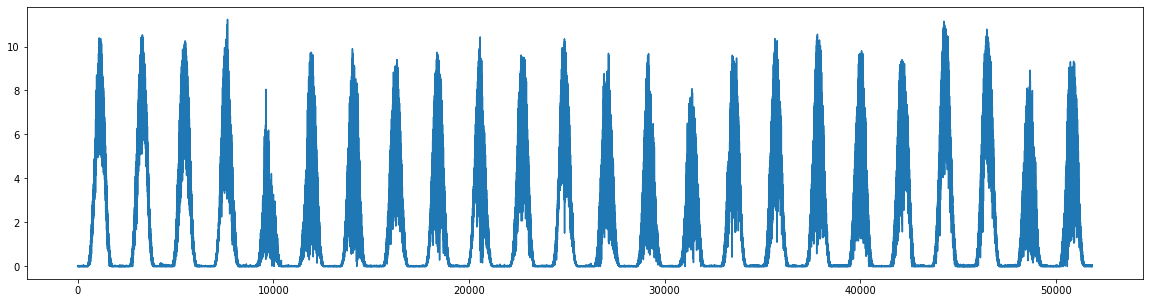

In [31]:
plt.figure(figsize=(20,5))
plt.plot(data['UV'], label='pred')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
plt.show()